<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia
</center>

## *Tugas Kelompok KASDD: F1 Lap Session*

Kelompok KASDAD Ngab

Anggota Kelompok:

1. Ahmad Rafi Wirana - 2006595873
2. Bintang Nursyawalli Sidi - 2006597790
3. Dzulandra Perkasa - 2006597752
4. Daniel Putra Tama Simarmata - 2006521793



# Deskripsi Dataset

Dataset ini berisi data tentang putaran (lap) dalam balapan Formula 1 dan terdiri dari 18,788 baris dan 31 kolom yang meliputi berbagai informasi mengenai detail lap dalam balapan Formula 1 dengan kolom-kolom sebagai berikut:

* **ID**: Identifikasi unik untuk setiap catatan.
* **Time**: Waktu ketika lap diambil.
* **LapTime**: Durasi lap.
* **Stint**: Nomor stint di mana lap tersebut berada.
* **PitOutTime** dan **PitInTime**: Waktu keluar dan masuk pit stop.
* **Sector1Time**, **Sector2Time**, dan **Sector3Time**: Waktu yang dihabiskan di masing-masing sektor lap.
* **Sector1SessionTime**, **Sector2SessionTime**, **Sector3SessionTime**: Waktu sesi untuk setiap sektor.
* **SpeedI1, SpeedI2, SpeedFL, SpeedST**: Kecepatan di berbagai titik di lap.
* **IsPersonalBest**: Apakah lap merupakan personal best dari driver.
* **Compound**: Jenis compound ban.
* **TyreLife**: Usia ban saat lap.
* **FreshTyre**: Apakah ban dalam kondisi baru.
* **LapStartTime**: Waktu mulai lap.
* **Deleted**: Indikasi apakah catatan telah dihapus.
* **DeletedReason**: Alasan mengapa catatan dihapus, jika ada.
* **AirTemp** (Suhu Udara)
* **Humidity** (Kelembapan Udara)
* **Pressure** (Tekanan Udara)
* **Rainfall** (Curah Hujan)
* **TrackTemp** (Suhu Trek)
* **WindDirection** (Arah Angin)
* **WindSpeed** (Kecepatan Angin).
* **Pos_cat**: Kategori posisi finish (misal, Podium, Point, Participant).



# Import Libraries

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, label_binarize
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, precision_score, recall_score, classification_report, accuracy_score, f1_score,  make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import silhouette_samples, silhouette_score, pairwise_distances
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE

# Import Data

In [67]:
# Mengimpor data dari dataset f1
f1_df = pd.read_csv("https://drive.google.com/uc?id=1itkMN7Z5InCRFKclfRMGKPk7SJV0qAt5")

# Menampilkan data
f1_df.head()

ID                    Time                 LapTime  Stint  \
0  14609  0 days 02:26:25.496000  0 days 00:01:40.943000    6.0   
1   3211  0 days 01:13:51.732000  0 days 00:01:48.067000    1.0   
2   2497  0 days 02:22:35.139000  0 days 00:01:22.881000    2.0   
3  13639  0 days 01:03:36.822000  0 days 00:01:31.585000    1.0   
4   1280  0 days 01:45:40.072000  0 days 00:01:34.742000    2.0   

               PitOutTime PitInTime             Sector1Time  \
0  0 days 02:25:08.325000       NaN  0 days 00:00:46.163000   
1                     NaN       NaN  0 days 00:00:39.129000   
2                     NaN       NaN  0 days 00:00:28.890000   
3  0 days 00:14:44.885000       NaN                     NaN   
4                     NaN       NaN  0 days 00:00:34.895000   

              Sector2Time             Sector3Time      Sector1SessionTime  \
0  0 days 00:00:28.979000  0 days 00:00:25.801000  0 days 02:25:36.926000   
1  0 days 00:00:43.601000  0 days 00:00:25.337000  0 days 01:12:42.794000   
2  0 days 00:00:18.554000  0 days 00:00:35.437000  0 days 02:21:41.150000   
3  0 days 00:00:28.929000  0 days 00:00:30.478000                     NaN   
4  0 days 00:00:29.874000  0 days 00:00:29.973000  0 days 01:44:40.174000   

   ... Deleted DeletedReason  AirTemp  Humidity  Pressure  Rainfall TrackTemp  \
0  ...   False           NaN     17.1      68.0    1008.0     False      24.8   
1  ...   False           NaN     25.0      49.0    1008.5     False      43.3   
2  ...   False           NaN     17.6      57.0    1018.2     False      29.9   
3  ...   False           NaN     17.6      67.0    1007.7     False      29.5   
4  ...   False           NaN     26.1      55.0    1011.0     False      31.0   

  WindDirection  WindSpeed      Pos_cat  
0           157        3.0  Participant  
1           275        1.0       Podium  
2             0        0.6  Participant  
3           135        1.8       Podium  
4           271        1.3        Point  

[5 rows x 31 columns]

In [68]:
# Menampilkan bentuk dari dataset
total_rows, total_attributes = f1_df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

Jumlah data: 18788
Jumlah atribut: 31


In [69]:
# Menampilkan ringkasan informasi dataset untuk memahami struktur dan tipe data kolom
f1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18788 entries, 0 to 18787
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  18788 non-null  int64  
 1   Time                18788 non-null  object 
 2   LapTime             18498 non-null  object 
 3   Stint               18788 non-null  float64
 4   PitOutTime          1039 non-null   object 
 5   PitInTime           735 non-null    object 
 6   Sector1Time         18381 non-null  object 
 7   Sector2Time         18749 non-null  object 
 8   Sector3Time         18696 non-null  object 
 9   Sector1SessionTime  18344 non-null  object 
 10  Sector2SessionTime  18749 non-null  object 
 11  Sector3SessionTime  18696 non-null  object 
 12  SpeedI1             15871 non-null  float64
 13  SpeedI2             18749 non-null  float64
 14  SpeedFL             18013 non-null  float64
 15  SpeedST             17096 non-null  float64
 16  IsPe

In [70]:
# Menampilkan statistik deskriptif untuk kolom numerik untuk memahami distribusi, tendensi sentral, dan variabilitas.
f1_df.describe()

ID         Stint       SpeedI1       SpeedI2       SpeedFL  \
count  18788.000000  18788.000000  15871.000000  18749.000000  18013.000000   
mean   11749.080530      2.267724    257.529393    246.376447    264.168767   
std     6769.368715      1.072338     46.800654     47.306573     36.533436   
min        0.000000      1.000000     38.000000     50.000000      2.000000   
25%     5912.750000      1.000000    224.000000    210.000000    246.000000   
50%    11730.500000      2.000000    274.000000    256.000000    274.000000   
75%    17608.500000      3.000000    290.000000    281.000000    288.000000   
max    23484.000000      8.000000    355.000000    342.000000    355.000000   

            SpeedST      TyreLife       AirTemp      Humidity      Pressure  \
count  17096.000000  18788.000000  18788.000000  18788.000000  18788.000000   
mean     296.618800     14.258037     24.561012     51.980679    986.385336   
std       31.467891     10.212297      4.337176     14.937573     55.092773   
min       56.000000      1.000000     15.700000     18.000000    778.500000   
25%      290.000000      6.000000     21.000000     41.000000    992.900000   
50%      301.000000     12.000000     25.500000     55.000000   1008.200000   
75%      312.000000     20.000000     27.300000     63.000000   1013.000000   
max      361.000000     68.000000     31.500000     81.000000   1018.700000   

          TrackTemp  WindDirection     WindSpeed  
count  18788.000000   18788.000000  18788.000000  
mean      35.540744     172.751490      1.702427  
std        6.596015      91.175864      0.986851  
min       19.000000       0.000000      0.000000  
25%       30.500000     112.000000      1.100000  
50%       33.900000     160.000000      1.500000  
75%       40.800000     233.000000      2.000000  
max       50.200000     359.000000      6.600000

In [71]:
# Menampilkan statistics untuk setiap atribut non-numerik atau kategorik
f1_df.describe(include=object)

Time                 LapTime  \
count                    18788                   18498   
unique                   18744                   14761   
top     0 days 01:04:24.142000  0 days 00:01:16.993000   
freq                         4                       7   

                    PitOutTime               PitInTime  \
count                     1039                     735   
unique                    1039                     735   
top     0 days 02:25:08.325000  0 days 02:46:17.057000   
freq                         1                       1   

                   Sector1Time             Sector2Time  \
count                    18381                   18749   
unique                   11540                   12067   
top     0 days 00:00:28.315000  0 days 00:00:29.963000   
freq                         8                       8   

                   Sector3Time      Sector1SessionTime  \
count                    18696                   18344   
unique                   10711                   18322   
top     0 days 00:00:25.832000  0 days 01:16:50.684000   
freq                         9                       2   

            Sector2SessionTime      Sector3SessionTime IsPersonalBest  \
count                    18749                   18696          18758   
unique                   18722                   18666              2   
top     0 days 02:19:01.475000  0 days 02:20:24.920000          False   
freq                         2                       2          15266   

       Compound            LapStartTime                       DeletedReason  \
count     18788                   18788                                 311   
unique        5                   18386                                 226   
top        HARD  0 days 01:01:47.219000  TRACK LIMITS AT TURN 10 (NEXT LAP)   
freq       8972                      19                                  18   

            Pos_cat  
count         18788  
unique            3  
top     Participant  
freq           8586

In [72]:
# Menghitung jumlah nilai unik untuk kolom kategorikal
categorical_unique_counts = f1_df.select_dtypes(include=['object', 'bool', 'category']).nunique()
categorical_unique_counts

Time                  18744
LapTime               14761
PitOutTime             1039
PitInTime               735
Sector1Time           11540
Sector2Time           12067
Sector3Time           10711
Sector1SessionTime    18322
Sector2SessionTime    18722
Sector3SessionTime    18666
IsPersonalBest            2
Compound                  5
FreshTyre                 2
LapStartTime          18386
Deleted                   2
DeletedReason           226
Rainfall                  2
Pos_cat                   3
dtype: int64

Pada temuan ini, beberapa kolom memiliki jumlah nilai unik yang tinggi yang berarti menunjukkan variasi dalam data tersebut. Misalnya:
1. Time, LapTime, dan LapStartTime memiliki banyak nilai unik, yang mengindikasikan dataset mencakup banyak momen waktu yang berbeda.
2. Compound memiliki 5 nilai unik, menunjukkan variasi dalam pilihan ban.
3. Pos_cat memiliki 3 nilai unik, kemungkinan mengkategorikan posisi akhir seperti Podium, Point, atau Participant.

In [73]:
# Fungsi untuk mengecek nilai yang hilang
def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

# Menampilkan jumlah data yang hilang pada dataset
cek_missing_values(f1_df)

Total   Percent
DeletedReason       18477  0.983447
PitInTime           18053  0.960879
PitOutTime          17749  0.944699
SpeedI1              2917  0.155259
SpeedST              1692  0.090057
SpeedFL               775  0.041250
Sector1SessionTime    444  0.023632
Sector1Time           407  0.021663
LapTime               290  0.015435
Sector3SessionTime     92  0.004897
Sector3Time            92  0.004897
Sector2SessionTime     39  0.002076
Sector2Time            39  0.002076
SpeedI2                39  0.002076
IsPersonalBest         30  0.001597

Berdasarkan analisis nilai yang hilang pada bagian ini, temuan yang dapat diambil adalah:

1. DeletedReason memiliki sekitar 98% nilai yang hilang.
2. PitOutTime dan PitInTime memiliki lebih dari 94% dan 96% nilai yang hilang.

Karena besarnya kekurangan data pada kolom-kolom tersebut, kemungkinan besar kolom tersebut tidak memberikan informasi yang berguna untuk analisis umum performa balapan dan hanya relevan dalam konteks spesifik yang memerlukan informasi tentang strategi pit stop. Kemudian, karena tingginya persentase nilai yang hilang pada bagian DeletedReason menunjukkan bahwa sebagian besar data pada kolom ini dianggap valid dan kurang relevan untuk dianalisis.

In [74]:
# Mengecek data yang duplikat
print('Jumlah duplikasi pada data adalah', f1_df.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


# Data Exploration

**Problem Guide:**

Lakukan eksplorasi sederhana pada data dan ceritakan insight yang Anda dapatkan dari data tersebut! (dapat ditambah analisis lain yang menurut kelompok Anda akan bermanfaat)

**Pertanyaan:**
1. Apakah penggunaan ‘Compound’ yang berbeda berpengaruh terhadap performa?
2. Bagaimana ciri-ciri driver dengan kategori posisi ‘Pos_cat’ Podium dibandingkan dengan kategori posisi lainnya?
3. Analisis perbedaan ketika sirkuit hujan ‘Rainfall’ atau tidak
4. Adakah rentang umur ban ‘TyreLife’ dengan performa terbaik dibandingkan rentang umur ban lainnya?
5. Analisis Performa Berdasarkan Kondisi Cuaca: Bagaimana kondisi cuaca (suhu udara, suhu trek, kelembapan, dan tekanan udara) mempengaruhi performa lap?
6.Korelasi Antara Kondisi Angin dan Performa: Bagaimana kecepatan dan arah angin ('WindSpeed', 'WindDirection') mempengaruhi waktu lap?



## Nomor 1


###Apakah penggunaan ‘Compound’ yang berbeda berpengaruh terhadap performa? (Bintang)


In [75]:
# df = pd.DataFrame(f1_df)

# df['LapTime'] = pd.to_timedelta(df['LapTime']).dt.total_seconds()
# compound_groups = df.groupby('Compound')['Pos_cat']
# # compound_means = compound_groups.mode()
# # print("Rata-rata waktu lap untuk setiap jenis kompon:")
# # print(compound_means)


df = pd.DataFrame(f1_df)

df['LapTime'] = pd.to_timedelta(df['LapTime']).dt.total_seconds()

# Mengelompokkan berdasarkan 'Compound' dan pilih kolom 'Pos_cat'
compound_groups = df.groupby('Compound')['Pos_cat']

# Menghitung mode untuk 'Pos_cat' dalam setiap grup
compound_modes = compound_groups.apply(lambda x: x.mode().iloc[0])

# Menampilkan data
print("Modus dari kategori posisi untuk setiap jenis kompon:")
print(compound_modes)

Modus dari kategori posisi untuk setiap jenis kompon:
Compound
HARD            Participant
INTERMEDIATE          Point
MEDIUM          Participant
SOFT            Participant
WET             Participant
Name: Pos_cat, dtype: object


In [76]:
compound_pos_cat_df = df[['Compound', 'Pos_cat']]

# Melakukan pengelompokan dan menghitung jumlah setiap posisi kategori untuk setiap kompon
grouped_counts = compound_pos_cat_df.groupby(['Compound', 'Pos_cat']).size().unstack(fill_value=0)

# Cetak jumlah setiap posisi kategori untuk setiap kompon
total_positions = grouped_counts.sum(axis=1)
percentage_grouped_counts = grouped_counts.divide(total_positions, axis=0) * 100

print("Jumlah setiap kategori posisi untuk setiap jenis kompon:")
print(grouped_counts)
print("")
print("Jumlah dan Persentase setiap kategori posisi untuk setiap jenis kompon:")
print(percentage_grouped_counts)

Jumlah setiap kategori posisi untuk setiap jenis kompon:
Pos_cat       Participant  Podium  Point
Compound                                
HARD                 4417    1262   3293
INTERMEDIATE          226     107    239
MEDIUM               2674    1207   2549
SOFT                 1232     489   1055
WET                    37       1      0

Jumlah dan Persentase setiap kategori posisi untuk setiap jenis kompon:
Pos_cat       Participant     Podium      Point
Compound                                       
HARD            49.230941  14.065983  36.703076
INTERMEDIATE    39.510490  18.706294  41.783217
MEDIUM          41.586314  18.771384  39.642302
SOFT            44.380403  17.615274  38.004323
WET             97.368421   2.631579   0.000000


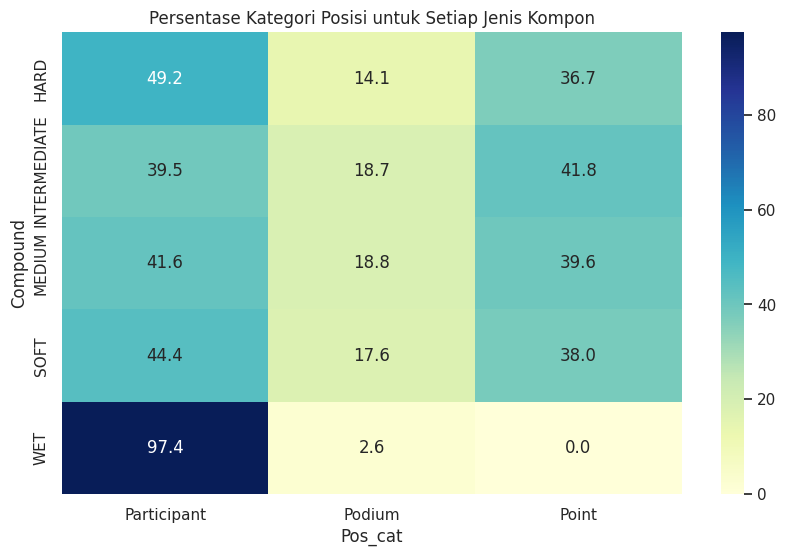

In [77]:
# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat heatmap
sns.heatmap(percentage_grouped_counts, annot=True, fmt=".1f", cmap="YlGnBu")

# Menambahkan judul dan label
plt.title("Persentase Kategori Posisi untuk Setiap Jenis Kompon")
plt.xlabel("Pos_cat")
plt.ylabel("Compound")

# Menampilkan heatmap
plt.show()

<Figure size 1000x600 with 0 Axes>

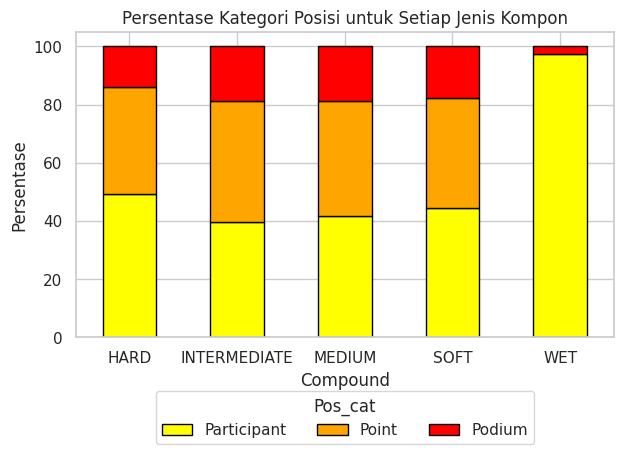

In [78]:
import matplotlib.pyplot as plt

# Menentukan urutan kolom yang diinginkan
new_column_order = ['Participant', 'Point', 'Podium']
percentage_grouped_counts = percentage_grouped_counts.reindex(columns=new_column_order)

# Menentukan warna untuk setiap kategori
colors = {'Participant': 'yellow', 'Point': 'orange', 'Podium': 'red'}

# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat grafik batang
ax = percentage_grouped_counts.plot(kind='bar', stacked=True, color=[colors[col] for col in percentage_grouped_counts.columns], edgecolor='black')

# Menambahkan judul dan label
plt.title("Persentase Kategori Posisi untuk Setiap Jenis Kompon")
plt.xlabel("Compound")
plt.ylabel("Persentase")

# Menambahkan legend di bawah grafik
plt.legend(title='Pos_cat', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)

# Mengatur label sumbu x menjadi miring 90 derajat
plt.xticks(rotation=0)

# Menampilkan grafik batang
plt.tight_layout()
plt.show()


Dilihat dari persentase antara Penggunaan Compound terhadap Podium (Pos_cat) terdapat beberapa hal yang bisa diidentifikasi:

Podium (Best Placement)

*   Compound dengan tipe MEDIUM memiliki performa tertinggi untuk Posisi Podium sebesar 18.8% lalu disusul oleh Compound dengan tipe INTERMEDIATE sebesar 18.7%
*   Compound dengan tipe HARD yang mendapat Posisi Podium sebesar 14.1% lalu terakhir Compound tipe WET sebesar 2.6%

Dari persentase ini, dapat diartikan bahwa jenis Compound turut mempengaruhi placement / Posisi yang didapat. Namun, persentase Podium untuk masing-masing tipe MEDIUM, INTERMEDIATE, HARD tidak terlalu berbeda secara signifikan.

Walaupun persentase untuk tipe Compound WET yang paling rendah diantara lainnya, bukan berarti Compound jenis WET buruk dari segi performa Podium.

Hal ini bisa terjadi karena data pada masing-masing Class Compound yang tidak balance (Imbalance Class)

Oleh karena itu, untuk soal ini memang benar bahwa penggunaan Compound mempengaruhi performa Position tetap tidak mempengaruhi secara signifikan.



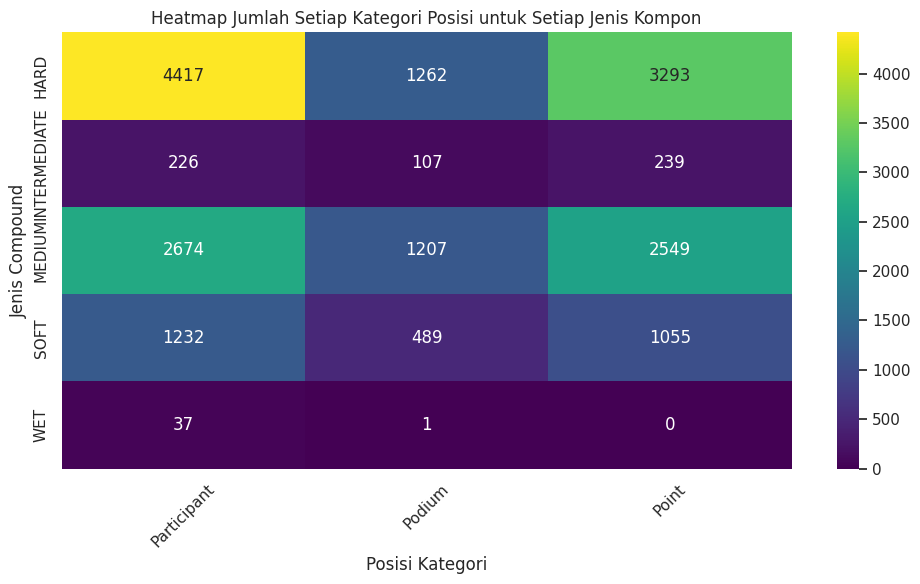

In [79]:
# Membuat visualisasi heatmap jumlah kategori posisi per jenis compound.
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_counts, cmap='viridis', annot=True, fmt='d')
plt.title('Heatmap Jumlah Setiap Kategori Posisi untuk Setiap Jenis Kompon')
plt.xlabel('Posisi Kategori')
plt.ylabel('Jenis Compound')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ban dengan jenis Compound HARD memiliki jumlah podium yang paling tinggi, diikuti oleh MEDIUM dan SOFT.
Ban dengan jenis INTERMEDIATE juga memiliki penampilan di podium, meskipun jumlahnya jauh lebih sedikit.
Ini menunjukkan bahwa ban dengan jenis HARD cenderung memberikan kinerja yang lebih baik dalam hal mencapai posisi podium

In [80]:
compounds = df['Compound'].unique()

# Membersihkan nilai NaN
compound_data_cleaned = {compound: df.loc[df['Compound'] == compound, 'LapTime'].dropna() for compound in compounds}

# Menghitung F-statistik dan p-value dengan data yang bersih
f_statistic, p_value = stats.f_oneway(*compound_data_cleaned.values())

print("Nilai F-statistic:", f_statistic)
print("Nilai p-value:", p_value)

if p_value < 0.05:
    print("Penggunaan 'Compound' yang berbeda berpengaruh secara signifikan terhadap performa.")
else:
    print("Tidak ada bukti yang cukup untuk menyatakan bahwa penggunaan 'Compound' yang berbeda berpengaruh terhadap performa.")


Nilai F-statistic: 19.65518817097679
Nilai p-value: 3.6942690933863315e-16
Penggunaan 'Compound' yang berbeda berpengaruh secara signifikan terhadap performa.


*   H0: Tidak ada perbedaan signifikan dalam waktu lap antara berbagai jenis compound
*  H1: Terdapat perbedaan signifikan dalam waktu lap antara berbagai jenis kompon ban.


kita menghitung F-statistic dan p-value, serta memeriksa apakah perbedaan dalam penggunaan jenis compound berpengaruh secara signifikan terhadap performa. Dari data tersebut dapat terlihat bahwa nilai p_value adalah < 0.05 atau lebih tepatnya (3.6942690933863315e-16') dimana Jika nilai p-value yang diperoleh  kurang dari alpha (p-value < α) maka dapat dikatakan kita dapat menolak h0.



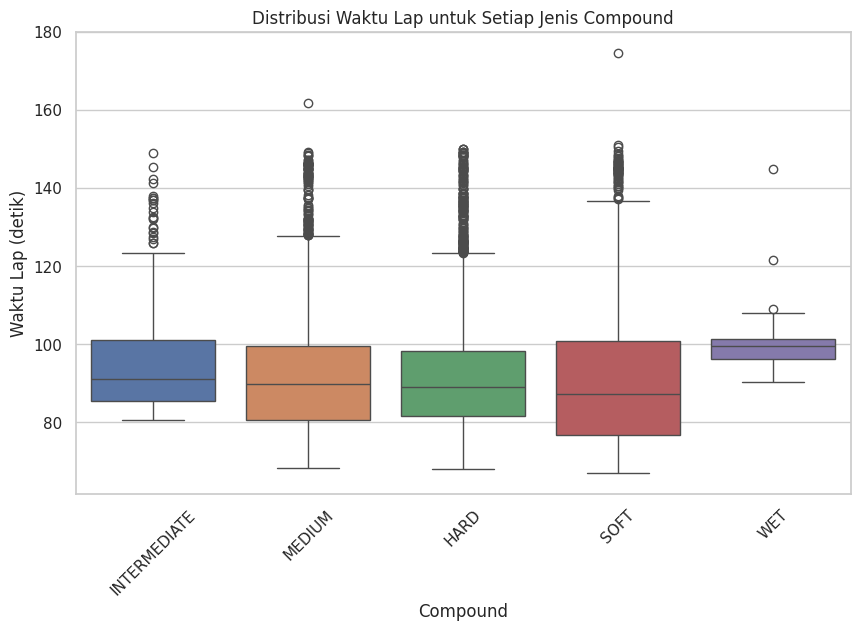

In [81]:
df_cleaned = pd.DataFrame.from_dict(compound_data_cleaned, orient='index').T

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned)
plt.title('Distribusi Waktu Lap untuk Setiap Jenis Compound')
plt.xlabel('Compound')
plt.ylabel('Waktu Lap (detik)')
plt.xticks(rotation=45)
plt.show()

## Nomor 2

### Bagaimana ciri-ciri driver dengan kategori posisi ‘Pos_cat’ Podium? (Rafi)

In [82]:
# Memfilter driver yang mencapai podium
podium_drivers = f1_df[f1_df['Pos_cat'] == 'Podium']

# Mengubah 'Lap Time' ke detik
podium_drivers['LapTimeSeconds'] = pd.to_timedelta(podium_drivers['LapTime']).dt.total_seconds()

<ipython-input-82-daee6d62782a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podium_drivers['LapTimeSeconds'] = pd.to_timedelta(podium_drivers['LapTime']).dt.total_seconds()


In [83]:
# Menghitung statistik deskriptif dari data driver podium
podium_descriptive_stats = podium_drivers.describe()

# Menampilkan statistik deskriptif yang dihitung
podium_descriptive_stats

ID        Stint      SpeedI1      SpeedI2      SpeedFL  \
count   3066.000000  3066.000000  2530.000000  3058.000000  2935.000000   
mean   11637.679387     2.151011   257.494862   247.122302   263.493015   
std     6862.228077     1.051230    45.643869    45.375229    36.091632   
min        0.000000     1.000000    73.000000    53.000000     2.000000   
25%     5377.250000     1.000000   226.000000   218.000000   246.000000   
50%    11669.500000     2.000000   276.000000   257.000000   274.000000   
75%    17363.750000     3.000000   290.000000   280.000000   287.000000   
max    23331.000000     7.000000   341.000000   341.000000   347.000000   

           SpeedST     TyreLife      AirTemp     Humidity     Pressure  \
count  2775.000000  3066.000000  3066.000000  3066.000000  3066.000000   
mean    292.898018    14.913894    24.603653    51.978474   985.566830   
std      31.398720     9.770236     4.359999    15.167672    56.104682   
min      70.000000     1.000000    15.700000    18.000000   778.500000   
25%     289.000000     7.000000    20.900000    41.000000   988.500000   
50%     298.000000    13.000000    25.500000    55.000000  1008.200000   
75%     307.000000    20.000000    27.400000    63.000000  1013.000000   
max     348.000000    55.000000    31.500000    81.000000  1018.700000   

         TrackTemp  WindDirection    WindSpeed  LapTimeSeconds  
count  3066.000000    3066.000000  3066.000000     3007.000000  
mean     35.692531     173.319635     1.690215       89.743525  
std       6.659510      91.542879     0.992837       12.978206  
min      19.000000       0.000000     0.000000       67.012000  
25%      30.500000     113.000000     1.100000       79.802000  
50%      34.500000     161.000000     1.500000       88.024000  
75%      40.900000     235.000000     2.000000       97.975000  
max      50.200000     359.000000     6.600000      149.966000

**Analisis Statistik Deskriptif**

Dari analisis statistik deskriptif untuk driver dengan kategori posisi 'Podium' di atas, dapat diidentifikasi beberapa ciri khas sebagai berikut:

* Kecepatan:
  * Kecepatan di titik I1 rata-rata adalah 257.49 km/jam, dengan variasi dari 73 km/jam hingga 341 km/jam.
  * Kecepatan di titik I2 rata-rata adalah 247.12 km/jam, menunjukkan bahwa kecepatan di sektor ini cenderung lebih rendah dibandingkan dengan I1.
  * Kecepatan maksimum di lintasan lurus (SpeedFL) dan sektoral (SpeedST) juga cukup tinggi, dengan rata-rata masing-masing 263.49 km/jam dan 292.90 km/jam. Hal ini menandakan bahwa ada performa tinggi dari driver podium dalam akselerasi dan kecepatan maksimum.

* Usia Ban (TyreLife): Usia ban rata-rata untuk driver podium adalah sekitar 14.91 putaran, dengan jangkauan dari 1 hingga 55 putaran. Hal ini menunjukkan penggunaan strategi ban yang bervariasi di antara driver podium.

In [84]:
# Membandingkan Waktu Putaran Rata-Rata untuk Podium vs Non-Podium

# Konversi 'Lap Time' dari semua data ke detik
f1_df['LapTimeSeconds'] = pd.to_timedelta(f1_df['LapTime']).dt.total_seconds()

# Menghitung waktu putaran rata-rata untuk posisi podium
average_laptime_podium = f1_df[f1_df['Pos_cat'] == 'Podium']['LapTimeSeconds'].mean()

# Menghitung waktu putaran rata-rata untuk posisi non-podium
average_laptime_non_podium = f1_df[f1_df['Pos_cat'] != 'Podium']['LapTimeSeconds'].mean()

average_laptime_podium, average_laptime_non_podium

(89.74352544063849, 91.26931302046349)

Dari analisis waktu putaran rata-rata ditemukan bahwa:

* Waktu putaran rata-rata untuk driver yang mencapai podium adalah sekitar 89.74 detik.
* Waktu putaran rata-rata untuk driver yang tidak mencapai podium adalah sekitar 91.27 detik.

Hasil ini menunjukkan bahwa secara rata-rata, driver yang mencapai podium memiliki waktu putaran yang lebih cepat dibandingkan dengan driver yang tidak mencapai podium.

In [85]:
# Hubungan antara berbagai titik Kecepatan dan Podium

# Menghitung kecepatan rata-rata di titik pengukuran untuk posisi podium
average_speeds_podium = podium_drivers[['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].mean()

# Menghitung kecepatan rata-rata di titik pengukuran untuk posisi non-podium
average_speeds_non_podium = f1_df[f1_df['Pos_cat'] != 'Podium'][['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].mean()

# Menghitung selisih nilai kecepatan antara dua karakteristik
average_speed_times_comparison = average_speeds_podium - average_speeds_non_podium

# Membuat DataFrame untuk membandingkan kecepatan rata-rata antara podium dan non-podium
average_speed_comparison = pd.DataFrame(
    {
        'Podium': average_speeds_podium,
        'Non-Podium': average_speeds_non_podium,
        'Differences': average_speed_times_comparison
     })

average_speed_comparison

Podium  Non-Podium  Differences
SpeedI1  257.494862  257.535942    -0.041080
SpeedI2  247.122302  246.231088     0.891214
SpeedFL  263.493015  264.300305    -0.807290
SpeedST  292.898018  297.339781    -4.441763

Dari analisis mengenai hubungan antara kecepatan dan podium, dapat disimpulkan bahwa:

* Kecepatan rata-rata di SpeedI1 untuk driver podium adalah 257.49 km/jam, hampir sama dengan non-podium yang 257.54 km/jam. Hasil ini menunjukkan bahwa kecepatan di titik ini tidak secara signifikan berbeda antara driver yang mencapai podium dan yang tidak.

* Kecepatan rata-rata di SpeedI2 untuk driver podium adalah 247.12 km/jam, sedikit lebih tinggi dibandingkan dengan non-podium yang 246.23 km/jam. Meskipun ada perbedaan, perbedaan tersebut tidak terlalu besar.

* Kecepatan rata-rata di SpeedFL (Finish Line) untuk driver podium sedikit lebih rendah (263.49 km/jam) dibandingkan dengan non-podium (264.30 km/jam). Hasil ini menunjukkan bahwa kecepatan di garis finish tidak selalu menentukan kesuksesan podium.

* Kecepatan rata-rata di SpeedST (Straight Track) untuk driver podium adalah 292.90 km/jam, yang lebih rendah dibandingkan dengan non-podium yang 297.34 km/jam. Perbedaan ini menarik karena menunjukkan bahwa meskipun kecepatan lurus tinggi mungkin menunjukkan kecepatan maksimal yang baik, itu tidak secara otomatis menghasilkan hasil podium.

Kesimpulan ini menggarisbawahi bahwa keberhasilan di podium tidak selalu berkorelasi langsung dengan kecepatan tertinggi yang dicapai di trek. Masih ada faktor lain seperti konsistensi waktu putaran, strategi balapan, dan adaptasi dengan kondisi balapan mungkin berperan lebih besar dalam menentukan siapa yang mencapai podium.

In [86]:
# Analisis rata-rata waktu tiap sektor

# Konversi waktu sektor dari string ke detik untuk semua data
for sector in ['Sector1Time', 'Sector2Time', 'Sector3Time']:
    f1_df[sector + 'Seconds'] = pd.to_timedelta(f1_df[sector]).dt.total_seconds()

# Menghitung rata-rata waktu sektor untuk posisi podium
average_sector_times_podium = f1_df[f1_df['Pos_cat'] == 'Podium'][['Sector1TimeSeconds', 'Sector2TimeSeconds', 'Sector3TimeSeconds']].mean()

# Menghitung rata-rata waktu sektor untuk posisi non-podium
average_sector_times_non_podium = f1_df[f1_df['Pos_cat'] != 'Podium'][['Sector1TimeSeconds', 'Sector2TimeSeconds', 'Sector3TimeSeconds']].mean()

# Menghitung selisih nilai sektor antara dua karakteristik
average_sector_times_comparison = average_sector_times_podium - average_sector_times_non_podium

# Membuat DataFrame untuk membandingkan rata-rata waktu sektor antara podium dan non-podium
average_sector_times_comparison = pd.DataFrame(
    {
        'Podium': average_sector_times_podium,
        'Non-Podium': average_sector_times_non_podium,
        'Differences': average_sector_times_comparison,
     })

average_sector_times_comparison

Podium  Non-Podium  Differences
Sector1TimeSeconds  28.410365   28.875219    -0.464855
Sector2TimeSeconds  35.637883   35.890945    -0.253062
Sector3TimeSeconds  26.655958   27.064557    -0.408599

Dari analisis bagian tentang kinerja di sektor-sektor untuk driver yang mencapai podium dibandingkan dengan yang tidak ditemukan bahwa:

* Sektor 1: Waktu rata-rata untuk driver podium adalah 28.41 detik, sedangkan untuk non-podium adalah 28.88 detik. Hasil ini menunjukkan bahwa driver yang mencapai podium cenderung lebih cepat di Sektor 1.
* Sektor 2: Waktu rata-rata untuk driver podium adalah 35.64 detik, dibandingkan dengan 35.89 detik untuk non-podium. Lagi, driver podium menunjukkan keunggulan di Sektor 2.
* Sektor 3: Waktu rata-rata untuk driver podium adalah 26.66 detik, sedangkan untuk non-podium adalah 27.06 detik. Sekali lagi, keunggulan di Sektor 3 terlihat pada driver yang mencapai podium.

Hasil analisis ini menunjukkan bahwa driver yang mencapai podium tidak hanya menunjukkan kinerja yang lebih baik secara keseluruhan dalam hal waktu putaran tetapi juga konsisten lebih cepat di masing-masing sektor trek dibandingkan dengan driver yang tidak mencapai podium

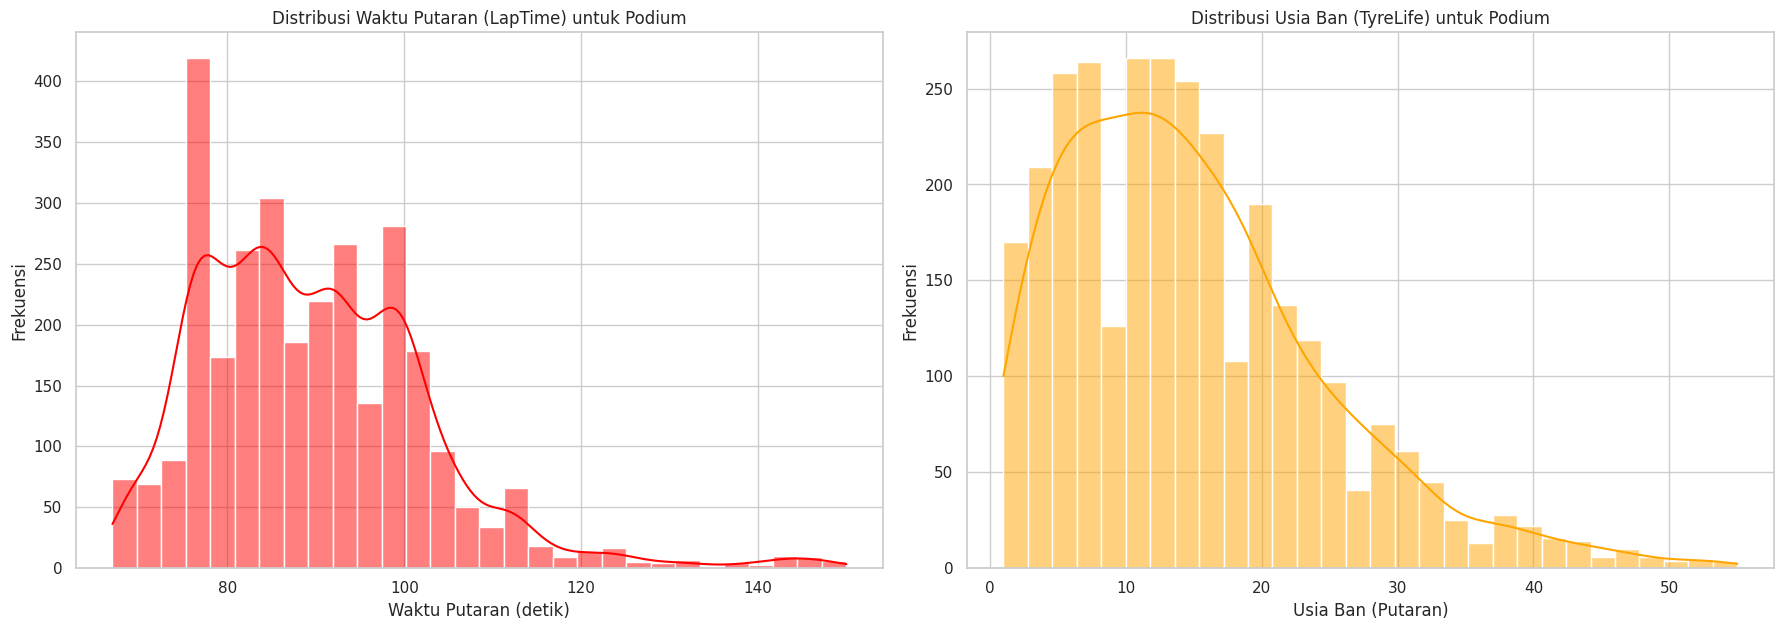

In [87]:
# Menyiapkan area gambar
plt.figure(figsize=(18, 12))

# Membuat histogram distribusi waktu putaran untuk driver podium
plt.subplot(2, 2, 1)
sns.histplot(podium_drivers['LapTimeSeconds'], bins=30, color='red', kde=True)
plt.title('Distribusi Waktu Putaran (LapTime) untuk Podium')
plt.xlabel('Waktu Putaran (detik)')
plt.ylabel('Frekuensi')

# Membuat histogram distribusi usia ban untuk driver podium
plt.subplot(2, 2, 2)
sns.histplot(podium_drivers['TyreLife'], bins=30, color='orange', kde=True)
plt.title('Distribusi Usia Ban (TyreLife) untuk Podium')
plt.xlabel('Usia Ban (Putaran)')
plt.ylabel('Frekuensi')

# Menyesuaikan tata letak plot
plt.tight_layout()

# Menampilkan plot
plt.show()

**Analisi Distribusi Nilai**

* Distribusi Waktu Putaran (LapTime) untuk Podium: Waktu putaran menunjukkan distribusi yang cukup konsisten, dengan sebagian besar waktu putaran berada dalam kisaran tertentu. Hal ini menunjukkan bahwa driver podium cenderung memiliki performa yang konsisten selama balapan.
* Distribusi Usia Ban (TyreLife) untuk Podium: Distribusi usia ban menunjukkan variasi yang luas, menandakan bahwa strategi ban yang berbeda digunakan oleh driver yang mencapai podium. Ada konsentrasi pada usia ban yang lebih rendah, yang mungkin menunjukkan pergantian ban untuk mendapatkan keuntungan dari ban yang lebih baru di akhir balapan.

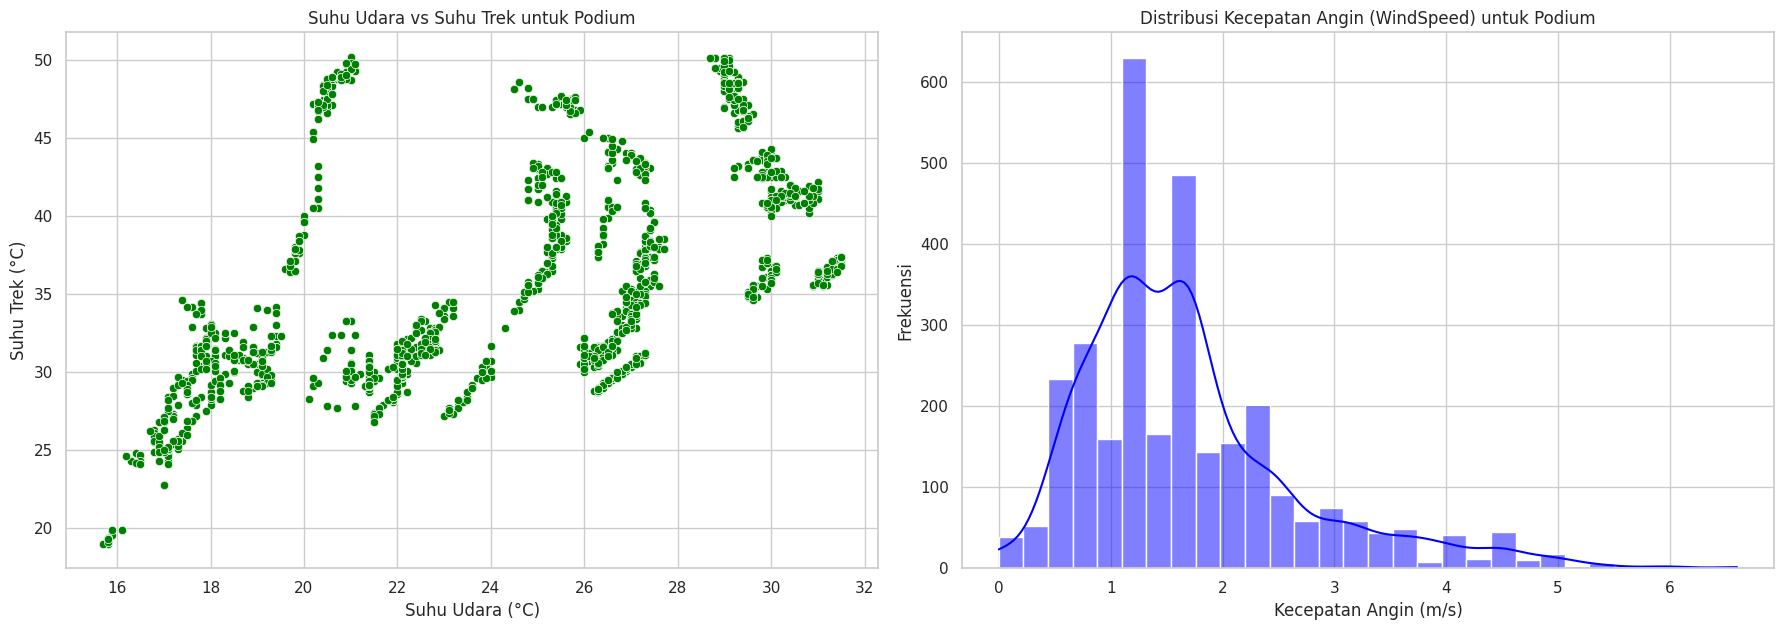

In [88]:
# Menyiapkan area gambar dengan ukuran tertentu
plt.figure(figsize=(18, 12))

# Membuat scatter plot untuk membandingkan Suhu Udara dan Suhu Trek bagi driver podium
plt.subplot(2, 2, 3)
sns.scatterplot(x='AirTemp', y='TrackTemp', data=podium_drivers, color='green')
plt.title('Suhu Udara vs Suhu Trek untuk Podium')
plt.xlabel('Suhu Udara (°C)')
plt.ylabel('Suhu Trek (°C)')

# Membuat histogram distribusi kecepatan angin untuk driver podium
plt.subplot(2, 2, 4)
sns.histplot(podium_drivers['WindSpeed'], bins=30, color='blue', kde=True)
plt.title('Distribusi Kecepatan Angin (WindSpeed) untuk Podium')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('Frekuensi')

# Menyesuaikan tata letak plot
plt.tight_layout()

# Menampilkan plot
plt.show()

**Analisis Kondisi Cuaca**

* Suhu Udara vs Suhu Trek untuk Podium: Ada hubungan positif antara suhu udara dan suhu trek yang diharapkan. Driver yang mencapai podium berhasil berkompetisi dalam berbagai kondisi suhu, dengan sebagian besar balapan terjadi pada suhu udara yang lebih hangat yang menyebabkan suhu trek yang lebih tinggi juga.

* Distribusi Kecepatan Angin (WindSpeed) untuk Podium: Distribusi kecepatan angin menunjukkan bahwa kebanyakan balapan diadakan dalam kondisi angin yang relatif ringan hingga sedang. Tidak banyak balapan yang terjadi dalam kondisi angin yang sangat kencang, yang menunjukkan bahwa kondisi angin ekstrem mungkin kurang ideal untuk pencapaian podium.

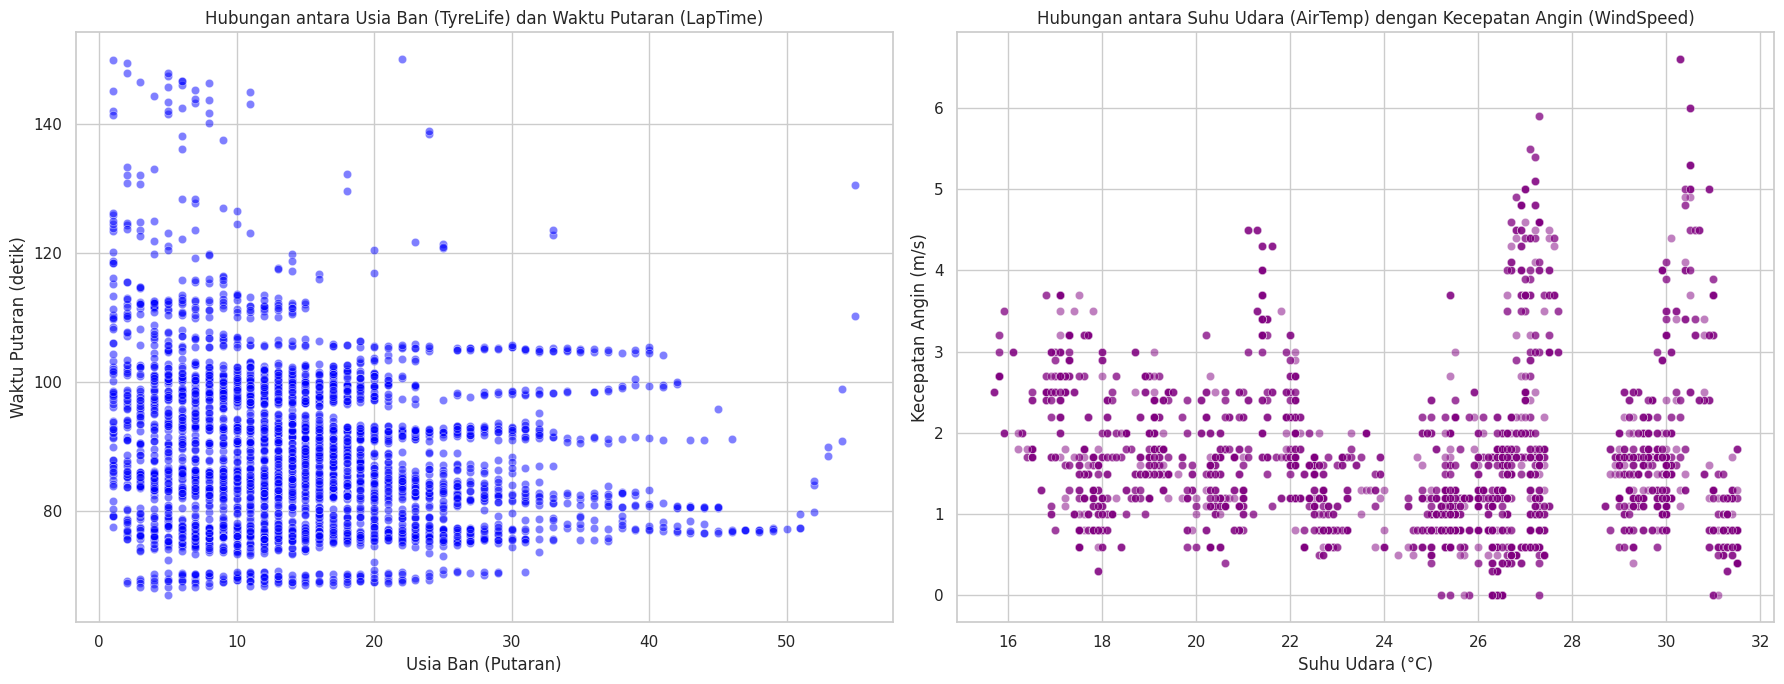

In [89]:
# Menyiapkan area gambar
plt.figure(figsize=(18, 7))

# Membuat scatter plot untuk menganalisis hubungan antara Usia Ban dan Waktu Putaran
plt.subplot(1, 2, 1)
sns.scatterplot(x='TyreLife', y='LapTimeSeconds', data=podium_drivers, color='blue', alpha=0.5)
plt.title('Hubungan antara Usia Ban (TyreLife) dan Waktu Putaran (LapTime)')
plt.xlabel('Usia Ban (Putaran)')
plt.ylabel('Waktu Putaran (detik)')

# Membuat scatter plot untuk menganalisis hubungan antara Suhu Udara dan Kecepatan Angin
plt.subplot(1, 2, 2)
sns.scatterplot(x='AirTemp', y='WindSpeed', data=podium_drivers, color='purple', alpha=0.5)
plt.title('Hubungan antara Suhu Udara (AirTemp) dengan Kecepatan Angin (WindSpeed)')
plt.xlabel('Suhu Udara (°C)')
plt.ylabel('Kecepatan Angin (m/s)')

# Menyesuaikan tata letak plot
plt.tight_layout()

# Menampilkan plot
plt.show()

**Analisis Korelasi**

* Hubungan antara Usia Ban (TyreLife) dan Waktu Putaran (LapTime): Visualisasi ini menunjukkan bahwa tidak ada hubungan yang jelas dan langsung antara usia ban dan waktu putaran untuk driver yang mencapai podium. Data menyebar luas tanpa pola yang jelas, menunjukkan bahwa faktor lain selain usia ban mungkin lebih dominan dalam menentukan waktu putaran. Hal ini dapat mencakup strategi balap, kondisi trek, dan keterampilan driver.

* Hubungan antara Suhu Udara (AirTemp) dengan Kecepatan Angin (WindSpeed): Dari scatter plot ini, tidak terlihat adanya hubungan yang kuat antara suhu udara dan kecepatan angin untuk balapan di mana driver mencapai podium. Data menunjukkan bahwa podium dapat dicapai dalam berbagai kondisi suhu udara dan kecepatan angin, menegaskan fleksibilitas dan adaptasi driver dan tim mereka terhadap kondisi cuaca yang berbeda.

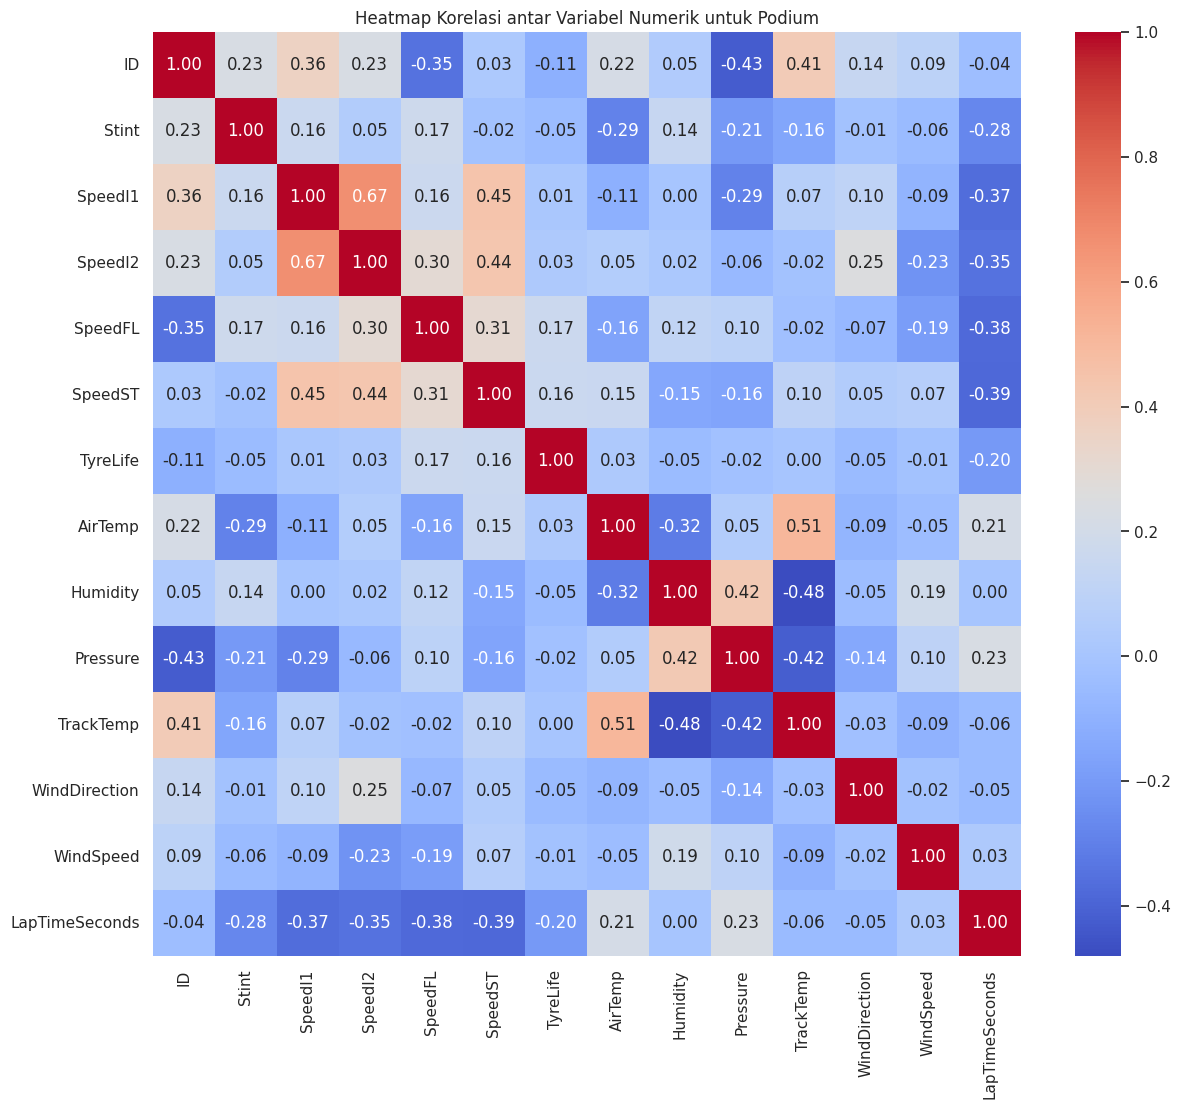

SpeedI1         SpeedI2      0.669092
AirTemp         TrackTemp    0.509945
Humidity        TrackTemp    0.480460
SpeedST         SpeedI1      0.448484
SpeedI2         SpeedST      0.437888
ID              Pressure     0.425379
TrackTemp       Pressure     0.417467
Pressure        Humidity     0.416537
TrackTemp       ID           0.409828
LapTimeSeconds  SpeedST      0.385437
dtype: float64

In [90]:
# Mengidentifikasi kolom numerik dan menghitung matriks korelasi Pearson
numeric_columns = podium_drivers.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = podium_drivers[numeric_columns].corr()

# Membuat heatmap untuk visualisasi matriks korelasi antar variabel numerik
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Variabel Numerik untuk Podium')
plt.show()

# Memilih dan menampilkan 10 korelasi terkuat di bawah 1 (untuk menghindari korelasi sempurna dengan diri sendiri)
significant_correlations = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
significant_correlations = significant_correlations[significant_correlations < 1]
significant_correlations = significant_correlations.drop_duplicates()
significant_correlations.head(10)

**Analisis Korelasi**

Dari analisis korelasi antar variabel numerik untuk driver dengan posisi 'Podium' ditemukan ada beberapa korelasi yang menarik:

* Kecepatan di titik I1 dan I2 (SpeedI1 dan SpeedI2) memiliki korelasi positif yang kuat (0.67) menunjukkan bahwa kecepatan di kedua titik ini cenderung meningkat bersamaan. Hal ini bisa dibilang masuk akal karena kedua titik kecepatan tersebut mungkin berada di bagian trek yang memerlukan kecepatan tinggi yang serupa.

* Suhu Udara (AirTemp) dan Suhu Trek (TrackTemp) juga memiliki korelasi positif yang signifikan (0.51), mengindikasikan bahwa suhu udara yang lebih tinggi cenderung berkorelasi dengan suhu trek yang lebih tinggi, yang penting dalam pengaturan strategi balapan dan pemilihan ban.

* Humidity dan TrackTemp menunjukkan korelasi negatif (0.48), menunjukkan bahwa kelembapan lebih tinggi mungkin berkorelasi dengan suhu trek yang lebih rendah. Hal ini bisa dipengaruhi oleh kondisi cuaca yang lebih mendung atau hujan yang menurunkan suhu trek.

* Korelasi antara kecepatan di titik tertentu (SpeedST, SpeedI1, dan SpeedI2) dengan nilai korelasi 0.44 hingga 0.45, menunjukkan hubungan kecepatan yang kuat di berbagai titik pengukuran pada trek.

* Korelasi antara LapTimeSeconds dan SpeedST (-0.39), menunjukkan bahwa kecepatan lebih tinggi di bagian lurus trek cenderung berkorelasi dengan waktu putaran yang lebih cepat, yang intuitif mengingat dampak kecepatan terhadap performa putaran.

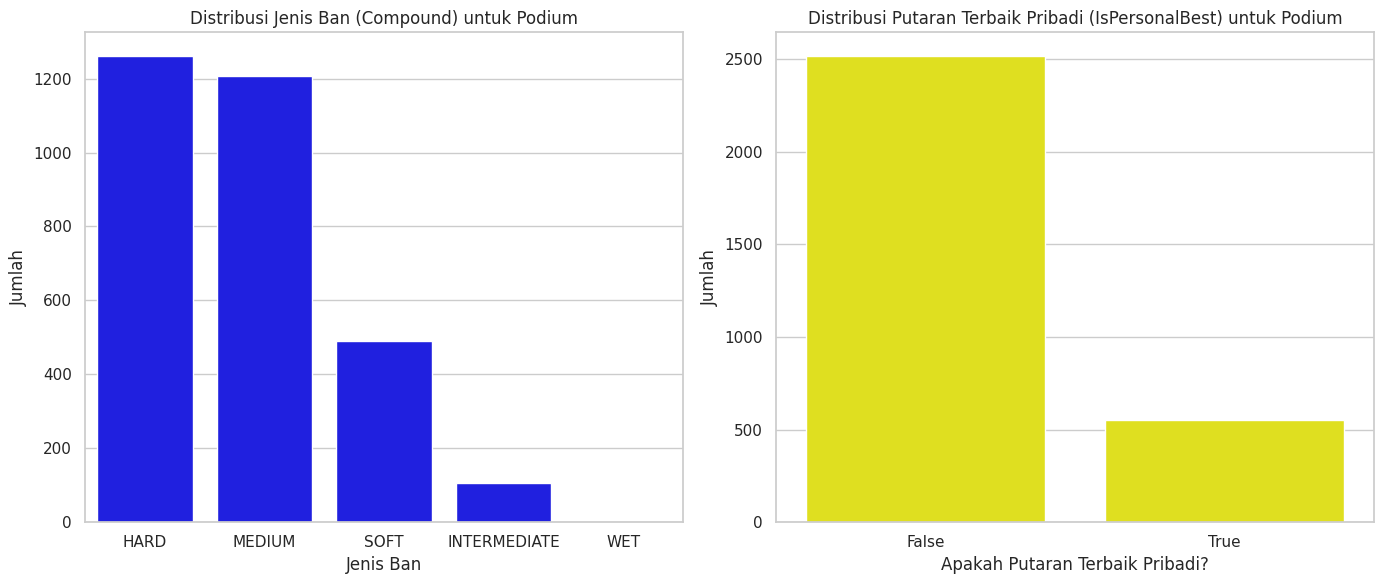

In [91]:
# Menyiapkan area gambar
plt.figure(figsize=(14, 6))

# Membuat grafik batang untuk analisis distribusi jenis ban (Compound) yang digunakan oleh driver podium
plt.subplot(1, 2, 1)
sns.countplot(x='Compound', color='blue', data=podium_drivers, order=podium_drivers['Compound'].value_counts().index)
plt.title('Distribusi Jenis Ban (Compound) untuk Podium')
plt.xlabel('Jenis Ban')
plt.ylabel('Jumlah')

# Membuat grafik batang untuk menganalisis distribusi putaran terbaik pribadi (IsPersonalBest) bagi driver podium
plt.subplot(1, 2, 2)
sns.countplot(x='IsPersonalBest', data=podium_drivers, color='yellow')
plt.title('Distribusi Putaran Terbaik Pribadi (IsPersonalBest) untuk Podium')
plt.xlabel('Apakah Putaran Terbaik Pribadi?')
plt.ylabel('Jumlah')

# Menyesuaikan tata letak plot untuk menghindari tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

Dari visualisasi terkait hubungan antara variabel kategorikal dan posisi 'Podium', dapat diamati hal berikut:

* Distribusi Jenis Ban (Compound) untuk Podium: Jenis ban yang digunakan oleh driver yang mencapai podium menunjukkan variasi, dengan beberapa jenis ban lebih sering muncul dibandingkan yang lain. Hal ini menunjukkan preferensi atau keefektifan tertentu dari jenis ban dalam kondisi balapan tertentu yang mengarah ke kesuksesan di podium.

* Distribusi Putaran Terbaik Pribadi (IsPersonalBest) untuk Podium: Banyak driver yang mencapai podium juga mencatat waktu putaran terbaik pribadi mereka yang mengindikasikan bahwa performa puncak sering kali diperlukan untuk mencapai posisi podium. Wawasan ini menyoroti pentingnya mengoptimalkan setiap putaran dan strategi balapan untuk mencapai hasil terbaik.

Kesimpulan dari dua analisis ini menunjukkan bahwa keberhasilan di podium berkaitan dengan faktor-faktor seperti pemilihan ban yang tepat untuk kondisi balapan dan kemampuan untuk mencapai performa puncak selama balapan. Kedua faktor ini, bersama dengan korelasi yang ditemukan sebelumnya, menyoroti beberapa kunci keberhasilan untuk mencapai posisi podium dalam balapan Formula 1.

In [92]:
# Mengubah kategori posisi podium menjadi variabel numerik (1 untuk Podium, 0 untuk lainnya)
f1_df['IsPodium'] = f1_df['Pos_cat'].apply(lambda x: 1 if x == 'Podium' else 0)

# Menghitung korelasi antara kondisi cuaca dan pencapaian podium
weather_conditions = ['AirTemp', 'TrackTemp', 'Humidity', 'WindSpeed', 'IsPodium']
weather_correlation = f1_df[weather_conditions].corr()['IsPodium'].sort_values()

# Menampilkan hasil korelasi
weather_correlation

WindSpeed   -0.005465
Humidity    -0.000065
AirTemp      0.004342
TrackTemp    0.010162
IsPodium     1.000000
Name: IsPodium, dtype: float64

Dari analisis korelasi antara kondisi cuaca dan keberhasilan mencapai podium, didapatkan hasil sebagai berikut:

* Kecepatan Angin (WindSpeed): Korelasi -0.005 dengan posisi podium, menunjukkan tidak ada hubungan yang signifikan antara kecepatan angin dan keberhasilan mencapai podium.

* Kelembapan (Humidity): Korelasi hampir nol (-0.000065) dengan posisi podium, menunjukkan bahwa kelembapan tidak memiliki pengaruh yang signifikan terhadap pencapaian podium.

* Suhu Udara (AirTemp): Korelasi positif yang sangat kecil (0.004) dengan posisi podium, yang menunjukkan bahwa pengaruh suhu udara terhadap kesuksesan podium sangat minim.

* Suhu Trek (TrackTemp): Memiliki korelasi positif yang sedikit lebih tinggi (0.010) dengan posisi podium dibandingkan dengan faktor cuaca lainnya, meskipun masih sangat rendah, menunjukkan bahwa suhu trek mungkin memiliki pengaruh minimal tapi sedikit lebih signifikan terhadap keberhasilan podium dibandingkan dengan kondisi cuaca lainnya.

Kesimpulan ini menunjukkan bahwa kondisi cuaca seperti suhu udara, kelembapan, kecepatan angin, dan suhu trek tidak memiliki pengaruh yang signifikan terhadap keberhasilan mencapai podium

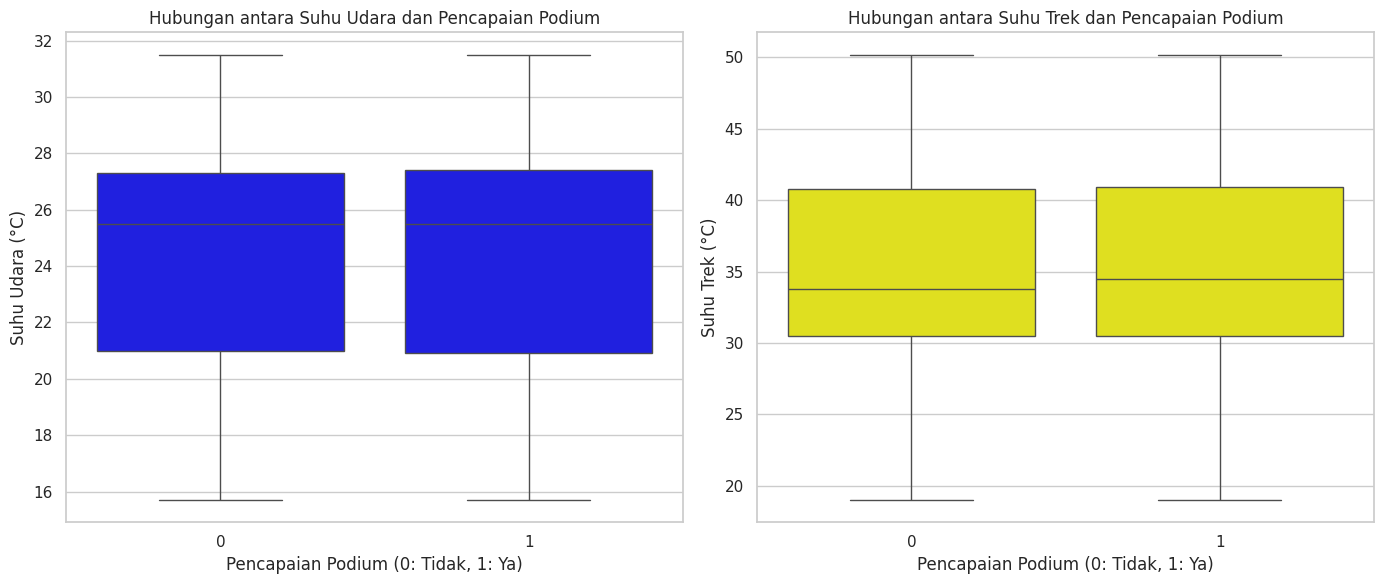

In [93]:
# Menyiapkan area
plt.figure(figsize=(14, 6))

# Membuat boxplot untuk menganalisis hubungan antara Suhu Udara dan Pencapaian Podium
plt.subplot(1, 2, 1)
sns.boxplot(x='IsPodium', y='AirTemp', data=f1_df, color='blue')
plt.title('Hubungan antara Suhu Udara dan Pencapaian Podium')
plt.xlabel('Pencapaian Podium (0: Tidak, 1: Ya)')
plt.ylabel('Suhu Udara (°C)')

# Membuat boxplot untuk menganalisis hubungan antara Suhu Trek dan Pencapaian Podium
plt.subplot(1, 2, 2)
sns.boxplot(x='IsPodium', y='TrackTemp', data=f1_df, color='yellow')
plt.title('Hubungan antara Suhu Trek dan Pencapaian Podium')
plt.xlabel('Pencapaian Podium (0: Tidak, 1: Ya)')
plt.ylabel('Suhu Trek (°C)')

# Menyesuaikan tata letak plot untuk menghindari tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

Dari visualisasi hubungan antara kondisi cuaca dan pencapaian podium, dapat diamati hal-hal berikut ini:

* Suhu Udara (AirTemp) vs. Pencapaian Podium: Distribusi suhu udara untuk driver yang mencapai podium dan yang tidak mencapai podium tampaknya sangat mirip. Box plot menunjukkan bahwa median, kuartil, dan rentang suhu udara tidak berbeda secara signifikan antara kedua kelompok. Hal ini mendukung kesimpulan analisis korelasi bahwa suhu udara tidak memiliki pengaruh yang signifikan terhadap pencapaian podium.

* Suhu Trek (TrackTemp) vs. Pencapaian Podium: Mirip dengan suhu udara, distribusi suhu trek untuk driver yang mencapai podium dan yang tidak juga tampak serupa. Meskipun ada perbedaan minimal dalam median suhu trek antara driver yang mencapai podium dan yang tidak, perbedaan ini tidak cukup signifikan untuk menyatakan suhu trek sebagai faktor penentu kesuksesan podium.

### **Hasil Analisis Nomor 2**

Berdasarkan serangkaian analisis yang dilakukan untuk memahami ciri-ciri driver dengan kategori posisi 'Pos_cat' Podium dalam dataset Formula 1, berikut adalah kesimpulan utama yang dapat ditarik:

* **Waktu Putaran dan Konsistensi**

Driver yang mencapai podium rata-rata memiliki waktu putaran yang lebih cepat dibandingkan dengan driver yang tidak mencapai podium. Hal ini menegaskan pentingnya konsistensi dan kecepatan selama balapan untuk mencapai hasil yang sukses.

* **Pengaruh Kecepatan**

Tidak ada korelasi yang signifikan antara kecepatan maksimum di titik-titik pengukuran tertentu (SpeedI1, SpeedI2, SpeedFL, SpeedST) dengan kesuksesan di podium. Hasil analisis menunjukkan bahwa keberhasilan di podium tidak selalu bergantung pada kecepatan tertinggi yang dicapai, melainkan pada keseimbangan antara kecepatan, strategi, dan adaptasi dengan kondisi balapan.

* **Kinerja di Sektor**

Analisis waktu sektor menunjukkan bahwa driver yang mencapai podium cenderung memiliki performa yang lebih baik di masing-masing sektor trek dibandingkan dengan driver yang tidak mencapai podium. Hasil kinerja pada sektor menegaskan bahwa keseimbangan kinerja yang kuat di seluruh sektor adalah kunci untuk mencapai podium.

* **Strategi Ban**

Jenis ban dan usia ban (TyreLife) menunjukkan variasi dalam distribusinya di antara driver yang mencapai podium, menandakan pentingnya strategi ban yang sesuai dengan kondisi balapan dan preferensi driver.

* **Performa Puncak**

Banyak driver yang mencapai podium juga mencatat waktu putaran terbaik pribadi mereka selama balapan, yang mengindikasikan pentingnya mencapai dan mempertahankan performa puncak untuk berhasil mencapai podium

* **Pengaruh Kondisi Cuaca**

Meskipun kondisi cuaca seperti suhu udara, suhu trek, kelembapan, dan kecepatan angin tidak menunjukkan korelasi yang signifikan dengan keberhasilan mencapai podium dalam analisis ini, adaptasi strategis terhadap kondisi cuaca tetap berperan penting. Pemilihan strategi yang tepat berdasarkan kondisi cuaca bisa menentukan kecepatan optimal dan pengaturan aerodinamis mobil.

Secara keseluruhan, keberhasilan di podium dalam Formula 1 adalah hasil dari kombinasi antara kecepatan, konsistensi, adaptasi strategis terhadap kondisi balapan, pemilihan ban yang tepat, dan kemampuan untuk mencapai performa puncak pada waktu yang tepat.

## Nomor 3

###Analisis perbedaan ketika sirkuit hujan ‘Rainfall’ atau tidak (Bintang)


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18788 entries, 0 to 18787
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  18788 non-null  int64  
 1   Time                18788 non-null  object 
 2   LapTime             18498 non-null  float64
 3   Stint               18788 non-null  float64
 4   PitOutTime          1039 non-null   object 
 5   PitInTime           735 non-null    object 
 6   Sector1Time         18381 non-null  object 
 7   Sector2Time         18749 non-null  object 
 8   Sector3Time         18696 non-null  object 
 9   Sector1SessionTime  18344 non-null  object 
 10  Sector2SessionTime  18749 non-null  object 
 11  Sector3SessionTime  18696 non-null  object 
 12  SpeedI1             15871 non-null  float64
 13  SpeedI2             18749 non-null  float64
 14  SpeedFL             18013 non-null  float64
 15  SpeedST             17096 non-null  float64
 16  IsPe

In [95]:

df_3 = df.copy()

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding untuk setiap kolom non-numerik
for column in df_3.columns:
    if df_3[column].dtype == 'object':  # Memeriksa apakah kolom non-numerik
        df_3[column] = label_encoder.fit_transform(df_3[column])

# Menampilkan lima baris pertama dari DataFrame df_3
print(df_3.head())


      ID   Time  LapTime  Stint  PitOutTime  PitInTime  Sector1Time  \
0  14609  16243  100.943    6.0         949        735        10884   
1   3211   1943  108.067    1.0        1039        735        10529   
2   2497  15469   82.881    2.0        1039        735         5545   
3  13639     45   91.585    1.0         131        735        11540   
4   1280   8044   94.742    2.0        1039        735         9109   

   Sector2Time  Sector3Time  Sector1SessionTime  ...  Deleted  DeletedReason  \
0         1851         4783               15898  ...    False            226   
1         9870         4342                1625  ...    False            226   
2          345         9674               15113  ...    False            226   
3         1833         7295               18322  ...    False            226   
4         2472         6923                7700  ...    False            226   

   AirTemp  Humidity  Pressure  Rainfall  TrackTemp  WindDirection  WindSpeed  \
0     17.1 

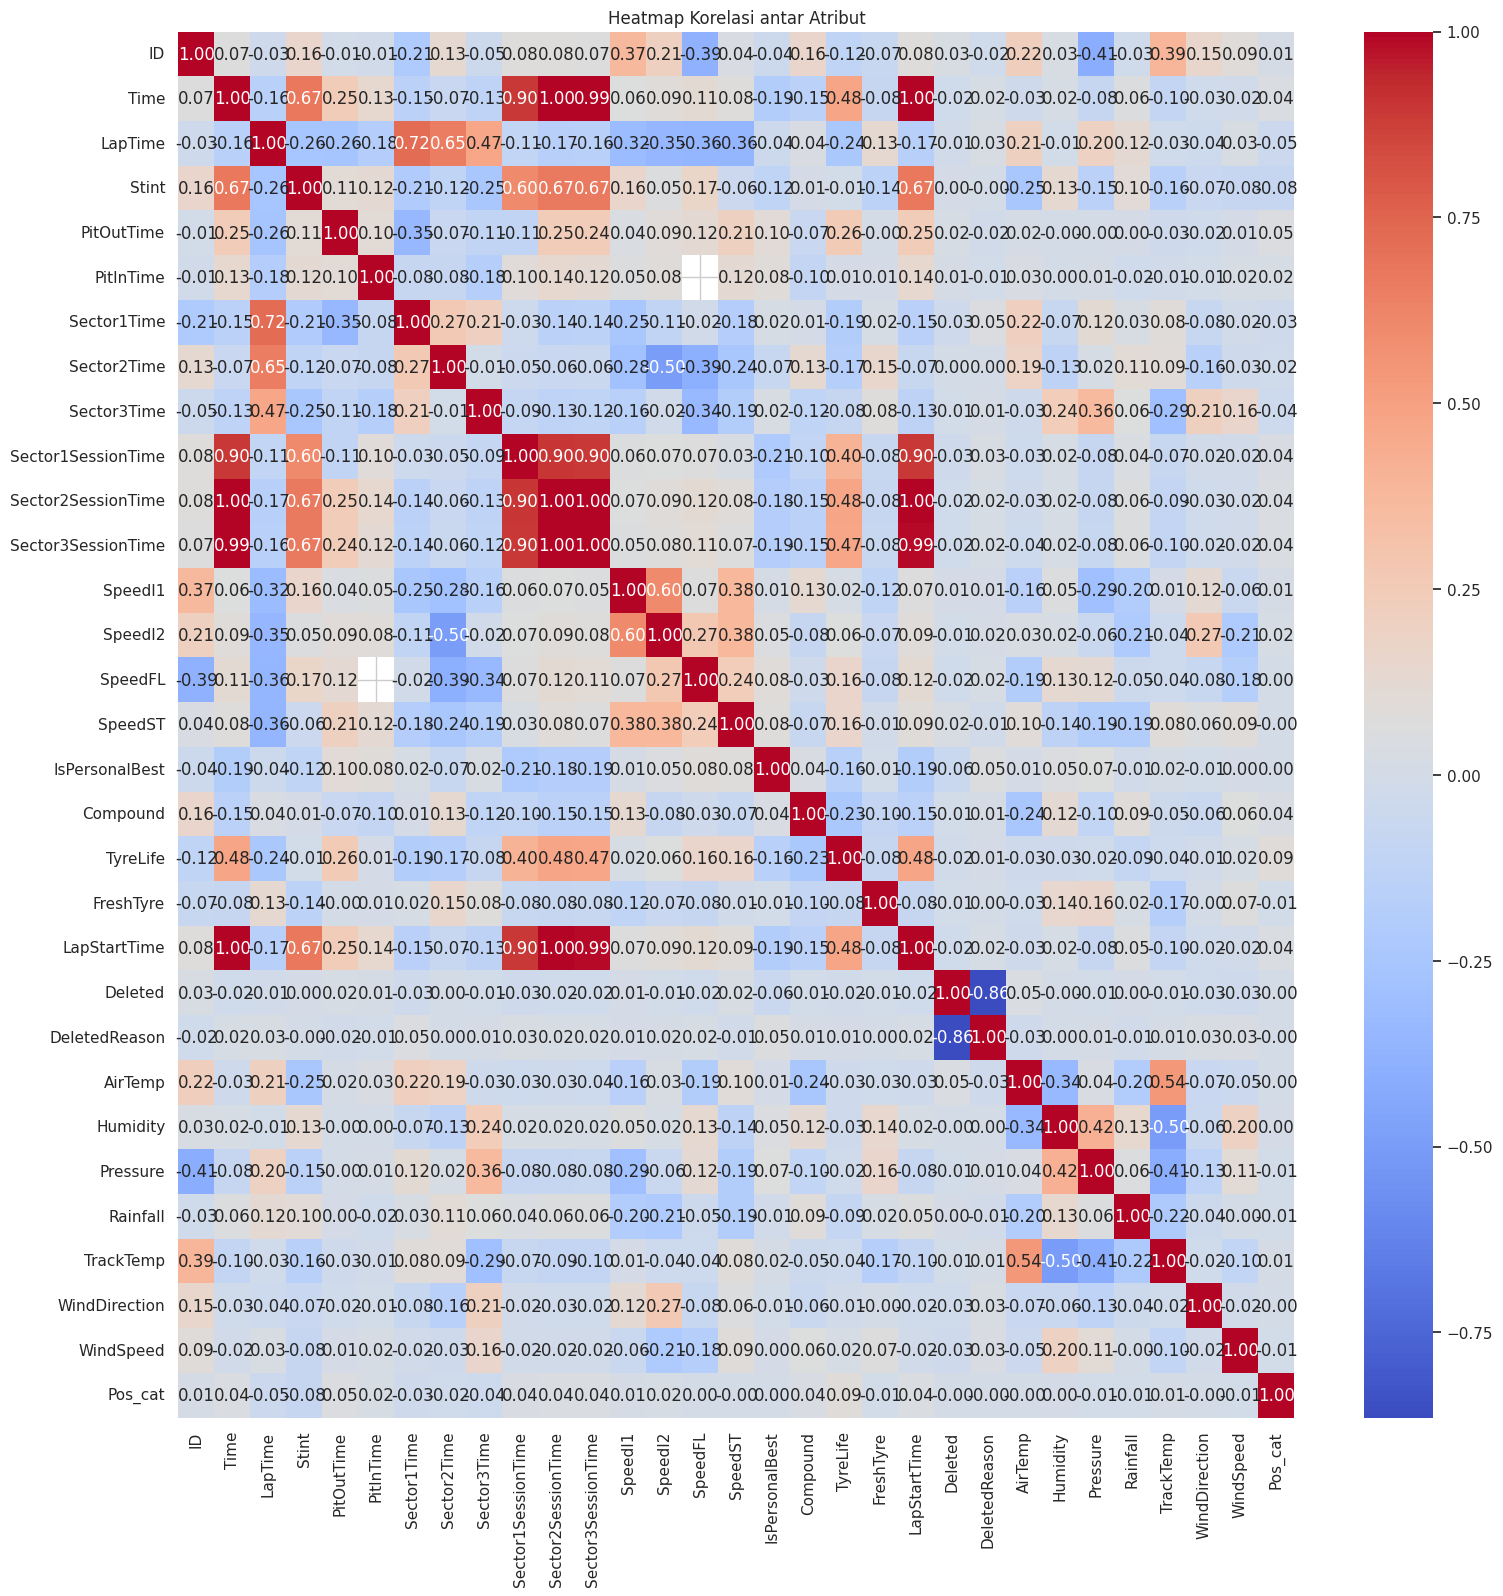

In [96]:
# Menghitung korelasi antar atribut saat Rainfall
correlation_matrix = df_3.corr()

# Mengatur ukuran gambar
plt.figure(figsize=(18, 18))

# Membuat heatmap dari korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Atribut')
plt.show()

Berdasarkan heatmap diatas, dapat dilihat bahwa korelasi antara setiap variabel terhadap rainfall cukup lemah, hal ini dapatdikatakan bahwa Rainfall tidak berpengaruh signifikan terhadap variabel lain. Namun, rendahnya korelasi linier tidak selalu berarti tidak ada hubungan antara dua variabel.

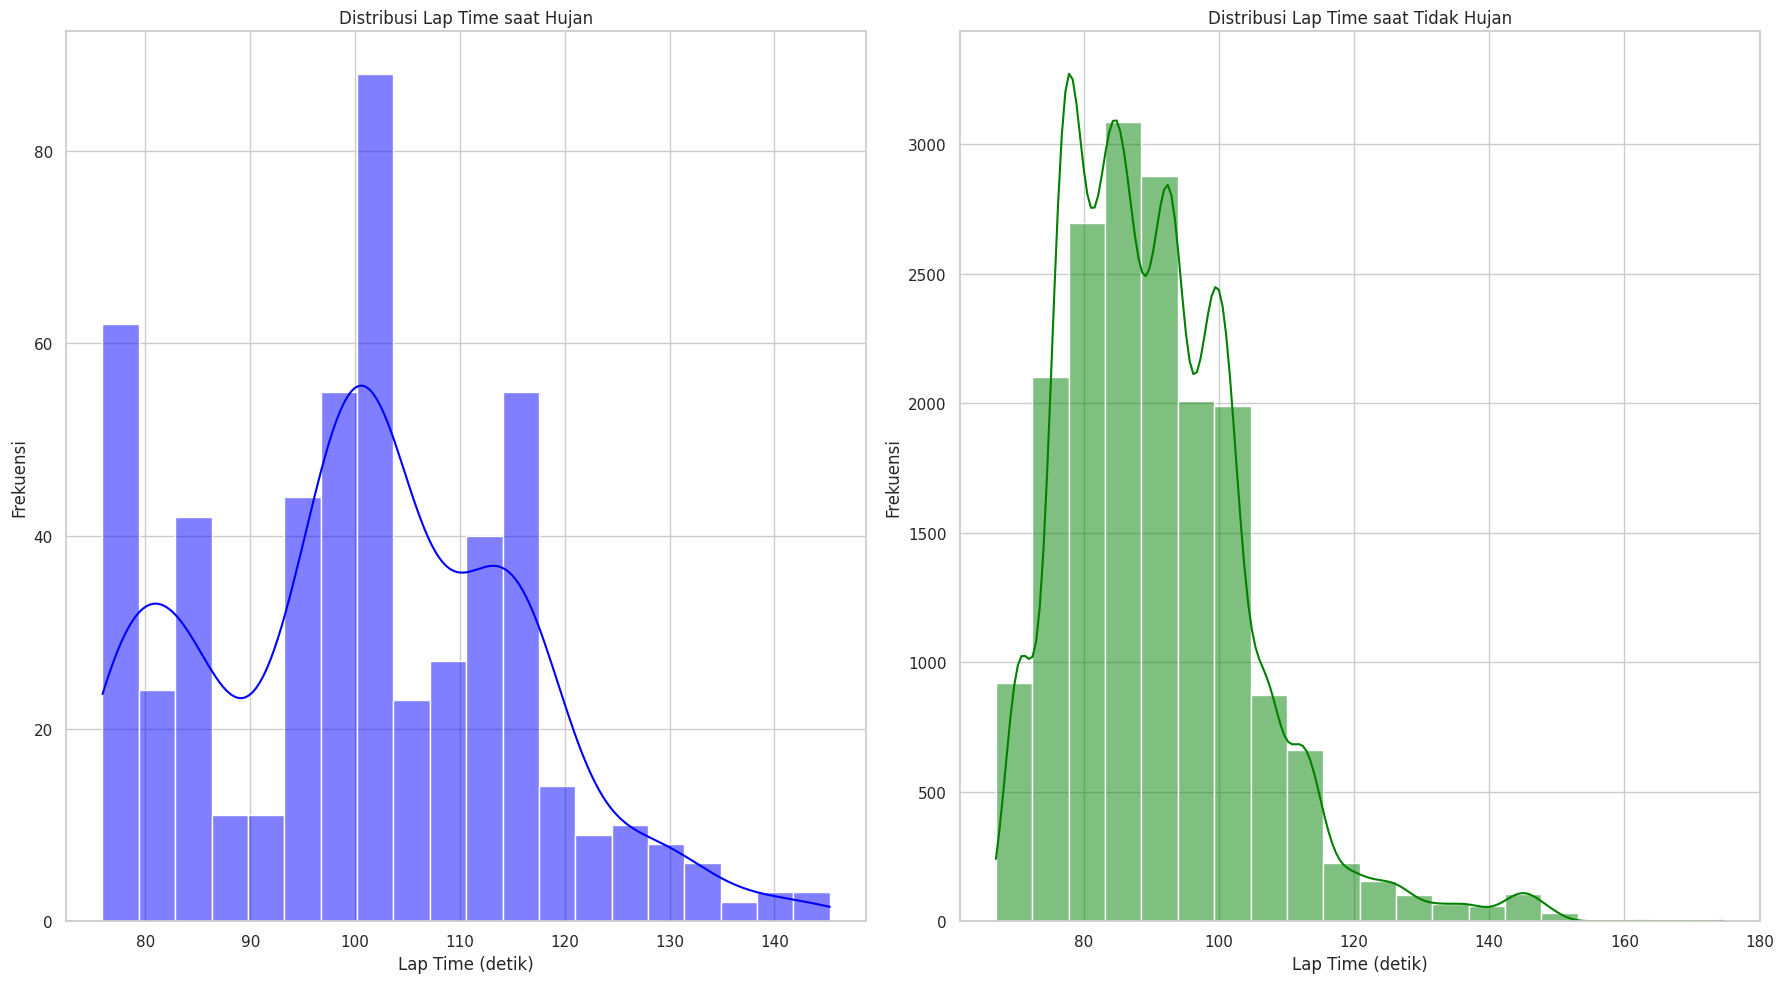

Modus Lap Time saat Hujan: [ 84.932 100.28  100.446 101.277 106.026 116.499]
Rata-rata Lap Time saat Hujan: 100.73363873370577
Modus Lap Time saat Tidak Hujan: [76.993]
Rata-rata Lap Time saat Tidak Hujan: 90.73090278937698


In [97]:
# Filter data berdasarkan kondisi hujan dan tidak hujan
rainy_laptimes = df[df['Rainfall'] == True]['LapTime']
non_rainy_laptimes = df[df['Rainfall'] == False]['LapTime']

# Plotting histogram
plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
sns.histplot(rainy_laptimes, color='blue', kde=True, bins=20)
plt.title('Distribusi Lap Time saat Hujan')
plt.xlabel('Lap Time (detik)')
plt.ylabel('Frekuensi')

# Plotting histogram untuk lap time saat tidak hujan
plt.subplot(1, 2, 2)
sns.histplot(non_rainy_laptimes, color='green', kde=True, bins=20)
plt.title('Distribusi Lap Time saat Tidak Hujan')
plt.xlabel('Lap Time (detik)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

mode_rainy_laptimes = rainy_laptimes.mode().values
mean_rainy_laptimes = rainy_laptimes.mean()

# Menghitung modus dan rata-rata lap time saat tidak hujan
mode_non_rainy_laptimes = non_rainy_laptimes.mode().values
mean_non_rainy_laptimes = non_rainy_laptimes.mean()

print("Modus Lap Time saat Hujan:", mode_rainy_laptimes)
print("Rata-rata Lap Time saat Hujan:", mean_rainy_laptimes)

print("Modus Lap Time saat Tidak Hujan:", mode_non_rainy_laptimes)
print("Rata-rata Lap Time saat Tidak Hujan:", mean_non_rainy_laptimes)

Rainfall :
- Saat Rainfall, pada grafik histogram yang ada disebelah kiri, dapat dilihat bahwa frekuensi tertinggi untuk Lap Time Ada pada rentang 100-105 detik dengan rata rata Lap Time 100 detik

Non Rainfall :    
- Saat Non Rainfall, pada grafik histogram yang ada disebelah kanan, dapat dilihat bahwa frekuensi tertinggi untuk Lap Time Ada pada rentang 85-95 detik dengan rata rata Lap Time 90 detik

Hasil Analisis :    
Berdasarkan analisis diatas, didapat bahwa ada pengaruh antara kondisi Rainfall dan Non Rainfall terhadap Lap Time. Pada kondisi Rainfall, Lap Time yang tercatat cenderung lebih tinggi (lambat) dibanding pada saat Non Rainfall yang cenderung lebih rendah (cepat).
Artinya, driver cenderung memiliki Lap Time yang lebih bagus pada saat kondisi Non Rainfall.

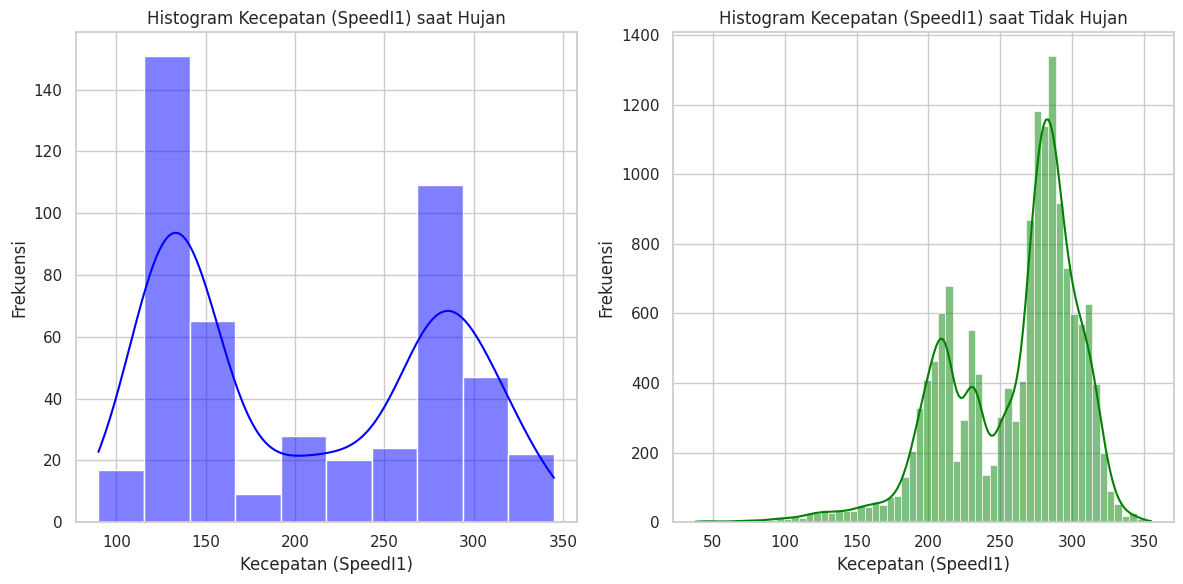

In [98]:
sns.set(style="whitegrid")

rainy_data = df[df['Rainfall'] == True]
non_rainy_data = df[df['Rainfall'] == False]

plt.figure(figsize=(12, 6))



# Histogram untuk kecepatan saat hujan
plt.subplot(1, 2, 1)
sns.histplot(rainy_data['SpeedI1'], color='blue', kde=True)
plt.title('Histogram Kecepatan (SpeedI1) saat Hujan')
plt.xlabel('Kecepatan (SpeedI1)')
plt.ylabel('Frekuensi')

# Histogram untuk kecepatan saat tidak hujan
plt.subplot(1, 2, 2)
sns.histplot(non_rainy_data['SpeedI1'], color='green', kde=True)
plt.title('Histogram Kecepatan (SpeedI1) saat Tidak Hujan')
plt.xlabel('Kecepatan (SpeedI1)')
plt.ylabel('Frekuensi')

# Menampilkan plot
plt.tight_layout()
plt.show()

Rainfall :

*   Dari visualisasi histogram tersebut, Histogram di sebelah kiri menunjukkan kecepatan lebih tersebar saat hujan, Kecepatannya berkisar antara 50 hingga 350 mph, dengan kecepatan yang paling sering terjadi antara 150 hingga 250 mph. Terdapat tail yang lebih panjang di sisi kanan histogram, menunjukkan bahwa ada beberapa driver yang bergerak jauh lebih cepat dari rata-rata.
* Pada grafik histogram disebelah kiri,  kecepatan terbanyak berada pada rentang 100 - 150 mph. Berarti dapat dikatakan ketika cuaca hujan, kecepatan driver cenderung lebih rendah.

* Dapat disimpulkan distribusi kecepatan pengemudi cenderung lebih tersebar, dengan kecepatan yang bervariasi dari 50 hingga 350 mph. Ini menunjukkan adanya variasi besar dalam kecepatan pengemudi saat kondisi cuaca buruk.



Not-RainFall :


*   Histogram di sebelah kanan menunjukkan bahwa kecepatan  lebih terkonsentrasi saat tidak hujan. Kecepatannya berkisar antara 100 hingga 300 mph, dengan kecepatan yang paling sering terjadi antara 200 hingga 250 mph.

* Pada grafik histogram disebelah kanan,  kecepatan terbanyak berada pada rentang 250 - 300 mph. Berarti dapat dikatakan ketika cuaca tidak hujan, kecepatan driver cenderung tinggi.


* Di sisi lain, saat tidak hujan, distribusi kecepatan cenderung lebih terkonsentrasi, dengan kecepatan yang berkisar antara 100 hingga 300 mph. Hal ini menandakan bahwa pengemudi cenderung mempertahankan kecepatan yang lebih konsisten saat kondisi cuaca baik.


Berdasarkan hasil tersebut, dapat dikatakan bahwa ada pengaruh ketika kondisi rainfall atau tidak rainfall terhadap kecepatan driver (SpeedI1).



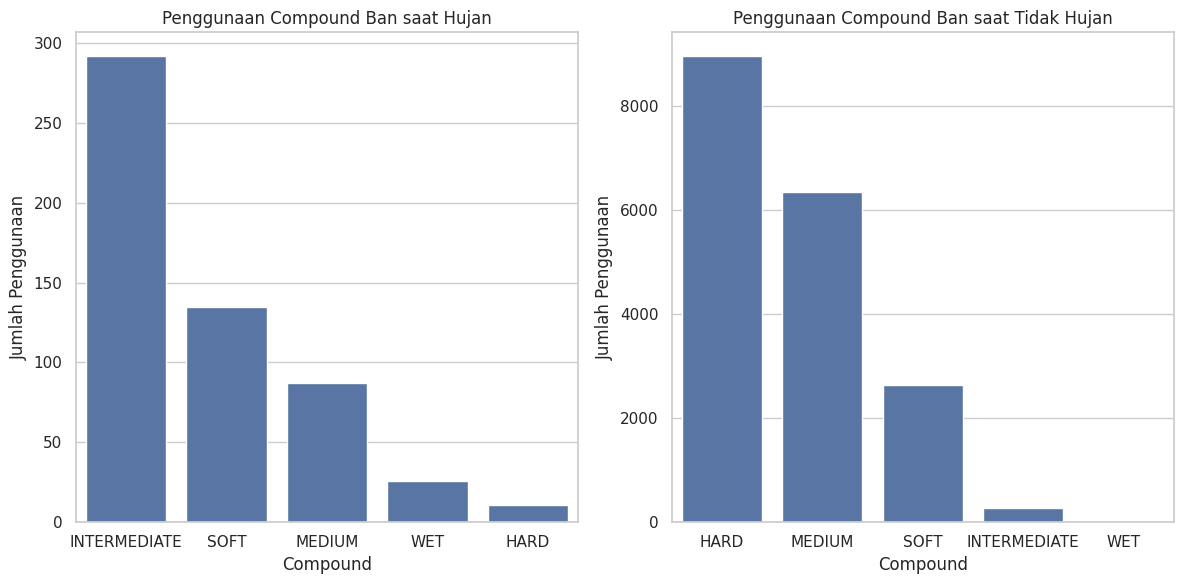

In [99]:
compound_usage_rainy = df[df['Rainfall'] == True]['Compound'].value_counts()
compound_usage_non_rainy = df[df['Rainfall'] == False]['Compound'].value_counts()

# Plotting bar plot untuk kondisi hujan
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=compound_usage_rainy.index, y=compound_usage_rainy.values)
plt.title('Penggunaan Compound Ban saat Hujan')
plt.xlabel('Compound')
plt.ylabel('Jumlah Penggunaan')

# Plotting bar plot untuk kondisi tidak hujan
plt.subplot(1, 2, 2)
sns.barplot(x=compound_usage_non_rainy.index, y=compound_usage_non_rainy.values)
plt.title('Penggunaan Compound Ban saat Tidak Hujan')
plt.xlabel('Compound')
plt.ylabel('Jumlah Penggunaan')

plt.tight_layout()
plt.show()



*   Berdasarkan hasil visualisasi, terlihat bahwa penggunaan compound ban saat hujan (Rainfall) didominasi oleh jenis intermediate dan soft. Terdapat juga penggunaan compound wet, yang merupakan pilihan yang wajar untuk kondisi basah. Hal ini menunjukkan bahwa dalam kondisi hujan, para pembalap lebih memilih jenis ban yang dapat memberikan cengkeraman lebih baik terhadap lintasan yang licin

*   Di sisi lain, saat tidak hujan atau kondisi tidak rainfall, pola penggunaan compound ban berbeda. Jumlah penggunaan compound wet menurun drastis atau bahkan tidak ada, yang sesuai dengan kondisi cuaca yang kering. Sebaliknya, penggunaan compound ban jenis Hard menjadi dominan, dengan sedikit atau tanpa penggunaan jenis ban lainnya. Ini menunjukkan bahwa pada kondisi cuaca kering, pembalap lebih memilih ban yang lebih tahan lama dan stabil, seperti jenis ban Hard, untuk mendapatkan performa yang optimal di lintasan.



## Nomor 4

###Adakah rentang umur ban ‘TyreLife’ dengan performa terbaik dibandingkan rentang umur ban lainnya? (Rafi)

In [100]:
# Konversi 'LapTime' dari format string ke detik total
f1_df['LapTime_seconds'] = pd.to_timedelta(f1_df['LapTime']).dt.total_seconds()

# Menghapus baris dengan nilai yang hilang di kolom 'TyreLife' dan 'LapTime_seconds'
df_clean = f1_df.dropna(subset=['TyreLife', 'LapTime_seconds'])

# Konversi 'TyreLife' ke tipe data float
df_clean['TyreLife'] = df_clean['TyreLife'].astype(float)

# Mengecek tipe data dan menghitung jumlah nilai yang hilang setelah konversi dan pembersihan
df_clean.dtypes[['TyreLife', 'LapTime_seconds']], df_clean[['TyreLife', 'LapTime_seconds']].isnull().sum()

<ipython-input-100-e66863c856bd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TyreLife'] = df_clean['TyreLife'].astype(float)


(TyreLife           float64
 LapTime_seconds    float64
 dtype: object,
 TyreLife           0
 LapTime_seconds    0
 dtype: int64)

In [101]:
# Menghitung kuartil pertama, median, dan kuartil ketiga untuk 'TyreLife'
quartiles = df_clean['TyreLife'].quantile([0.25, 0.5, 0.75])

quartiles

0.25     7.0
0.50    12.0
0.75    20.0
Name: TyreLife, dtype: float64

In [102]:
# Membuat kolom baru dengan kategori kelompok TyreLife berdasarkan jumlah lap
conditions = [
    (df_clean['TyreLife'] <= 7),
    (df_clean['TyreLife'] > 7) & (df_clean['TyreLife'] <= 12),
    (df_clean['TyreLife'] > 12) & (df_clean['TyreLife'] <= 20),
    (df_clean['TyreLife'] > 20)
]
choices = ['1 to 7 laps', '8 to 12 laps', '13 to 20 laps', 'More than 20 laps']
df_clean['TyreLifeGroup'] = np.select(conditions, choices, default='Unknown')

# Menghitung dan mengurutkan rata-rata waktu lap untuk setiap kategori TyreLife
grouped_performance = df_clean.groupby('TyreLifeGroup')['LapTime_seconds'].mean().sort_values()

grouped_performance

<ipython-input-102-9cf9f02bbc05>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TyreLifeGroup'] = np.select(conditions, choices, default='Unknown')


TyreLifeGroup
More than 20 laps    86.811477
13 to 20 laps        89.304758
8 to 12 laps         90.957617
1 to 7 laps          95.949083
Name: LapTime_seconds, dtype: float64

Berdasarkan analisis rata-rata waktu putaran (LapTime_seconds) untuk setiap kelompok TyreLife, kami menemukan hasil sebagai berikut:

* Kelompok 1 (1 to 7 laps): Rata-rata waktu putaran adalah 95.95 detik.
* Kelompok 2 (8 to 12 laps): Rata-rata waktu putaran adalah 90.96 detik.
* Kelompok 3 (13 to 20 laps): Rata-rata waktu putaran adalah 89.30 detik.
* Kelompok 4 (More than 20 laps): Rata-rata waktu putaran adalah 86.81 detik

Dari analisis ini, kami dapat menyimpulkan bahwa ban dengan TyreLife lebih dari 20 laps (Kelompok 4) menunjukkan performa terbaik dibandingkan dengan kelompok TyreLife lainnya, mengingat rata-rata waktu putarannya yang paling rendah. Hasil ini menunjukkan bahwa ban mungkin mencapai performa optimalnya setelah digunakan untuk jangka waktu yang lebih lama karena faktor pemanasan dan adaptasi dengan kondisi trek.

In [103]:
# Konversi waktu sektor dari format string ke detik untuk ketiga sektor
df_clean['Sector1Time_seconds'] = pd.to_timedelta(df_clean['Sector1Time']).dt.total_seconds()
df_clean['Sector2Time_seconds'] = pd.to_timedelta(df_clean['Sector2Time']).dt.total_seconds()
df_clean['Sector3Time_seconds'] = pd.to_timedelta(df_clean['Sector3Time']).dt.total_seconds()

# Menghitung rata-rata waktu untuk masing-masing sektor di setiap kelompok TyreLife dan mereset index untuk hasil akhir
sector_times_by_group = df_clean.groupby('TyreLifeGroup').agg({
    'Sector1Time_seconds': 'mean',
    'Sector2Time_seconds': 'mean',
    'Sector3Time_seconds': 'mean'
}).reset_index()

sector_times_by_group

<ipython-input-103-b8d7d1ca2bea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sector1Time_seconds'] = pd.to_timedelta(df_clean['Sector1Time']).dt.total_seconds()
<ipython-input-103-b8d7d1ca2bea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sector2Time_seconds'] = pd.to_timedelta(df_clean['Sector2Time']).dt.total_seconds()
<ipython-input-103-b8d7d1ca2bea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

TyreLifeGroup  Sector1Time_seconds  Sector2Time_seconds  \
0        1 to 7 laps            30.896480            37.112739   
1      13 to 20 laps            27.430337            35.598001   
2       8 to 12 laps            28.164399            36.221980   
3  More than 20 laps            27.155352            33.326556   

   Sector3Time_seconds  
0            27.743057  
1            26.276421  
2            26.554048  
3            26.329569

Analisis waktu sektor berdasarkan kelompok TyreLife, kita menemukan hasil berikut:

Sektor 1:

* Kelompok 1 (1 to 7 laps): Rata-rata waktu sektor adalah 30.90 detik.
* Kelompok 2 (8 to 12 laps): Rata-rata waktu sektor adalah 28.16 detik.
* Kelompok 3 (13 to 20 laps): Rata-rata waktu sektor adalah 27.43 detik.
* Kelompok 4 (More than 20 laps): Rata-rata waktu sektor adalah 27.16 detik.

Sektor 2:

* Kelompok 1 (1 to 7 laps): Rata-rata waktu sektor adalah 37.11 detik.
* Kelompok 2 (8 to 12 laps): Rata-rata waktu sektor adalah 36.22 detik.
* Kelompok 3 (13 to 20 laps): Rata-rata waktu sektor adalah 35.60 detik.
* Kelompok 4 (More than 20 laps): Rata-rata waktu sektor adalah 33.33 detik.

Sektor 3:

* Kelompok 1 (1 to 7 laps): Rata-rata waktu sektor adalah 27.74 detik.
* Kelompok 2 (8 to 12 laps): Rata-rata waktu sektor adalah 26.55 detik.
* Kelompok 3 (13 to 20 laps): Rata-rata waktu sektor adalah 26.28 detik.
* Kelompok 4 (More than 20 laps): Rata-rata waktu sektor adalah 26.33 detik.

Berdasarkan hasil ini, bisa dilihat bahwa secara umum, ban dengan TyreLife yang lebih tinggi (khususnya kelompok 4, lebih dari 20 laps) cenderung memiliki rata-rata waktu sektor yang lebih rendah, menunjukkan performa yang lebih baik di lintasan.

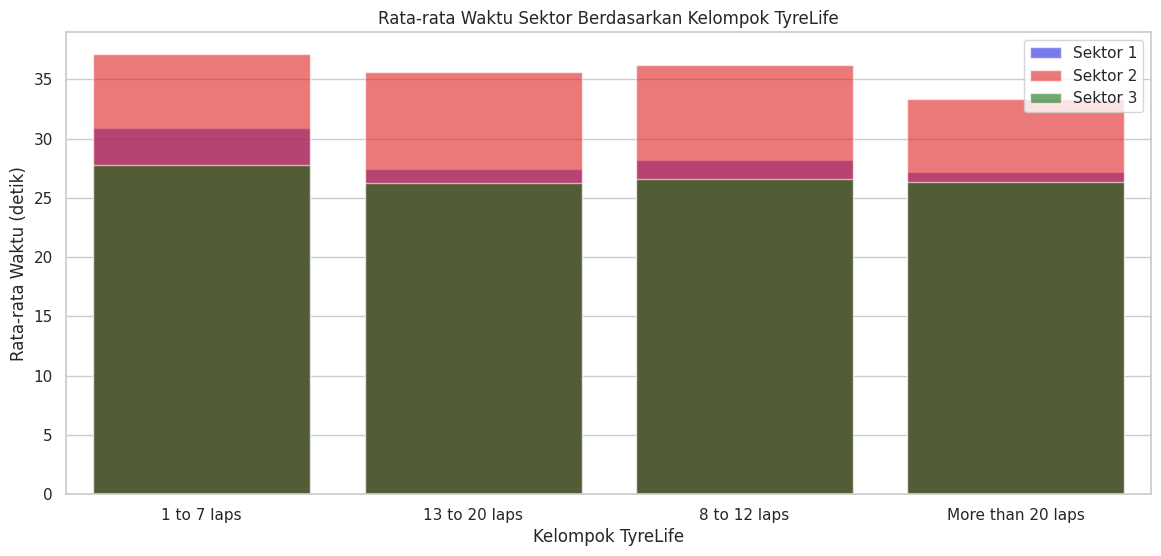

In [104]:
# Mengatur style visualisasi dengan grid putih untuk keseragaman tampilan
sns.set(style="whitegrid")

# Menyiapkan area gambar dengan ukuran tertentu untuk visualisasi waktu sektor
plt.figure(figsize=(14, 6))

# Membuat bar plot untuk rata-rata waktu Sektor 1 berdasarkan kelompok TyreLife
sns.barplot(x='TyreLifeGroup', y='Sector1Time_seconds', data=sector_times_by_group, label='Sektor 1', color='blue', alpha=0.6)

# Membuat bar plot untuk rata-rata waktu Sektor 2 berdasarkan kelompok TyreLife
sns.barplot(x='TyreLifeGroup', y='Sector2Time_seconds', data=sector_times_by_group, label='Sektor 2', color='red', alpha=0.6)

# Membuat bar plot untuk rata-rata waktu Sektor 3 berdasarkan kelompok TyreLife
sns.barplot(x='TyreLifeGroup', y='Sector3Time_seconds', data=sector_times_by_group, label='Sektor 3', color='green', alpha=0.6)

# Mengatur judul, label untuk sumbu, dan legenda
plt.title('Rata-rata Waktu Sektor Berdasarkan Kelompok TyreLife')
plt.ylabel('Rata-rata Waktu (detik)')
plt.xlabel('Kelompok TyreLife')
plt.legend()

# Menampilkan plot
plt.show()

Di atas adalah visualisasi dari rata-rata waktu untuk masing-masing sektor (Sektor 1, Sektor 2, dan Sektor 3) berdasarkan kelompok TyreLife. Dari grafik, kami bisa melihat beberapa temuan kunci:

* Sektor 1: Terdapat penurunan rata-rata waktu sektor yang signifikan dari kelompok "1 to 7 laps" ke kelompok "More than 20 laps" yang menunjukkan peningkatan performa seiring bertambahnya umur ban.
* Sektor 2: Mirip dengan Sektor 1, terdapat penurunan waktu sektor yang konsisten dari kelompok dengan TyreLife terendah ke kelompok dengan TyreLife tertinggi. Penurunan ini menunjukkan bahwa ban cenderung berperforma lebih baik di Sektor 2 seiring bertambahnya usia.
* Sektor 3: Meskipun penurunan waktu rata-rata tidak sebesar di dua sektor lainnya, masih terlihat penurunan performa yang jelas dari kelompok "1 to 7 laps" ke kelompok "More than 20 laps".

### Hasil Analisis Pertanyaan Nomor 4

Berdasarkan analisis yang telah kami lakukan terkait hubungan antara umur ban (TyreLife) dan performa di Formula 1, berikut adalah kesimpulan utama:

* Performa Berdasarkan TyreLife:

Ban dengan TyreLife lebih dari 20 laps (Kelompok 4) menunjukkan performa terbaik dibandingkan dengan kelompok TyreLife lainnya, dengan rata-rata waktu putaran yang paling rendah. Hasil menunjukkan bahwa, secara umum, ban mungkin mencapai kondisi optimalnya setelah digunakan untuk jangka waktu yang lebih lama, kemungkinan karena faktor-faktor seperti pemanasan yang kuat dan adaptasi lebih baik dengan kondisi lintasan.

* Analisis Sektor Waktu:

Analisis waktu sektor mengungkapkan bahwa penurunan waktu sektor yang konsisten terjadi seiring bertambahnya TyreLife, dengan ban yang memiliki TyreLife lebih dari 20 laps menunjukkan performa sektor terbaik secara keseluruhan. Hasil menegaskan bahwa ban berumur lebih mampu menyediakan grip yang lebih baik dan stabil, yang penting untuk mencapai waktu lap yang optimal.

## Nomor 5

###Analisis Performa Berdasarkan Kondisi Cuaca: Bagaimana kondisi cuaca (suhu udara, suhu trek, kelembapan, dan tekanan udara) mempengaruhi performa lap? (Rafi)

In [105]:
# Mengubah 'LapTime' dari format string ke total detik untuk analisis
f1_df['LapTimeSeconds'] = pd.to_timedelta(f1_df['LapTime']).dt.total_seconds()

In [106]:
# Menghitung matriks korelasi untuk kondisi cuaca dan waktu putaran
weather_conditions = ['LapTimeSeconds', 'AirTemp', 'TrackTemp', 'Humidity', 'Pressure']
weather_correlation_matrix = f1_df[weather_conditions].corr()

# Menampilkan nilai korelasi antara 'LapTimeSeconds' dan variabel cuaca
weather_correlation_matrix['LapTimeSeconds']

LapTimeSeconds    1.000000
AirTemp           0.212326
TrackTemp        -0.025445
Humidity         -0.009037
Pressure          0.198261
Name: LapTimeSeconds, dtype: float64

Berdasarkan matriks korelasi yang dihasilkan, kami dapat melihat bagaimana kondisi cuaca mempengaruhi performa lap dalam hal waktu lap (LapTimeSeconds):

* Suhu Udara (AirTemp): Ada korelasi positif sedang dengan waktu lap, sebesar 0.212. Ini menunjukkan bahwa suhu udara yang lebih tinggi cenderung dikaitkan dengan waktu lap yang lebih lama.
* Suhu Trek (TrackTemp): Korelasi dengan waktu lap sangat rendah (-0.025). Ini mengindikasikan bahwa suhu trek tidak memiliki pengaruh yang signifikan terhadap waktu lap.
* Kelembapan (Humidity): Korelasi sangat rendah (-0.009) dengan waktu lap, menunjukkan bahwa kelembapan udara memiliki pengaruh yang sangat kecil atau tidak signifikan terhadap waktu lap.
* Tekanan Udara (Pressure): Ada korelasi positif sedang (0.198) dengan waktu lap, menunjukkan bahwa tekanan udara yang lebih tinggi mungkin dikaitkan dengan waktu lap yang sedikit lebih lama.

In [107]:
# Melakukan analisis statistik deskriptif untuk kondisi cuaca dan waktu putaran
weather_conditions = ['AirTemp', 'TrackTemp', 'Humidity', 'Pressure', 'LapTimeSeconds']
weather_descriptive_stats = f1_df[weather_conditions].describe()

# Mencetak hasil statistik deskriptif
print(weather_descriptive_stats)

            AirTemp     TrackTemp      Humidity      Pressure  LapTimeSeconds
count  18788.000000  18788.000000  18788.000000  18788.000000    18498.000000
mean      24.561012     35.540744     51.980679    986.385336       91.021284
std        4.337176      6.596015     14.937573     55.092773       13.600084
min       15.700000     19.000000     18.000000    778.500000       67.012000
25%       21.000000     30.500000     41.000000    992.900000       80.497000
50%       25.500000     33.900000     55.000000   1008.200000       89.326000
75%       27.300000     40.800000     63.000000   1013.000000       99.172750
max       31.500000     50.200000     81.000000   1018.700000      174.634000


Dari analisis statistik deskriptif yang telah dilakukan, kami dapat menyimpulkan beberapa hal mengenai kondisi cuaca dan performa putaran dalam data balap yang disajikan:

1. Variabilitas Kondisi Cuaca:
      * Suhu udara dan suhu trek menunjukkan variasi yang cukup lebar, dengan suhu udara berkisar antara 15.7°C hingga 31.5°C dan suhu trek dari 19.0°C hingga 50.2°C. Hal ini mengindikasikan adanya variasi kondisi cuaca yang signifikan selama balapan, yang bisa berdampak pada kinerja ban dan aerodinamika kendaraan.
      * Kelembapan dan tekanan udara juga menunjukkan variasi yang signifikan, yang bisa mempengaruhi densitas udara dan dengan demikian, performa mesin serta downforce kendaraan.

2. Pengaruh Kondisi Cuaca terhadap Performa Lap:
      * Korelasi antara suhu udara dan waktu putaran adalah positif (0.212), yang menunjukkan bahwa suhu udara yang lebih tinggi cenderung dikaitkan dengan waktu putaran yang lebih lambat, mungkin karena pengaruhnya terhadap performa ban dan mesin.
      * Tekanan udara juga memiliki korelasi positif dengan waktu putaran, yang mungkin menunjukkan bahwa peningkatan tekanan udara yang tinggi (yang meningkatkan densitas udara) bisa meningkatkan resistensi aerodinamis dan memperlambat kendaraan.
      * Suhu trek dan kelembapan memiliki korelasi yang sangat rendah dengan waktu putaran, menunjukkan bahwa mereka memiliki pengaruh minimal atau tidak konsisten terhadap performa lap.

3. Distribusi Waktu Putaran:
    * Waktu putaran memiliki variasi yang signifikan, dari 67.01 detik hingga 174.63 detik, dengan rata-rata sekitar 91.02 detik. Standar deviasi yang relatif besar (13.60 detik) menunjukkan adanya perbedaan besar dalam performa antar putaran

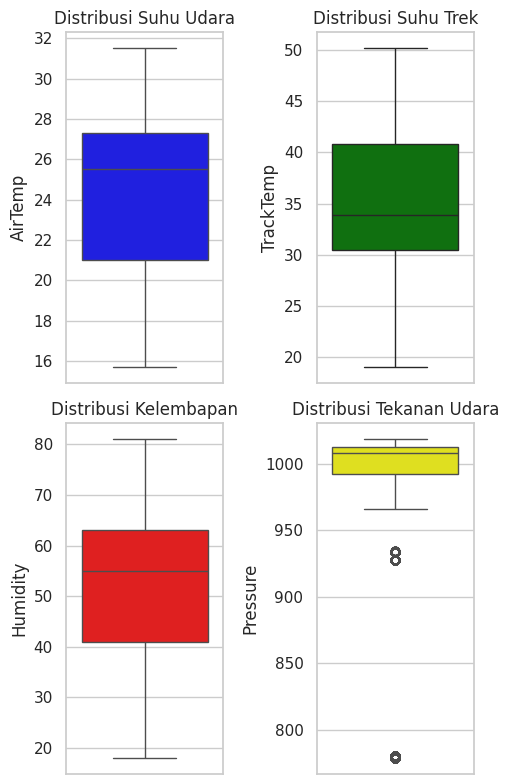

In [108]:
# Menyiapkan area gambar dengan ukuran tertentu
plt.figure(figsize=(5, 8))

# Membuat box plot untuk distribusi suhu udara dengan warna biru
plt.subplot(2, 2, 1)
sns.boxplot(y=f1_df['AirTemp'], color='blue')
plt.title('Distribusi Suhu Udara')

# Membuat box plot untuk distribusi suhu trek dengan warna hijau
plt.subplot(2, 2, 2)
sns.boxplot(y=f1_df['TrackTemp'], color='green')
plt.title('Distribusi Suhu Trek')

# Membuat box plot untuk distribusi kelembapan dengan warna merah
plt.subplot(2, 2, 3)
sns.boxplot(y=f1_df['Humidity'], color='red')
plt.title('Distribusi Kelembapan')

# Membuat box plot untuk distribusi tekanan udara dengan warna kuning
plt.subplot(2, 2, 4)
sns.boxplot(y=f1_df['Pressure'], color='yellow')
plt.title('Distribusi Tekanan Udara')

# Menyesuaikan tata letak plot untuk menghindari tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

Berikut adalah visualisasi distribusi untuk kondisi cuaca dalam data balapan:

1. Distribusi Suhu Udara:

Box plot menunjukkan median suhu udara di tengah range yang telah dilihat sebelumnya. Tidak ada nilai ekstrem yang jelas terlihat pada plot ini yang berarti box plot menunjukkan distribusi yang relatif simetris dan konsisten.

2. Distribusi Suhu Trek:

Plot ini menunjukkan variasi yang lebih luas dibandingkan dengan suhu udara. Suhu trek memiliki range yang lebih tinggi dan median yang terletak di bagian bawah kuartil ketiga, menunjukkan bahwa sebagian besar suhu trek lebih tinggi dari suhu udara.

3. Distribusi Kelembapan:

Kelembapan memiliki distribusi yang lebih seragam dengan sedikit pencilan yang ditandai pada box plot. Median tampaknya berada di tengah, menunjukkan distribusi yang simetris.

4. Distribusi Tekanan Udara:

Tekanan udara menunjukkan beberapa nilai ekstrem di bawah batas normal yang bisa menunjukkan kondisi cuaca yang tidak biasa. Range utama tekanan berada di sekitar nilai rata-rata, dengan distribusi yang cenderung normal

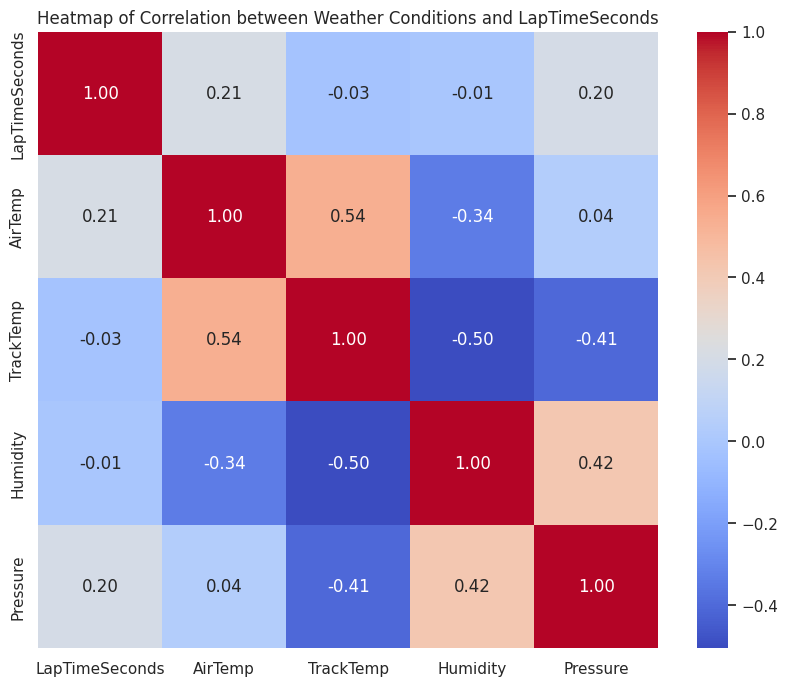

In [109]:
# Menyiapkan area gambar dengan ukuran tertentu membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))

# Membuat heatmap dari matriks korelasi
sns.heatmap(weather_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation between Weather Conditions and LapTimeSeconds')

# Menampilkan heatmap
plt.show()

Berikut adalah hasil dari heatmap yang menggambarkan korelasi antara kondisi cuaca dan waktu lap:

1. LapTimeSeconds vs AirTemp: Korelasi antara waktu lap dan suhu udara tampaknya sangat lemah. Ini menunjukkan bahwa suhu udara memiliki pengaruh kecil terhadap waktu lap.

2. LapTimeSeconds vs TrackTemp: Korelasi antara waktu lap dan suhu trek juga lemah, serupa dengan suhu udara, yang menunjukkan bahwa suhu trek mungkin tidak secara signifikan mempengaruhi waktu lap.

3. LapTimeSeconds vs Humidity: Korelasi antara waktu lap dan kelembapan juga rendah. Ini menunjukkan bahwa kelembapan mungkin tidak berdampak besar pada performa lap.

4. LapTimeSeconds vs Pressure: Sama seperti variabel lainnya, tekanan udara menunjukkan korelasi yang rendah dengan waktu lap, yang mengindikasikan bahwa tekanan udara tidak memiliki pengaruh yang kuat terhadap waktu lap.

Dari analisis heatmap ini, dapat disimpulkan bahwa kondisi cuaca seperti suhu udara, suhu trek, kelembapan, dan tekanan udara memiliki korelasi yang lemah dengan performa lap

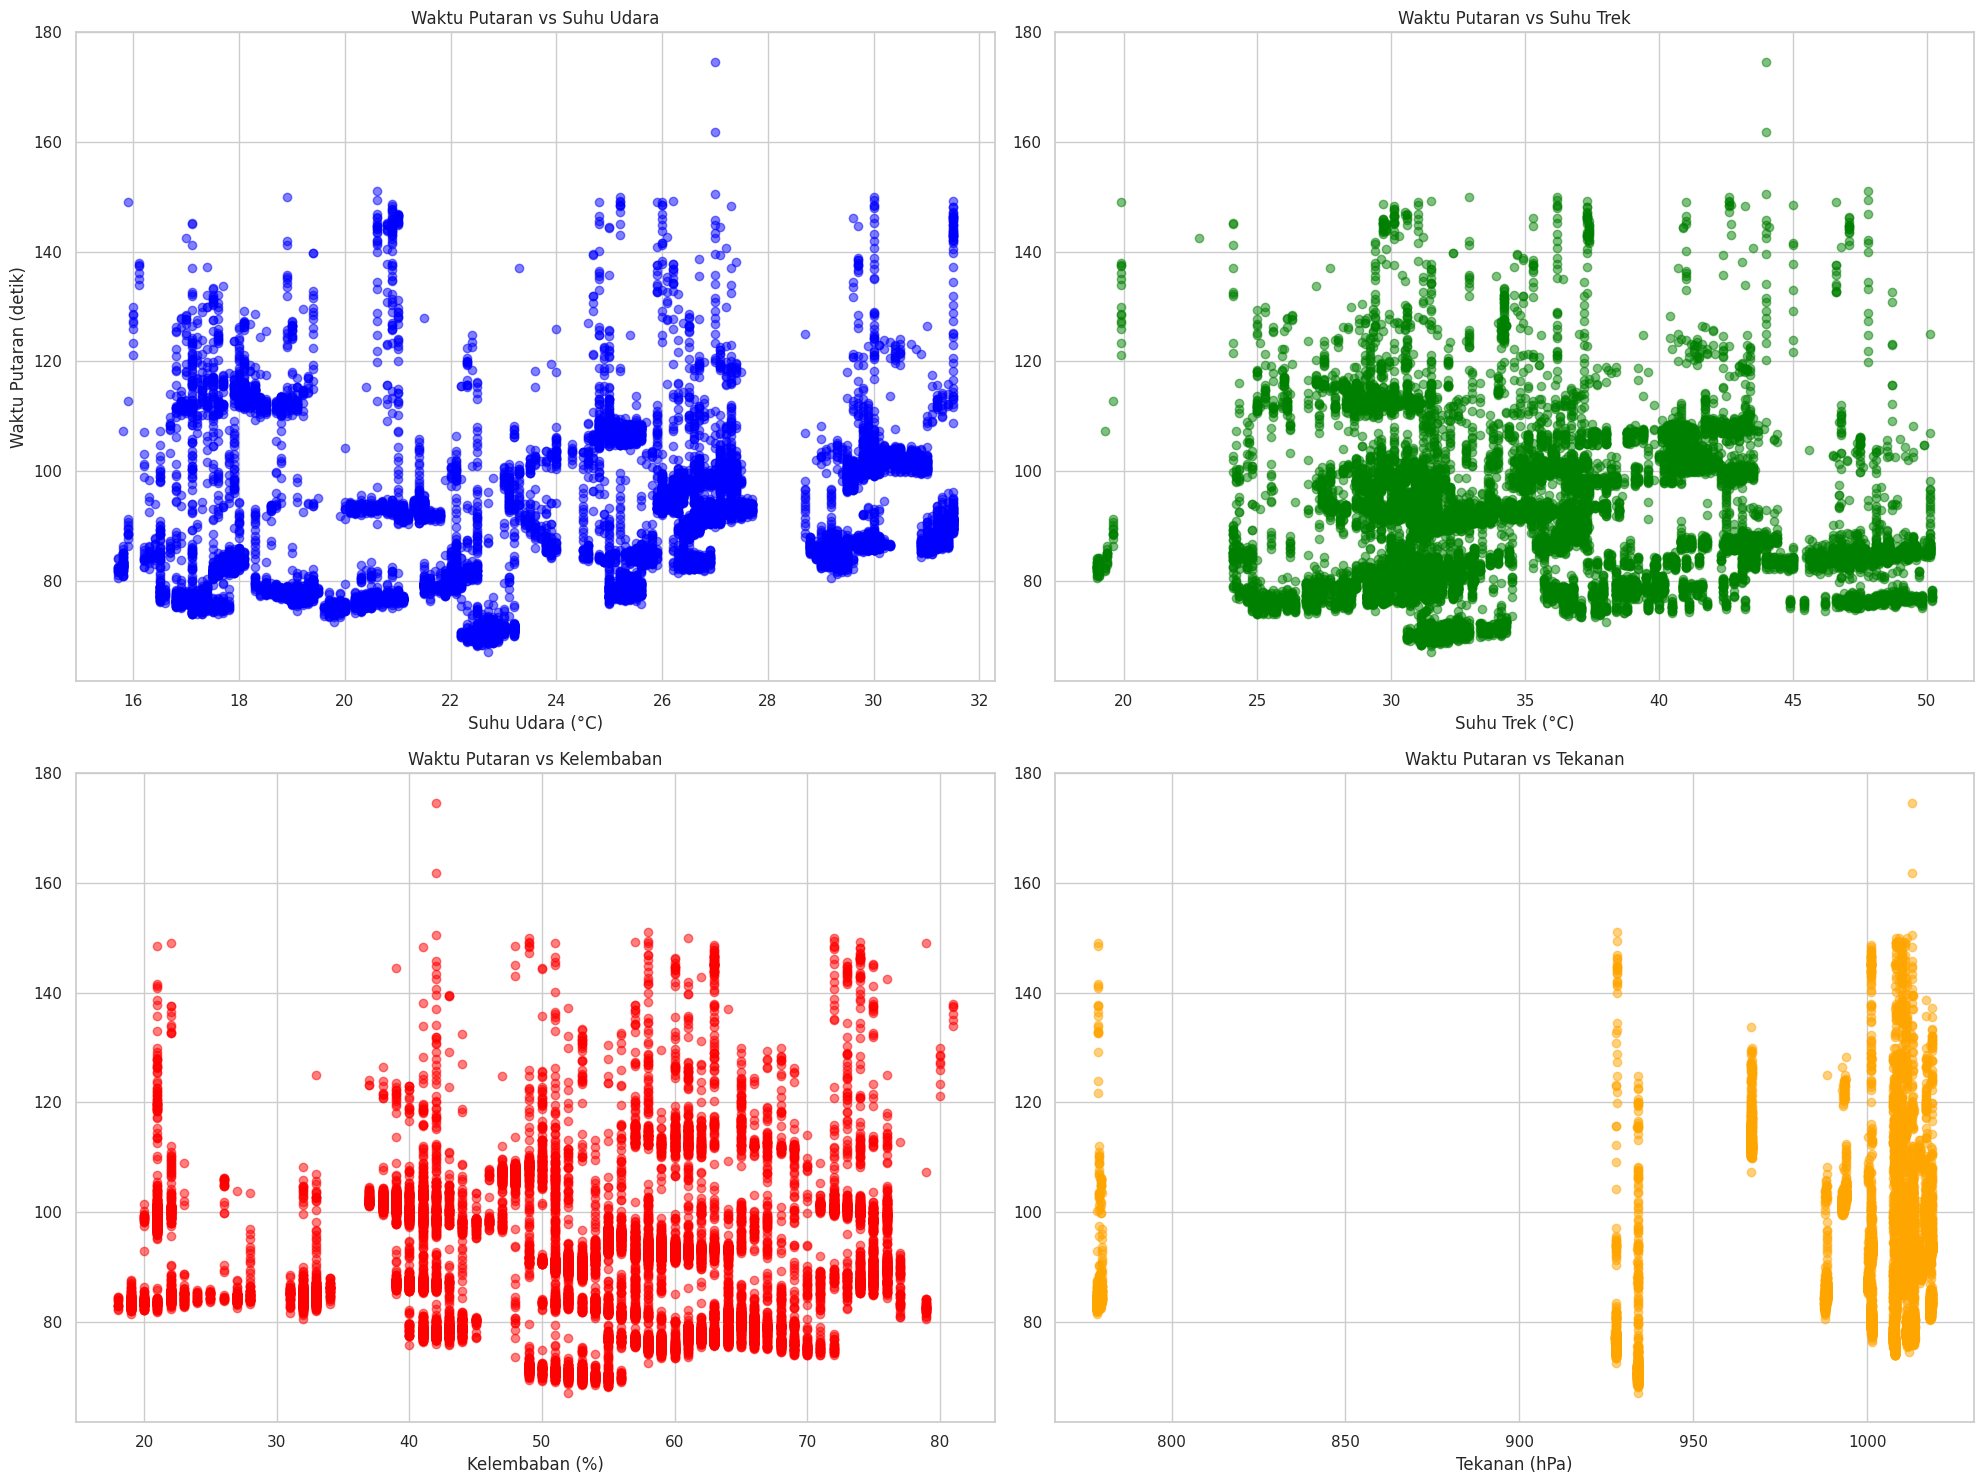

In [110]:
# Membuat scatter plot untuk waktu putaran berdasarkan setiap kondisi cuaca
plt.figure(figsize=(20, 15))

# Scatter plot untuk Waktu Putaran vs Suhu Udara dengan warna biru
plt.subplot(2, 2, 1)
plt.scatter(f1_df['AirTemp'], f1_df['LapTimeSeconds'], alpha=0.5, color='blue')
plt.title('Waktu Putaran vs Suhu Udara')
plt.xlabel('Suhu Udara (°C)')
plt.ylabel('Waktu Putaran (detik)')

# Scatter plot untuk Waktu Putaran vs Suhu Trek dengan warna hijau
plt.subplot(2, 2, 2)
plt.scatter(f1_df['TrackTemp'], f1_df['LapTimeSeconds'], alpha=0.5, color='green')
plt.title('Waktu Putaran vs Suhu Trek')
plt.xlabel('Suhu Trek (°C)')

# Scatter plot untuk Waktu Putaran vs Kelembaban dengan warna merah
plt.subplot(2, 2, 3)
plt.scatter(f1_df['Humidity'], f1_df['LapTimeSeconds'], alpha=0.5, color='red')
plt.title('Waktu Putaran vs Kelembaban')
plt.xlabel('Kelembaban (%)')

# Scatter plot untuk Waktu Putaran vs Tekanan dengan warna oranye
plt.subplot(2, 2, 4)
plt.scatter(f1_df['Pressure'], f1_df['LapTimeSeconds'], alpha=0.5, color='orange')
plt.title('Waktu Putaran vs Tekanan')
plt.xlabel('Tekanan (hPa)')

# Menyesuaikan tata letak plot untuk menghindari tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

Scatter plot di atas kami buat untuk menganalisis hubungan antara waktu lap dan kondisi cuaca yang berbeda. Berikut adalah ringkasan analisis visual dari grafik yang kami temukan:

1. Lap Time vs Air Temperature: Tidak tampak adanya pola yang jelas yang menunjukkan hubungan kuat antara suhu udara dan waktu lap. Distribusi datanya terlihat cukup acak.
2. Lap Time vs Track Temperature: Sama seperti suhu udara, suhu trek juga tidak menunjukkan korelasi yang jelas dengan waktu lap. Namun, waktu lap cenderung sedikit lebih cepat pada suhu trek yang lebih tinggi.
3. Lap Time vs Humidity: Hubungan antara kelembapan dan waktu lap juga tidak menunjukkan pola yang signifikan. Data terdistribusi secara acak, menunjukkan bahwa kelembapan mungkin tidak memiliki pengaruh yang besar pada performa lap.
4. Lap Time vs Pressure: Sama seperti variabel lainnya, tidak ada korelasi yang jelas antara tekanan udara dan waktu lap.

Dari visualisasi ini, kami dapat menyimpulkan bahwa kondisi cuaca mungkin tidak memiliki pengaruh langsung yang signifikan terhadap waktu lap.

### **Hasil Analisis Pertanyaan Nomor 5**

1. Suhu Udara (AirTemp) memiliki korelasi positif sebesar 0.212326 dengan LapTimeSeconds, hal ini menunjukkan bahwa ketika suhu udara meningkat, ada kecenderungan waktu lap juga meningkat (menjadi lebih lambat). Kesimpulan ini bisa disebabkan oleh berbagai faktor, seperti pengurangan densitas udara yang mempengaruhi aerodinamika dan efisiensi pendinginan mobil. Meskipun korelasinya positif, angka ini tidak terlalu tinggi, menunjukkan bahwa faktor lain juga berperan penting dalam menentukan performa lap.

2. Suhu Trek (TrackTemp) memiliki korelasi yang sangat rendah dan negatif (-0.025445) dengan LapTimeSeconds. Hal ini menunjukkan bahwa tidak ada hubungan yang signifikan antara suhu trek dan performa lap. Kemungkinan besar, pengaruh suhu trek terhadap performa mobil beragam tergantung pada kondisi spesifik lainnya, seperti jenis compound ban yang digunakan dan pengaturan mobil.

3. Kelembapan (Humidity) memiliki korelasi negatif yang sangat kecil (-0.009037) dengan LapTimeSeconds, yang hampir mendekati nol. Hal ini menunjukkan bahwa kelembapan hampir tidak memiliki efek yang signifikan terhadap waktu lap.

4. Tekanan Udara (Pressure) memiliki korelasi positif sebesar 0.198261 dengan LapTimeSeconds, yang mirip dengan suhu udara. Hal ini menunjukkan bahwa peningkatan tekanan udara cenderung sedikit meningkatkan waktu lap. Korelasi ini bisa mengindikasikan bahwa kondisi tekanan udara yang lebih tinggi, yang meningkatkan densitas udara, bisa mempengaruhi downforce dan drag pada mobil, tetapi efeknya tidak sebesar suhu udara.

**Kesimpulan**

Berdasarkan hasil analisis, korelasi yang ditemukan menunjukkan bahwa dari empat kondisi cuaca yang dianalisis—suhu udara, suhu trek, kelembapan, dan tekanan udara—suhu udara dan tekanan udara memiliki pengaruh yang sedikit lebih besar terhadap performa lap, meskipun pengaruhnya secara keseluruhan tidak terlalu kuat. Hal ini mengindikasikan bahwa kondisi cuaca memang berperan dalam menentukan waktu lap, tetapi faktor-faktor cuaca hanyalah sebagian dari banyak faktor yang berkontribusi dalam performa balapan.

## Nomor 6

###Korelasi Antara Kondisi Angin dan Performa: Bagaimana kecepatan dan arah angin ('WindSpeed', 'WindDirection') mempengaruhi waktu lap? (Rafi)

In [111]:
# Konversi 'LapTime' menjadi total detik untuk perbandingan yang lebih mudah
f1_df['LapTimeSeconds'] = pd.to_timedelta(f1_df['LapTime']).dt.total_seconds()

# Menghitung korelasi antara kondisi angin dan waktu putaran
wind_conditions = ['WindSpeed', 'WindDirection', 'LapTimeSeconds']
wind_correlation_matrix = f1_df[wind_conditions].corr()

# Menampilkan korelasi antara 'LapTimeSeconds' dengan 'WindSpeed' dan 'WindDirection'
wind_correlation_matrix['LapTimeSeconds']

WindSpeed         0.028615
WindDirection    -0.039925
LapTimeSeconds    1.000000
Name: LapTimeSeconds, dtype: float64

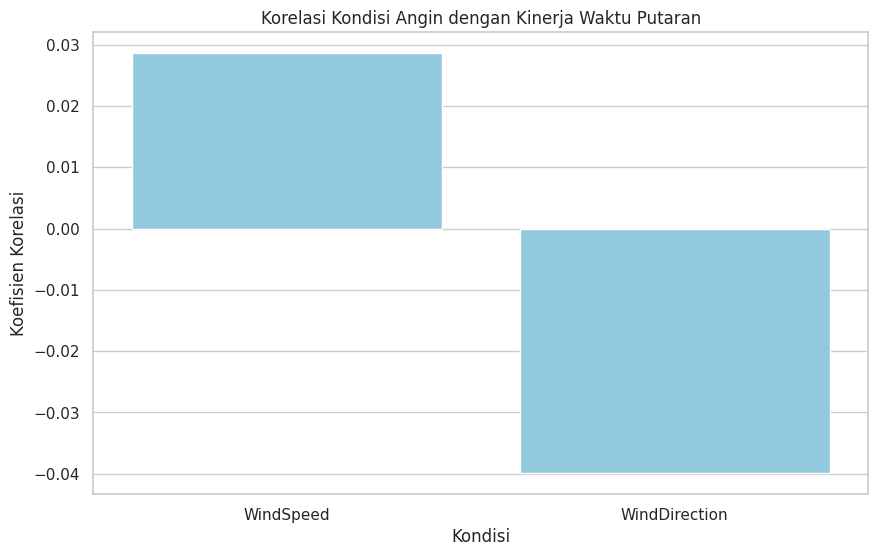

In [112]:
# Korelasi antara kondisi angin dengan waktu putaran
wind_condition_correlation = wind_correlation_matrix['LapTimeSeconds'].drop('LapTimeSeconds')

# Visualisasi korelasi
plt.figure(figsize=(10, 6))
sns.barplot(x=wind_condition_correlation.index, y=wind_condition_correlation.values, color='skyblue')
plt.title('Korelasi Kondisi Angin dengan Kinerja Waktu Putaran')
plt.xlabel('Kondisi')
plt.ylabel('Koefisien Korelasi')

# Menampilkan grafik
plt.show()

Bar plot yang menampilkan koefisien korelasi antara WindSpeed dan WindDirection dengan LapTimeSeconds menunjukkan bahwa kedua variabel angin tersebut memiliki korelasi yang sangat rendah dengan performa lap. Batang-batang di bar plot hampir mendekati nol atau berada di sekitar nilai yang sangat kecil baik positif maupun negatif yang mengindikasikan bahwa tidak ada hubungan linier yang signifikan antara kondisi angin dan kecepatan lap.

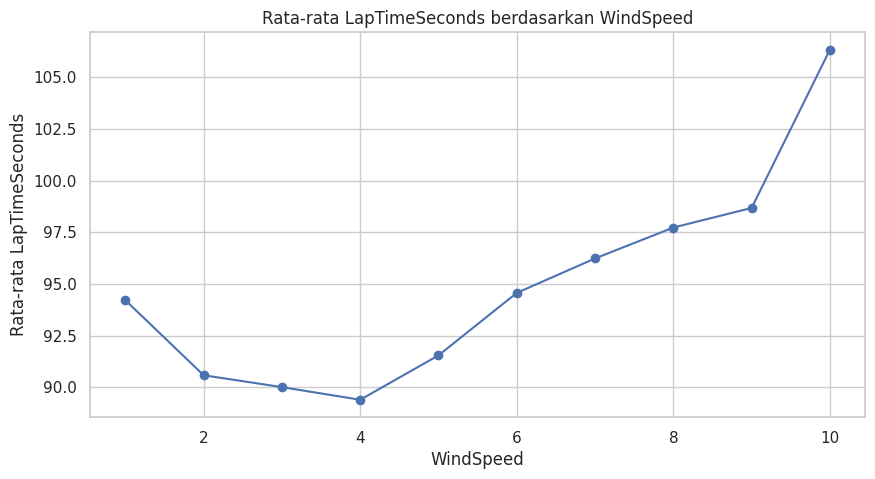

In [113]:
# Membagi data kecepatan angin ke dalam kategori
bins = np.linspace(f1_df['WindSpeed'].min(), f1_df['WindSpeed'].max(), 10)
f1_df['WindSpeed_bin'] = np.digitize(f1_df['WindSpeed'], bins)

# Menghitung rata-rata waktu putaran untuk setiap kategori
binned_avg_laptimes = f1_df.groupby('WindSpeed_bin')['LapTimeSeconds'].mean()

# Membuat plot garis
plt.figure(figsize=(10, 5))
plt.plot(binned_avg_laptimes.index, binned_avg_laptimes.values, marker='o')
plt.title('Rata-rata LapTimeSeconds berdasarkan WindSpeed')
plt.xlabel('WindSpeed')
plt.ylabel('Rata-rata LapTimeSeconds')
plt.grid(True)
plt.show()

Line plot yang menggambarkan hubungan antara kecepatan angin dan rata-rata waktu lap tidak menunjukkan adanya tren yang kuat. Fluktuasi waktu lap antara bin di setiap WindSpeed terlihat minimal yang mengindikasikan bahwa dalam kisaran kecepatan angin yang ditinjau, kecepatan angin tidak secara signifikan mempengaruhi waktu lap. Analisis bisa menyiratkan bahwa faktor-faktor lain mungkin lebih berkontribusi terhadap performa lap dibandingkan dengan kecepatan angin.

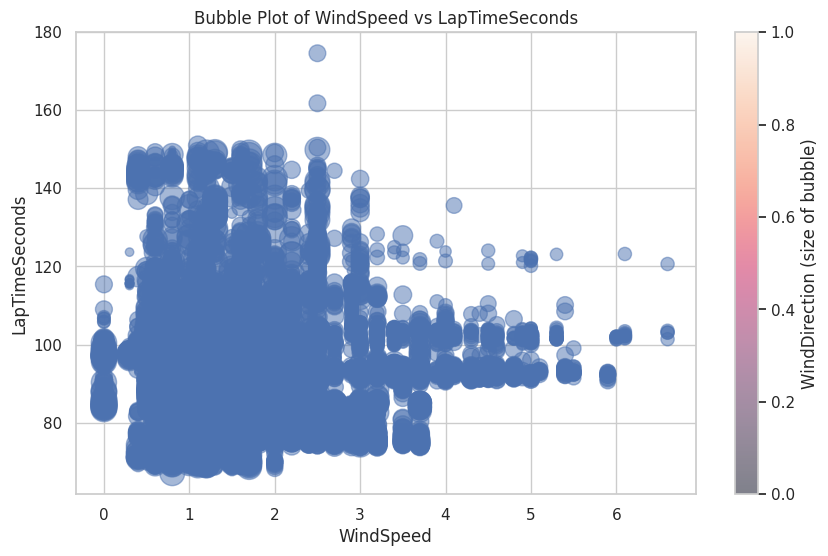

In [114]:
# Membuat bubble plot untuk memvisualisasikan hubungan antara WindSpeed dan LapTimeSeconds
plt.figure(figsize=(10, 6))
plt.scatter(f1_df['WindSpeed'],
            f1_df['LapTimeSeconds'],
            s=f1_df['WindDirection'],
            alpha=0.5)
plt.title('Bubble Plot of WindSpeed vs LapTimeSeconds')
plt.xlabel('WindSpeed')
plt.ylabel('LapTimeSeconds')
plt.colorbar(label='WindDirection (size of bubble)')
plt.show()

Bubble plot memperlihatkan bahwa tidak ada pola khusus antara WindSpeed dan LapTimeSeconds yang menonjol dengan titik-titik data terdistribusi secara acak di sepanjang sumbu kecepatan angin. Ukuran bubble yang merepresentasikan WindDirection juga tidak menunjukkan pengaruh yang jelas terhadap waktu lap yang bisa menegaskan bahwa arah angin mungkin tidak memiliki korelasi langsung dengan performa lap.

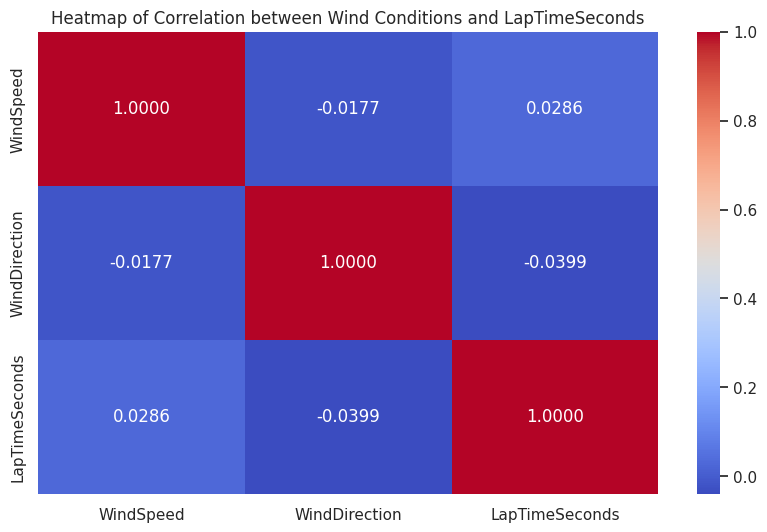

In [115]:
# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(wind_correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Heatmap of Correlation between Wind Conditions and LapTimeSeconds')

# Menampilkan heatmap
plt.show()

Analisis dapat menunjukkan bahwa korelasi antara kecepatan angin dan waktu lap tidak signifikan, yang diindikasikan oleh koefisien korelasi yang rendah, seperti yang terlihat pada heatmap.

### **Hasil Analisis Pertanyaan Nomor 6**

Berdasarkan analisis dari berbagai visualisasi yang telah dibuat untuk mengeksplorasi hubungan antara kondisi angin (kecepatan dan arah angin) dan performa waktu lap (LapTimeSeconds) dalam dataset balapan Formula 1, berikut adalah kesimpulan yang dapat kami ambil:

* **Korelasi Lemah Antara Kondisi Angin dan Waktu Lap**:
Analisis menunjukkan bahwa tidak ada korelasi yang signifikan antara kecepatan angin (WindSpeed) dan arah angin (WindDirection) dengan performa waktu lap. Baik dari scatter plot, bar plot korelasi, maupun heatmap korelasi, data menunjukkan bahwa nilai korelasi sangat rendah dan mendekati nol. Hal ini menunjukkan bahwa perubahan dalam kondisi angin memiliki pengaruh yang minimal atau tidak berpengaruh signifikan terhadap waktu lap.



# Data Preprocessing

## Data Cleaning

In [116]:
# Fungsi untuk mengecek nilai yang hilang
def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

# Menampilkan jumlah data yang hilang pada dataset
cek_missing_values(f1_df)

Total   Percent
DeletedReason       18477  0.983447
PitInTime           18053  0.960879
PitOutTime          17749  0.944699
SpeedI1              2917  0.155259
SpeedST              1692  0.090057
SpeedFL               775  0.041250
Sector1SessionTime    444  0.023632
Sector1Time           407  0.021663
Sector1TimeSeconds    407  0.021663
LapTimeSeconds        290  0.015435
LapTime               290  0.015435
LapTime_seconds       290  0.015435
Sector3TimeSeconds     92  0.004897
Sector3SessionTime     92  0.004897
Sector3Time            92  0.004897
Sector2SessionTime     39  0.002076
Sector2TimeSeconds     39  0.002076
Sector2Time            39  0.002076
SpeedI2                39  0.002076
IsPersonalBest         30  0.001597

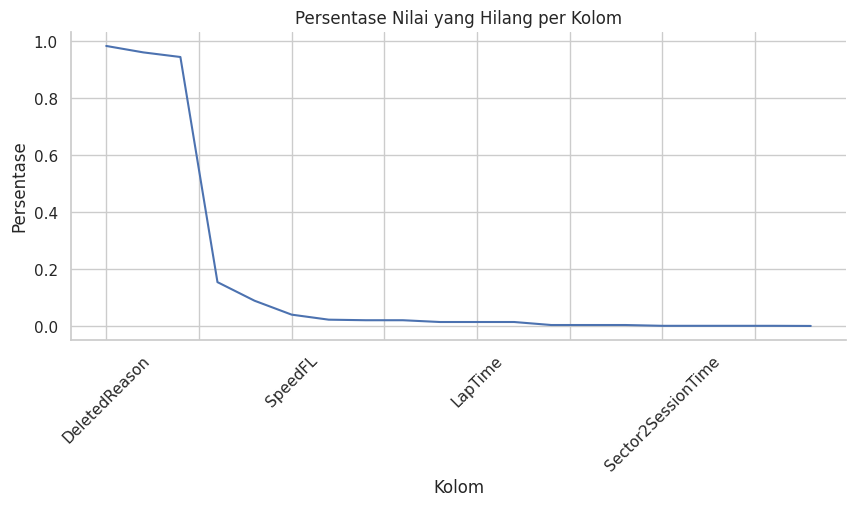

In [117]:
missing_values_df = cek_missing_values(f1_df)

# Membuat line plot untuk missing value
missing_values_df['Percent'].plot(kind='line', figsize=(10, 4), title='Persentase Nilai yang Hilang per Kolom')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel('Persentase')
plt.xlabel('Kolom')
plt.xticks(rotation=45)

# Menampilkan line plot
plt.show()


Karena kolom DeletedReason, PitInTime, dan PitOuttime memiliki nilai null dengan persentase terbanyak, kemungkinan besar ketiga kolom tersebut tidak memberikan informasi yang berguna untuk analisis umum performa balapan dan permodelan, kami mengambil keputusan untuk menghapus ketiga kolom ini dari dataset.

In [118]:
# Menghapus kolom 'PitOutTime', 'PitInTime', dan 'DeletedReason'
f1_df_cleaned = f1_df.drop(columns=['PitOutTime', 'PitInTime', 'DeletedReason'])

# Menampilkan kolom yang tersisa untuk memastikan ketiga kolom sebelumnya telah dihapus
f1_df_cleaned.columns

Index(['ID', 'Time', 'LapTime', 'Stint', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'LapStartTime',
       'Deleted', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp',
       'WindDirection', 'WindSpeed', 'Pos_cat', 'LapTimeSeconds',
       'Sector1TimeSeconds', 'Sector2TimeSeconds', 'Sector3TimeSeconds',
       'IsPodium', 'LapTime_seconds', 'WindSpeed_bin'],
      dtype='object')

In [119]:
# Fungsi untuk mengecek nilai yang hilang
def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

# Menampilkan jumlah data yang hilang pada dataset
cek_missing_values(f1_df_cleaned)

Total   Percent
SpeedI1              2917  0.155259
SpeedST              1692  0.090057
SpeedFL               775  0.041250
Sector1SessionTime    444  0.023632
Sector1TimeSeconds    407  0.021663
Sector1Time           407  0.021663
LapTime               290  0.015435
LapTime_seconds       290  0.015435
LapTimeSeconds        290  0.015435
Sector3TimeSeconds     92  0.004897
Sector3SessionTime     92  0.004897
Sector3Time            92  0.004897
Sector2SessionTime     39  0.002076
Sector2Time            39  0.002076
Sector2TimeSeconds     39  0.002076
SpeedI2                39  0.002076
IsPersonalBest         30  0.001597

## Data Conversion

In [120]:
# Mengubah 'LapTime', 'Sector 1, 2, 3 Time' menjadi total detik untuk memudahkan perbandingan, analisis, dan modeling
f1_df_cleaned['LapTimeSeconds'] = pd.to_timedelta(f1_df_cleaned['LapTime']).dt.total_seconds()
f1_df_cleaned['Sector1TimeSeconds'] = pd.to_timedelta(f1_df_cleaned['Sector1Time']).dt.total_seconds()
f1_df_cleaned['Sector2TimeSeconds'] = pd.to_timedelta(f1_df_cleaned['Sector2Time']).dt.total_seconds()
f1_df_cleaned['Sector3TimeSeconds'] = pd.to_timedelta(f1_df_cleaned['Sector3Time']).dt.total_seconds()

# Menampilkan dataset dengan kolom baru: LapTimeSeconds
f1_df_cleaned



ID                    Time                 LapTime  Stint  \
0      14609  0 days 02:26:25.496000  0 days 00:01:40.943000    6.0   
1       3211  0 days 01:13:51.732000  0 days 00:01:48.067000    1.0   
2       2497  0 days 02:22:35.139000  0 days 00:01:22.881000    2.0   
3      13639  0 days 01:03:36.822000  0 days 00:01:31.585000    1.0   
4       1280  0 days 01:45:40.072000  0 days 00:01:34.742000    2.0   
...      ...                     ...                     ...    ...   
18783  12769  0 days 01:27:00.913000  0 days 00:01:25.235000    2.0   
18784  16394  0 days 01:21:32.309000  0 days 00:01:40.363000    1.0   
18785  13600  0 days 02:00:31.678000  0 days 00:01:52.495000    3.0   
18786  11924  0 days 01:07:59.947000  0 days 00:01:25.938000    1.0   
18787  10838  0 days 02:04:03.127000  0 days 00:02:25.892000    3.0   

                  Sector1Time             Sector2Time             Sector3Time  \
0      0 days 00:00:46.163000  0 days 00:00:28.979000  0 days 00:00:25.801000   
1      0 days 00:00:39.129000  0 days 00:00:43.601000  0 days 00:00:25.337000   
2      0 days 00:00:28.890000  0 days 00:00:18.554000  0 days 00:00:35.437000   
3                         NaN  0 days 00:00:28.929000  0 days 00:00:30.478000   
4      0 days 00:00:34.895000  0 days 00:00:29.874000  0 days 00:00:29.973000   
...                       ...                     ...                     ...   
18783  0 days 00:00:30.620000  0 days 00:00:30.668000  0 days 00:00:23.947000   
18784  0 days 00:00:29.488000  0 days 00:00:42.838000  0 days 00:00:28.037000   
18785  0 days 00:00:32.659000  0 days 00:00:49.567000  0 days 00:00:30.269000   
18786  0 days 00:00:30.564000  0 days 00:00:31.370000  0 days 00:00:24.004000   
18787  0 days 00:00:52.231000  0 days 00:00:53.937000  0 days 00:00:39.724000   

           Sector1SessionTime      Sector2SessionTime      Sector3SessionTime  \
0      0 days 02:25:36.926000  0 days 02:26:05.905000  0 days 02:26:31.706000   
1      0 days 01:12:42.794000  0 days 01:13:26.395000  0 days 01:13:51.732000   
2      0 days 02:21:41.150000  0 days 02:21:59.704000  0 days 02:22:35.141000   
3                         NaN  0 days 01:03:06.412000  0 days 01:03:36.927000   
4      0 days 01:44:40.174000  0 days 01:45:10.048000  0 days 01:45:40.021000   
...                       ...                     ...                     ...   
18783  0 days 01:26:06.294000  0 days 01:26:36.962000  0 days 01:27:00.909000   
18784  0 days 01:20:21.469000  0 days 01:21:04.307000  0 days 01:21:32.344000   
18785  0 days 01:59:11.871000  0 days 02:00:01.438000  0 days 02:00:31.707000   
18786  0 days 01:07:04.556000  0 days 01:07:35.926000  0 days 01:07:59.930000   
18787  0 days 02:02:29.417000  0 days 02:03:23.354000  0 days 02:04:03.078000   

       ...  WindDirection  WindSpeed      Pos_cat  LapTimeSeconds  \
0      ...            157        3.0  Participant         100.943   
1      ...            275        1.0       Podium         108.067   
2      ...              0        0.6  Participant          82.881   
3      ...            135        1.8       Podium          91.585   
4      ...            271        1.3        Point          94.742   
...    ...            ...        ...          ...             ...   
18783  ...            252        1.2  Participant          85.235   
18784  ...            145        1.1  Participant         100.363   
18785  ...            146        1.1  Participant         112.495   
18786  ...            134        1.5  Participant          85.938   
18787  ...            246        0.8        Point         145.892   

      Sector1TimeSeconds Sector2TimeSeconds  Sector3TimeSeconds  IsPodium  \
0                 46.163             28.979              25.801         0   
1                 39.129             43.601              25.337         1   
2                 28.890             18.554              35.437         0   
3                    NaN             28.929              30.478         1 

## Data Encoding

In [121]:
# Menampilkan tipe data kolom dari dataset
f1_df_cleaned.dtypes

ID                      int64
Time                   object
LapTime                object
Stint                 float64
Sector1Time            object
Sector2Time            object
Sector3Time            object
Sector1SessionTime     object
Sector2SessionTime     object
Sector3SessionTime     object
SpeedI1               float64
SpeedI2               float64
SpeedFL               float64
SpeedST               float64
IsPersonalBest         object
Compound               object
TyreLife              float64
FreshTyre                bool
LapStartTime           object
Deleted                  bool
AirTemp               float64
Humidity              float64
Pressure              float64
Rainfall                 bool
TrackTemp             float64
WindDirection           int64
WindSpeed             float64
Pos_cat                object
LapTimeSeconds        float64
Sector1TimeSeconds    float64
Sector2TimeSeconds    float64
Sector3TimeSeconds    float64
IsPodium                int64
LapTime_se

In [122]:
# Menampilkan nilai unik dari kolom 'Compound' untuk mengidentifikasi variasi compound ban yang digunakan
print(f1_df_cleaned['Compound'].unique())

# Menampilkan nilai unik dari kolom 'Pos_cat' untuk melihat kategori posisi finish yang berbeda dalam dataset
print(f1_df_cleaned['Pos_cat'].unique())

# Menampilkan nilai unik dari kolom 'Rainfall' untuk melihat kategori kondisi hujan yang berbeda dalam dataset
print(f1_df_cleaned['Rainfall'].unique())

['INTERMEDIATE' 'MEDIUM' 'HARD' 'SOFT' 'WET']
['Participant' 'Podium' 'Point']
[False  True]


In [123]:
# Membuat instance dari LabelEncoder
le_compound = LabelEncoder()
le_pos_cat = LabelEncoder()
le_rainfall = LabelEncoder()

# Melakukan fit dan transform pada kolom 'Compound' dan mengganti kolom tersebut dengan hasilnya
f1_df_cleaned['Compound_encoded'] = le_compound.fit_transform(f1_df_cleaned['Compound'])

# Melakukan hal yang sama untuk 'Pos_cat'
f1_df_cleaned['Pos_cat_encoded'] = le_pos_cat.fit_transform(f1_df_cleaned['Pos_cat'])

# Melakukan hal yang sama untuk 'Rainfall'
f1_df_cleaned['Rainfall_encoded'] = le_rainfall.fit_transform(f1_df_cleaned['Rainfall'])

# Menampilkan beberapa baris pertama untuk memeriksa hasilnya
print(f1_df_cleaned[['Compound', 'Compound_encoded', 'Pos_cat', 'Pos_cat_encoded', 'Rainfall_encoded', 'Rainfall']].head())

       Compound  Compound_encoded      Pos_cat  Pos_cat_encoded  \
0  INTERMEDIATE                 1  Participant                0   
1        MEDIUM                 2       Podium                1   
2          HARD                 0  Participant                0   
3          SOFT                 3       Podium                1   
4          HARD                 0        Point                2   

   Rainfall_encoded  Rainfall  
0                 0     False  
1                 0     False  
2                 0     False  
3                 0     False  
4                 0     False  


# Data Modelling

**Problem Guide:**

Buatlah beberapa model yang mungkin akan diperlukan, diantaranya: (dapat ditambah analisis lain yang menurut kelompok Anda akan bermanfaat):

**Pertanyaan:**
1. Buatlah model untuk mengklasifikasi kategori posisi ‘Pos_cat’.
2. Buatlah model untuk memprediksi umur ban ‘TyreLife’ pada suatu lap session.
3. Lakukan clustering pada dataset, dan berikan analisis dari cluster yang terbentuk!

## Nomor 1

1. Buatlah model untuk mengklasifikasi kategori posisi ‘Pos_cat’.

### (Rafi) Implementasi Model Klasifikasi Kategori posisi 'Pos_cat' dengan Random Forest

Feature Selection

In [124]:
# Selecting features and target for the model
features = f1_df_cleaned[['LapTimeSeconds', 'Compound_encoded', 'Rainfall_encoded', 'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindDirection', 'WindSpeed']]
target = f1_df_cleaned['Pos_cat_encoded']

Pembagian Data

In [125]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15030, 9), (3758, 9), (15030,), (3758,))

Model Klasifikasi dengan Random Forest

In [126]:
# Creating a Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Apply imputer to the training and testing features
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Training the model on the imputed data
rf_classifier.fit(X_train_imputed, y_train)

# Predicting on the test set with imputed data
y_pred_imputed = rf_classifier.predict(X_test_imputed)

# Evaluating the model again
accuracy_imputed = accuracy_score(y_test, y_pred_imputed)
classification_rep_imputed = classification_report(y_test, y_pred_imputed)

# Print formatted accuracy
print(f"Accuracy of the model: {accuracy_imputed:.2%}")

# Print formatted classification report
print("\nClassification Report:")
print(classification_rep_imputed)

Accuracy of the model: 62.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1693
           1       0.53      0.47      0.50       625
           2       0.56      0.56      0.56      1440

    accuracy                           0.63      3758
   macro avg       0.60      0.59      0.59      3758
weighted avg       0.62      0.63      0.62      3758



Hasil Evaluasi Model:
- Akurasi Model: 62.67%

Laporan Klasifikasi Detail:
- Kelas 0 (Participant):
  - Precision: 0.71
  - Recall: 0.74
  - F1-Score: 0.73
- Kelas 1 (Podium):
  - Precision: 0.53
  - Recall: 0.47
  - F1-Score: 0.50
- Kelas 2 (Point):
  - Precision: 0.56
  - Recall: 0.56
  - F1-Score: 0.56

Analisis:
1. Model ini memiliki akurasi yang cukup moderat pada 62.67%. Ini menunjukkan bahwa model dapat memprediksi posisi dengan keakuratan yang cukup tapi masih ada ruang untuk perbaikan.
2. Performa model terbaik untuk kelas 'Participant' dengan F1-Score tertinggi, yang menunjukkan bahwa model ini lebih baik dalam mengenali peserta biasa dibandingkan dengan peserta yang mencapai podium atau mendapatkan poin.
3. Presisi dan recall untuk kelas 'Podium' lebih rendah dibandingkan kelas lain, yang mungkin menunjukkan bahwa fitur-fitur yang digunakan kurang efektif dalam membedakan kinerja yang sangat baik.

### (Bintang) Implementasi Model Klasifikasi Kategori posisi 'Pos_cat' dengan Random forest dan melakukan sampling SMOTE

In [127]:
train_data_clas = pd.read_csv("https://drive.google.com/uc?id=1itkMN7Z5InCRFKclfRMGKPk7SJV0qAt5")
test_data_clas = pd.read_csv('f1_test_classif.csv')


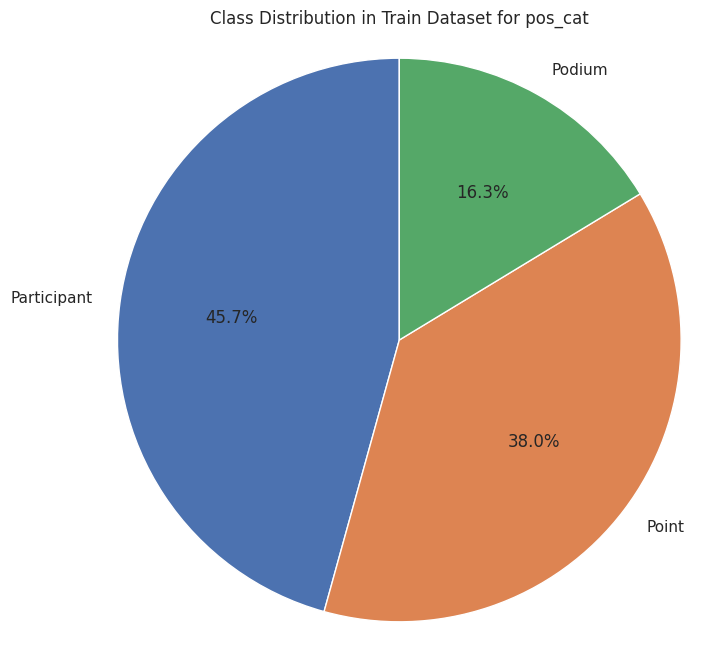

In [128]:
class_counts = train_data_clas['Pos_cat'].value_counts()

# Plotting the pie chart for the class distribution
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution in Train Dataset for pos_cat')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [129]:
train_data_cleaned_clas = train_data_clas.drop(columns=['PitOutTime', 'PitInTime', 'DeletedReason'])
test_data_cleaned_clas = test_data_clas.drop(columns=['PitOutTime', 'PitInTime', 'DeletedReason'])

# Drop rows with missing 'Pos_cat'
print("Columns before dropping NA for Pos_cat:", train_data_cleaned_clas.columns)
train_data_clas = train_data_cleaned_clas.dropna(subset=['Pos_cat'])

Columns before dropping NA for Pos_cat: Index(['ID', 'Time', 'LapTime', 'Stint', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'LapStartTime',
       'Deleted', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp',
       'WindDirection', 'WindSpeed', 'Pos_cat'],
      dtype='object')


In [130]:
# Mengubah 'LapTime', 'Sector 1, 2, 3 Time' menjadi total detik untuk memudahkan perbandingan, analisis, dan modeling
train_data_clas['LapTimeSeconds'] = pd.to_timedelta(train_data_clas['LapTime']).dt.total_seconds()
train_data_clas['Sector1TimeSeconds'] = pd.to_timedelta(train_data_clas['Sector1Time']).dt.total_seconds()
train_data_clas['Sector2TimeSeconds'] = pd.to_timedelta(train_data_clas['Sector2Time']).dt.total_seconds()
train_data_clas['Sector3TimeSeconds'] = pd.to_timedelta(train_data_clas['Sector3Time']).dt.total_seconds()

# Menampilkan dataset dengan kolom baru: LapTimeSeconds
train_data_clas

# Mengubah 'LapTime', 'Sector 1, 2, 3 Time' menjadi total detik untuk memudahkan perbandingan, analisis, dan modeling
test_data_cleaned_clas['LapTimeSeconds'] = pd.to_timedelta(test_data_cleaned_clas['LapTime']).dt.total_seconds()
test_data_cleaned_clas['Sector1TimeSeconds'] = pd.to_timedelta(test_data_cleaned_clas['Sector1Time']).dt.total_seconds()
test_data_cleaned_clas['Sector2TimeSeconds'] = pd.to_timedelta(test_data_cleaned_clas['Sector2Time']).dt.total_seconds()
test_data_cleaned_clas['Sector3TimeSeconds'] = pd.to_timedelta(test_data_cleaned_clas['Sector3Time']).dt.total_seconds()

# Menampilkan dataset dengan kolom baru: LapTimeSeconds
test_data_cleaned_clas




ID                    Time                 LapTime  Stint  \
0     11652  0 days 01:19:09.993000  0 days 00:01:25.001000    1.0   
1      4732  0 days 01:46:56.673000  0 days 00:01:32.378000    2.0   
2        89  0 days 01:58:13.959000  0 days 00:01:37.974000    3.0   
3      7071  0 days 02:22:04.017000  0 days 00:01:18.870000    3.0   
4     15110  0 days 02:00:18.410000  0 days 00:01:25.884000    2.0   
...     ...                     ...                     ...    ...   
2344  22158  0 days 01:57:44.512000  0 days 00:01:17.043000    3.0   
2345   9217  0 days 02:01:14.348000  0 days 00:01:17.355000    3.0   
2346  16577  0 days 01:16:20.505000  0 days 00:01:40.339000    1.0   
2347  19202  0 days 02:38:25.861000  0 days 00:01:40.794000    3.0   
2348   4846  0 days 01:46:48.433000  0 days 00:01:33.528000    1.0   

                 Sector1Time             Sector2Time             Sector3Time  \
0     0 days 00:00:30.631000  0 days 00:00:30.430000  0 days 00:00:23.940000   
1     0 days 00:00:31.596000  0 days 00:00:34.849000  0 days 00:00:25.933000   
2     0 days 00:00:30.942000  0 days 00:00:42.828000  0 days 00:00:24.204000   
3     0 days 00:00:23.305000  0 days 00:00:31.779000  0 days 00:00:23.786000   
4     0 days 00:00:28.196000  0 days 00:00:29.713000  0 days 00:00:27.975000   
...                      ...                     ...                     ...   
2344  0 days 00:00:19.964000  0 days 00:00:39.353000  0 days 00:00:17.726000   
2345  0 days 00:00:21.716000  0 days 00:00:24.777000  0 days 00:00:30.862000   
2346  0 days 00:00:29.114000  0 days 00:00:42.991000  0 days 00:00:28.234000   
2347  0 days 00:00:26.874000  0 days 00:00:40.382000  0 days 00:00:33.538000   
2348  0 days 00:00:31.922000  0 days 00:00:35.533000  0 days 00:00:26.073000   

          Sector1SessionTime      Sector2SessionTime      Sector3SessionTime  \
0     0 days 01:18:15.630000  0 days 01:18:46.060000         0 days 01:19:10   
1     0 days 01:45:55.886000  0 days 01:46:30.735000  0 days 01:46:56.668000   
2     0 days 01:57:06.877000  0 days 01:57:49.705000  0 days 01:58:13.909000   
3     0 days 02:21:08.423000  0 days 02:21:40.202000  0 days 02:22:03.988000   
4     0 days 01:59:20.701000  0 days 01:59:50.414000  0 days 02:00:18.389000   
...                      ...                     ...                     ...   
2344  0 days 01:56:48.570000  0 days 01:57:27.923000  0 days 01:57:45.649000   
2345  0 days 02:00:18.674000  0 days 02:00:43.451000  0 days 02:01:14.313000   
2346  0 days 01:15:09.320000  0 days 01:15:52.311000  0 days 01:16:20.545000   
2347  0 days 02:37:11.926000  0 days 02:37:52.308000  0 days 02:38:25.846000   
2348  0 days 01:45:46.824000  0 days 01:46:22.357000  0 days 01:46:48.430000   

      ...  Humidity  Pressure  Rainfall  TrackTemp WindDirection WindSpeed  \
0     ...      32.0     988.4     False       49.6           155       1.2   
1     ...      58.0    1018.2     False       38.5           142       4.3   
2     ...      21.0    1017.0     False       29.6           212       0.6   
3     ...      67.0    1001.4     False       28.2            36       1.7   
4     ...      39.0    1000.2     False       43.4           153       1.7   
...   ...       ...       ...       ...        ...           ...       ...   
2344  ...      59.0     927.7     False       48.3           189       2.2   
2345  ...      61.0    1011.4     False       31.7           314       1.8   
2346  ...      72.0    1008.9     False       36.5           161       1.7   
2347  ...      41.0     992.7     False       40.2           104       3.4   
2348  ...      59.0    1018.2     False       38.5           109       3.5   

      LapTimeSeconds  Sector1TimeSeconds Sector2TimeSeconds  \
0             85.001              30.631             30.430   
1             92.378              31.596             34.849   
2             97.974              30.942             42.828   
3             78.870              23.305             31.7

In [131]:
numeric_clas = train_data_clas.select_dtypes(include=['int64', 'float64']).columns.drop(['ID', 'WindDirection', 'WindSpeed', 'AirTemp'])
categorical_clas = ['Rainfall', 'Compound']

In [132]:
poly_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', poly_transformer, numeric_clas),
        ('cat', categorical_transformer, categorical_clas)
    ])

In [133]:
from imblearn.pipeline import Pipeline as ImbPipeline


X = train_data_clas.drop(['ID', 'Pos_cat', 'Deleted'], axis=1)
y = train_data_clas['Pos_cat']


X_train, X_valid, y_train, y_layout = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


rf_clas_model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', BorderlineSMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(max_depth=25, n_estimators=250, max_features='sqrt', random_state=42))
])

rf_clas_model.fit(X_train, y_train)

y_pred = rf_clas_model.predict(X_valid)

In [134]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_clas_model.predict(X_valid)

# Mencetak metrik
print("Accuracy:", accuracy_score(y_layout, y_pred))
print("Classification Report:")
print(classification_report(y_layout, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_layout, y_pred))

Accuracy: 0.8084087280468334
Classification Report:
              precision    recall  f1-score   support

 Participant       0.86      0.87      0.87      1718
      Podium       0.77      0.76      0.76       613
       Point       0.76      0.76      0.76      1427

    accuracy                           0.81      3758
   macro avg       0.80      0.80      0.80      3758
weighted avg       0.81      0.81      0.81      3758

Confusion Matrix:
[[1487   13  218]
 [  19  466  128]
 [ 214  128 1085]]


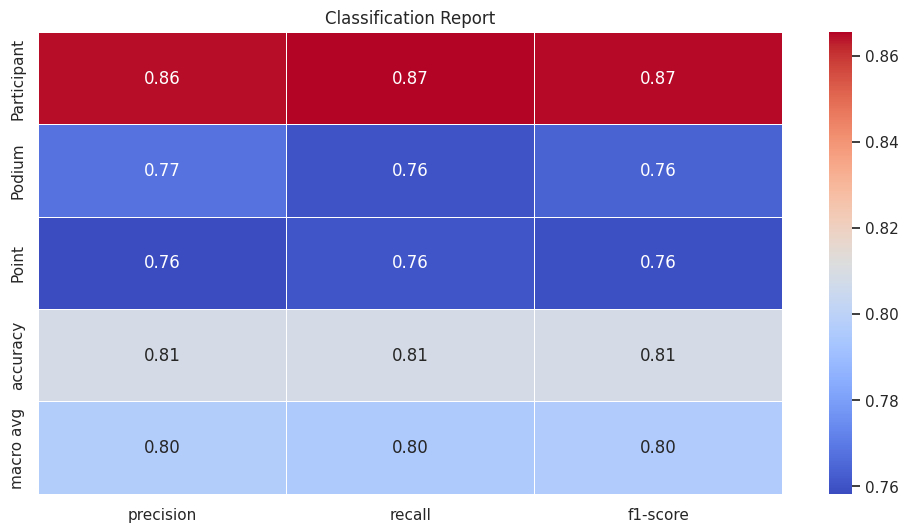

Accuracy: 0.8084087280468334
Class 'Participant': Precision: 0.8645, Recall: 0.8655, F1-score: 0.8650
Class 'Podium': Precision: 0.7677, Recall: 0.7602, F1-score: 0.7639
Class 'Point': Precision: 0.7582, Recall: 0.7603, F1-score: 0.7593
Macro Average Precision: 0.7968, Recall: 0.7954, F1-score: 0.7961
Weighted Average Precision: 0.8084, Recall: 0.8084, F1-score: 0.8084


In [135]:
# Contoh dari hasil prediksi dan data sebenarnya, asumsikan y_layout adalah y_valid
y_pred = rf_clas_model.predict(X_valid)
report = classification_report(y_layout, y_pred, output_dict=True)

# Membuat DataFrame dari laporan klasifikasi
report_df = pd.DataFrame(report).transpose()

# Membuat heatmap dari DataFrame
plt.figure(figsize=(12, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)  # iloc untuk menghindari baris dan kolom support/average total
plt.title("Classification Report")
plt.show()

print(f"Accuracy:", accuracy_score(y_layout, y_pred))  # Menampilkan dengan 4 angka di belakang koma

# Menampilkan Precision, Recall, dan F1-score untuk setiap kelas
for label in report:
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = report[label]['precision']
        recall = report[label]['recall']
        f1_score = report[label]['f1-score']
        print(f"Class '{label}': Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1_score:.4f}")

# Menampilkan nilai macro average dan weighted average jika diperlukan
macro_avg = report['macro avg']
weighted_avg = report['weighted avg']
print(f"Macro Average Precision: {macro_avg['precision']:.4f}, Recall: {macro_avg['recall']:.4f}, F1-score: {macro_avg['f1-score']:.4f}")
print(f"Weighted Average Precision: {weighted_avg['precision']:.4f}, Recall: {weighted_avg['recall']:.4f}, F1-score: {weighted_avg['f1-score']:.4f}")

In [136]:
# Check the number of rows before predictions
print("Number of rows in the test dataset for predictions:", len(test_data_cleaned_clas))
print("Number of rows in the original test dataset:", len(test_data_clas))

# Prepare data for predictions
X_test_clas = test_data_cleaned_clas.drop(['ID'], axis=1)

# Generate predictions
predictions_clas = rf_clas_model.predict(X_test_clas)

# Check if the number of predictions matches the expected number of IDs
if len(predictions_clas) == len(test_data_clas['ID']):
    submission = pd.DataFrame({'ID': test_data_clas['ID'], 'Pos_cat': predictions_clas})
    submission.to_csv('submission_classification_tk.csv', index=False)
    print("Submission file created successfully.")
else:
    print("Error: Mismatch in the number of predictions and number of IDs.")
    print("Number of predictions:", len(predictions_clas))
    print("Number of IDs:", len(test_data_clas['ID']))

Number of rows in the test dataset for predictions: 2349
Number of rows in the original test dataset: 2349
Submission file created successfully.


### (Daniel) Implementasi Model Klasifikasi Kategori posisi 'Pos_cat' dengan Ensemble Method : Bagging Random Forest

In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Mendefinisikan DataFrame dan feature-target split
features = f1_df_cleaned[['LapTimeSeconds', 'Compound_encoded', 'Rainfall_encoded', 'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindDirection', 'WindSpeed']]
target = f1_df_cleaned['Pos_cat_encoded']

# Splitting data menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inisialisasi imputer dengan strategi pengisian mean
imputer = SimpleImputer(strategy='mean')

# Mengisi nilai NaN dalam X_train dan X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalisasi menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Inisialisasi SMOTE dengan oversampling minoritas
smote = SMOTE(random_state=42)
# Melakukan oversampling pada data training yang sudah diimputasi dan dinormalisasi
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Inisialisasi model BaggingClassifier dengan RandomForestClassifier sebagai base estimator
bagging_classifier = BaggingClassifier(estimator=RandomForestClassifier(max_depth=25, n_estimators=250, max_features='sqrt', random_state=42),
                                       n_estimators=5, random_state=42)

# Melatih model pada data yang sudah diresampling
bagging_classifier.fit(X_resampled, y_resampled)

# Melakukan prediksi pada data uji yang sudah diimputasi dan dinormalisasi
y_pred = bagging_classifier.predict(X_test_scaled)

# Evaluasi model menggunakan classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1693
           1       0.50      0.53      0.51       625
           2       0.57      0.55      0.56      1440

    accuracy                           0.63      3758
   macro avg       0.60      0.61      0.60      3758
weighted avg       0.63      0.63      0.63      3758



### (Dzul) Implementasi Model Klasifikasi Kategori posisi 'Pos_cat' dengan KNN dan melakukan sampling borderline SMOTE

In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Mendefinisikan DataFrame dan feature-target split
features = f1_df_cleaned[['LapTimeSeconds', 'Compound_encoded', 'Rainfall_encoded', 'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindDirection', 'WindSpeed']]
target = f1_df_cleaned['Pos_cat_encoded']

# Splitting data menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inisialisasi imputer dengan strategi pengisian mean
imputer = SimpleImputer(strategy='mean')

# Mengisi nilai NaN dalam X_train dan X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalisasi menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Inisialisasi BorderlineSMOTE dengan oversampling minoritas
borderline_smote = BorderlineSMOTE(random_state=42)
# Melakukan oversampling pada data training yang sudah diimputasi dan dinormalisasi
X_resampled, y_resampled = borderline_smote.fit_resample(X_train_scaled, y_train)

# Inisialisasi model KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Melatih model pada data yang sudah diresampled
knn_classifier.fit(X_resampled, y_resampled)

# Melakukan prediksi pada data uji yang sudah diimputasi dan dinormalisasi
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluasi model menggunakan classification report
print("Classification report for K-Nearest Neighbors with Borderline-SMOTE:\n")
print(classification_report(y_test, y_pred))


Classification report for K-Nearest Neighbors with Borderline-SMOTE:

              precision    recall  f1-score   support

           0       0.69      0.68      0.68      1693
           1       0.45      0.43      0.44       625
           2       0.51      0.53      0.52      1440

    accuracy                           0.58      3758
   macro avg       0.55      0.55      0.55      3758
weighted avg       0.58      0.58      0.58      3758



## Nomor 2

###(Bintang) Implementasi Model Random Forest Regressor untuk memprediksi umur TyreLife, menggunakan pipeline dan column transformer

In [139]:
train_data = pd.read_csv("https://drive.google.com/uc?id=1itkMN7Z5InCRFKclfRMGKPk7SJV0qAt5")
test_data = pd.read_csv('f1_test_reg.csv')


train_data.head(), test_data.head()

(      ID                    Time                 LapTime  Stint  \
 0  14609  0 days 02:26:25.496000  0 days 00:01:40.943000    6.0   
 1   3211  0 days 01:13:51.732000  0 days 00:01:48.067000    1.0   
 2   2497  0 days 02:22:35.139000  0 days 00:01:22.881000    2.0   
 3  13639  0 days 01:03:36.822000  0 days 00:01:31.585000    1.0   
 4   1280  0 days 01:45:40.072000  0 days 00:01:34.742000    2.0   
 
                PitOutTime PitInTime             Sector1Time  \
 0  0 days 02:25:08.325000       NaN  0 days 00:00:46.163000   
 1                     NaN       NaN  0 days 00:00:39.129000   
 2                     NaN       NaN  0 days 00:00:28.890000   
 3  0 days 00:14:44.885000       NaN                     NaN   
 4                     NaN       NaN  0 days 00:00:34.895000   
 
               Sector2Time             Sector3Time      Sector1SessionTime  \
 0  0 days 00:00:28.979000  0 days 00:00:25.801000  0 days 02:25:36.926000   
 1  0 days 00:00:43.601000  0 days 00:00:25.3370

In [140]:

train_data_cleaned = train_data.drop(columns=['PitOutTime', 'PitInTime', 'DeletedReason', 'Deleted', 'IsPersonalBest', 'Pos_cat'])
train_data = train_data_cleaned.dropna(subset=['TyreLife'])

test_data_cleaned = test_data.drop(columns=['PitOutTime', 'PitInTime', 'DeletedReason', 'Deleted', 'IsPersonalBest', 'Pos_cat'])

In [141]:
# Mengubah 'LapTime', 'Sector 1, 2, 3 Time' menjadi total detik untuk memudahkan perbandingan, analisis, dan modeling
train_data['LapTimeSeconds'] = pd.to_timedelta(train_data['LapTime']).dt.total_seconds()
train_data['Sector1TimeSeconds'] = pd.to_timedelta(train_data['Sector1Time']).dt.total_seconds()
train_data['Sector2TimeSeconds'] = pd.to_timedelta(train_data['Sector2Time']).dt.total_seconds()
train_data['Sector3TimeSeconds'] = pd.to_timedelta(train_data['Sector3Time']).dt.total_seconds()

# Menampilkan dataset dengan kolom baru: LapTimeSeconds
train_data

# Mengubah 'LapTime', 'Sector 1, 2, 3 Time' menjadi total detik untuk memudahkan perbandingan, analisis, dan modeling
test_data_cleaned['LapTimeSeconds'] = pd.to_timedelta(test_data_cleaned['LapTime']).dt.total_seconds()
test_data_cleaned['Sector1TimeSeconds'] = pd.to_timedelta(test_data_cleaned['Sector1Time']).dt.total_seconds()
test_data_cleaned['Sector2TimeSeconds'] = pd.to_timedelta(test_data_cleaned['Sector2Time']).dt.total_seconds()
test_data_cleaned['Sector3TimeSeconds'] = pd.to_timedelta(test_data_cleaned['Sector3Time']).dt.total_seconds()

# Menampilkan dataset dengan kolom baru: LapTimeSeconds
test_data_cleaned

ID                    Time                 LapTime  Stint  \
0     16980  0 days 01:13:05.610000  0 days 00:01:42.673000    1.0   
1      8169  0 days 01:46:13.022000  0 days 00:01:17.113000    2.0   
2     22244  0 days 02:18:16.320000  0 days 00:01:16.644000    4.0   
3      9083  0 days 01:48:03.485000  0 days 00:01:18.308000    2.0   
4      6420  0 days 01:49:13.009000  0 days 00:01:17.111000    1.0   
...     ...                     ...                     ...    ...   
2343    973  0 days 02:17:57.486000  0 days 00:01:37.316000    3.0   
2344  16215  0 days 01:34:34.787000  0 days 00:01:40.236000    1.0   
2345    161  0 days 02:22:11.918000  0 days 00:01:36.859000    3.0   
2346   7997  0 days 02:34:47.867000  0 days 00:01:16.169000    3.0   
2347  11228  0 days 01:51:22.210000  0 days 00:01:33.133000    2.0   

                 Sector1Time             Sector2Time             Sector3Time  \
0     0 days 00:00:29.320000  0 days 00:00:43.586000  0 days 00:00:29.767000   
1     0 days 00:00:21.491000  0 days 00:00:24.583000  0 days 00:00:31.039000   
2     0 days 00:00:19.652000  0 days 00:00:39.275000  0 days 00:00:17.717000   
3     0 days 00:00:22.075000  0 days 00:00:25.041000  0 days 00:00:31.192000   
4     0 days 00:00:20.027000  0 days 00:00:36.406000  0 days 00:00:20.678000   
...                      ...                     ...                     ...   
2343  0 days 00:00:30.892000  0 days 00:00:42.590000  0 days 00:00:23.834000   
2344  0 days 00:00:29.177000  0 days 00:00:42.503000  0 days 00:00:28.556000   
2345  0 days 00:00:31.010000  0 days 00:00:42.316000  0 days 00:00:23.533000   
2346  0 days 00:00:21.134000  0 days 00:00:24.243000  0 days 00:00:30.792000   
2347  0 days 00:00:30.016000  0 days 00:00:37.546000  0 days 00:00:25.571000   

          Sector1SessionTime      Sector2SessionTime      Sector3SessionTime  \
0     0 days 01:11:52.250000  0 days 01:12:35.836000  0 days 01:13:05.603000   
1     0 days 01:45:17.414000  0 days 01:45:41.997000  0 days 01:46:13.036000   
2     0 days 02:17:20.265000  0 days 02:17:59.540000  0 days 02:18:17.257000   
3     0 days 01:47:07.256000  0 days 01:47:32.297000  0 days 01:48:03.489000   
4     0 days 01:48:15.928000  0 days 01:48:52.334000  0 days 01:49:13.012000   
...                      ...                     ...                     ...   
2343  0 days 02:16:51.017000  0 days 02:17:33.607000  0 days 02:17:57.441000   
2344  0 days 01:33:23.737000  0 days 01:34:06.240000  0 days 01:34:34.796000   
2345  0 days 02:21:06.035000  0 days 02:21:48.351000  0 days 02:22:11.884000   
2346  0 days 02:33:52.832000  0 days 02:34:17.075000  0 days 02:34:47.867000   
2347  0 days 01:50:19.066000  0 days 01:50:56.612000  0 days 01:51:22.183000   

      ...  Humidity  Pressure  Rainfall  TrackTemp WindDirection  WindSpeed  \
0     ...      71.0    1008.9     False       36.7           172        1.7   
1     ...      63.0    1011.2     False       29.5           306        1.6   
2     ...      59.0     927.7     False       47.5           191        1.7   
3     ...      64.0    1011.4     False       30.5           332        1.6   
4     ...      41.0    1013.4     False       37.9           154        1.6   
...   ...       ...       ...       ...        ...           ...        ...   
2343  ...      21.0    1017.0     False       29.1             0        0.5   
2344  ...      73.0    1009.0     False       36.3           187        1.1   
2345  ...      21.0    1017.2     False       29.0           297        0.0   
2346  ...      62.0    1012.0     False       29.3           333        1.6   
2347  ...      62.0    1001.4     False       31.4           235        2.2   

     LapTimeSeconds  Sector1TimeSeconds  Sector2TimeSeconds  \
0           102.673              29.320              43.586   
1            77.113              21.491              24.583   
2            76.644              19.652              39.275   
3            78.308              22.075      

In [142]:
numeric = train_data.select_dtypes(include=['int64', 'float64']).columns.drop(['ID', 'TyreLife', 'WindDirection', 'WindSpeed'])
categorical = ['Rainfall', 'Compound']



In [143]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

poly_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler())
])


In [144]:
preprocessor = ColumnTransformer(transformers=[
    ('num', poly_transformer, numeric),
    ('cat', categorical_transformer, categorical)
])

In [145]:
from sklearn.linear_model import LinearRegression
X= train_data.drop(['ID', 'TyreLife'], axis=1)
y= train_data['TyreLife']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators = 100))
])
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Stint', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'AirTemp',
       'Humidity', 'Pressure', 'TrackTemp', 'LapTimeSeconds',
       'Sector1TimeSeconds', 'Sector2TimeSeconds', 'Sector3TimeSeconds'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Rainfall', 'Compound'])])),
                ('regressor', RandomForestRegressor())])

In [146]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = rf_model.predict(X_valid)

# Menghitung R-squared
r_squared = r2_score(y_valid, y_pred)
print(f'R-squared: {r_squared}')

# Menghitung MSE dan RMSE
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

actual_vs_predicted = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred})
print(actual_vs_predicted.head(10))

R-squared: 0.8719793070236216
MSE: 13.497512188242212
RMSE: 3.673896050277173
       Actual  Predicted
5709     38.0      27.31
18517    18.0      16.23
4245     27.0      26.41
14099    52.0      45.12
5005     20.0      21.23
795      33.0      36.03
5928     29.0      26.34
7047     17.0      17.32
6095      9.0       9.69
1419     32.0      32.64


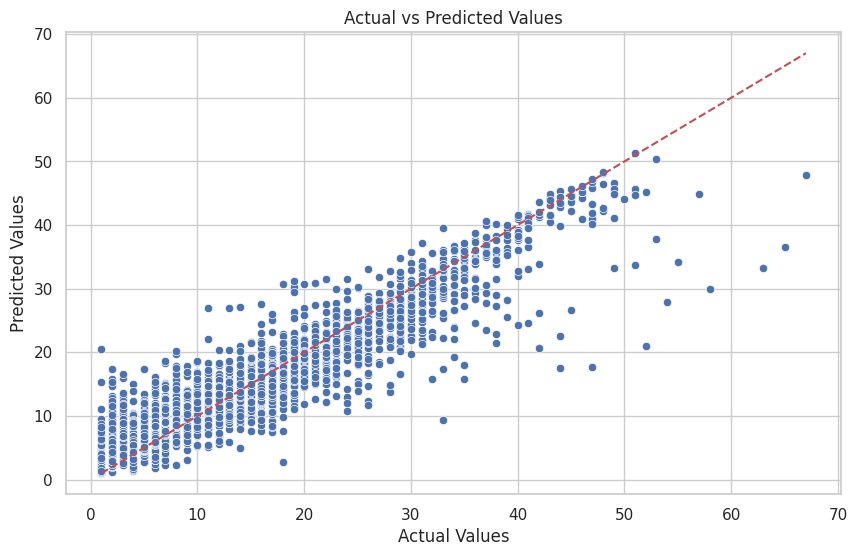

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumsikan y_valid dan y_pred sudah ada
# Membuat DataFrame dari nilai aktual dan prediksi
data = pd.DataFrame({
    'Actual': y_valid,
    'Predicted': y_pred
})

# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=data)

# Plotting line of perfect prediction
plt.plot([data['Actual'].min(), data['Actual'].max()], [data['Actual'].min(), data['Actual'].max()], 'r--')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


###(Daniel) Implementasi Ensemble Method : Random Forest Regressor dengan Cross Validation untuk memprediksi umur TyreLife

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, KMeansSMOTE
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load data
features_reg = ['LapTimeSeconds', 'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'Sector1TimeSeconds', 'Sector2TimeSeconds', 'Sector3TimeSeconds']
target = 'TyreLife'

# Fill missing values
imputer = SimpleImputer(strategy='mean')
X = f1_df_cleaned[features_reg]
y = f1_df_cleaned[target]
X_imputed = imputer.fit_transform(X)


# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize base estimator (RandomForestRegressor)
estimator = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize BaggingRegressor with RandomForestRegressor as base estimator
bagging_model = BaggingRegressor(estimator=estimator, n_estimators=5, random_state=42)

# Train the BaggingRegressor model
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation results
print("Test MSE:", mse)
print("Test R^2:", r2)

Test MSE: 31.565654015517467
Test R^2: 0.7006072789592037


###(Dzul) Implementasi model KNN dengan Cross Validation untuk memprediksi umur TyreLife




In [149]:
tyre_life_na = f1_df_cleaned['TyreLife'].isnull().sum()

# Selecting potential predictors and checking their missing values
potential_predictors = ['LapTimeSeconds', 'Sector1TimeSeconds', 'Sector2TimeSeconds', 'Sector3TimeSeconds',
                        'AirTemp', 'TrackTemp', 'Humidity', 'Pressure', 'WindSpeed', 'Compound_encoded']

predictors_na = f1_df_cleaned[potential_predictors].isnull().sum()

tyre_life_na, predictors_na

(0,
 LapTimeSeconds        290
 Sector1TimeSeconds    407
 Sector2TimeSeconds     39
 Sector3TimeSeconds     92
 AirTemp                 0
 TrackTemp               0
 Humidity                0
 Pressure                0
 WindSpeed               0
 Compound_encoded        0
 dtype: int64)

In [150]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Imputing missing values with median
imputer = SimpleImputer(strategy='median')
data_cleaned_imputed = f1_df_cleaned.copy()
data_cleaned_imputed[potential_predictors] = imputer.fit_transform(f1_df_cleaned[potential_predictors])

# Defining the features and target variable
X = data_cleaned_imputed[potential_predictors]
y = data_cleaned_imputed['TyreLife']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the KNN model
model = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=5)

# Performing cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='neg_mean_squared_error')

# Calculating the mean of the cross-validation scores
mean_cv_mse = np.mean(-cv_scores)
print(f'Mean Cross-Validation MSE: {mean_cv_mse}')

# Training the model on the entire training set
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error on the test set
mse_test = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {mse_test}')
print("Test R^2:", r2)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mean Cross-Validation MSE: 57.14604125083167
Test MSE: 59.96753592336349
Test R^2: 0.43122218391605294


### (Rafi) Implementasi model Linear Regression model untuk memprediksi umur TyreLife

In [151]:
# Checking for missing values in 'TyreLife'
tyre_life_na = f1_df_cleaned['TyreLife'].isnull().sum()

# Selecting potential predictors and checking their missing values
potential_predictors = ['LapTimeSeconds', 'Sector1TimeSeconds', 'Sector2TimeSeconds', 'Sector3TimeSeconds',
                        'AirTemp', 'TrackTemp', 'Humidity', 'Pressure', 'WindSpeed', 'Compound_encoded']

predictors_na = f1_df_cleaned[potential_predictors].isnull().sum()

tyre_life_na, predictors_na

(0,
 LapTimeSeconds        290
 Sector1TimeSeconds    407
 Sector2TimeSeconds     39
 Sector3TimeSeconds     92
 AirTemp                 0
 TrackTemp               0
 Humidity                0
 Pressure                0
 WindSpeed               0
 Compound_encoded        0
 dtype: int64)

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Imputing missing values with median
imputer = SimpleImputer(strategy='median')
data_cleaned_imputed = f1_df_cleaned.copy()
data_cleaned_imputed[potential_predictors] = imputer.fit_transform(f1_df_cleaned[potential_predictors])

# Splitting the data into training and testing sets
X = data_cleaned_imputed[potential_predictors]
y = data_cleaned_imputed['TyreLife']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mse

93.31962247688907

## Nomor 3

### Lakukan clustering pada dataset, dan berikan analisis dari cluster yang terbentuk! (Bintang)

####Pemilihan Fitur

In [153]:
import pandas as pd
from sklearn.impute import SimpleImputer

f1_df_imputed = f1_df_cleaned.copy()

# Pengimputan untuk kolom numerik
numeric_columns = f1_df_imputed.select_dtypes(include=['float64', 'int64']).columns
numeric_imputer = SimpleImputer(strategy='median')
f1_df_imputed[numeric_columns] = numeric_imputer.fit_transform(f1_df_imputed[numeric_columns])

categorical_columns = f1_df_imputed.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
f1_df_imputed[categorical_columns] = categorical_imputer.fit_transform(f1_df_imputed[categorical_columns])

print(f1_df_imputed.head())

selected_features = [
    'LapTimeSeconds',
    'Compound_encoded',
    'Sector1TimeSeconds',
    'Sector2TimeSeconds',
    'Sector3TimeSeconds',
    'Pos_cat_encoded',
]

selected_data = f1_df_imputed[selected_features]



        ID                    Time                 LapTime  Stint  \
0  14609.0  0 days 02:26:25.496000  0 days 00:01:40.943000    6.0   
1   3211.0  0 days 01:13:51.732000  0 days 00:01:48.067000    1.0   
2   2497.0  0 days 02:22:35.139000  0 days 00:01:22.881000    2.0   
3  13639.0  0 days 01:03:36.822000  0 days 00:01:31.585000    1.0   
4   1280.0  0 days 01:45:40.072000  0 days 00:01:34.742000    2.0   

              Sector1Time             Sector2Time             Sector3Time  \
0  0 days 00:00:46.163000  0 days 00:00:28.979000  0 days 00:00:25.801000   
1  0 days 00:00:39.129000  0 days 00:00:43.601000  0 days 00:00:25.337000   
2  0 days 00:00:28.890000  0 days 00:00:18.554000  0 days 00:00:35.437000   
3  0 days 00:00:28.315000  0 days 00:00:28.929000  0 days 00:00:30.478000   
4  0 days 00:00:34.895000  0 days 00:00:29.874000  0 days 00:00:29.973000   

       Sector1SessionTime      Sector2SessionTime      Sector3SessionTime  \
0  0 days 02:25:36.926000  0 days 02:26:05.90

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

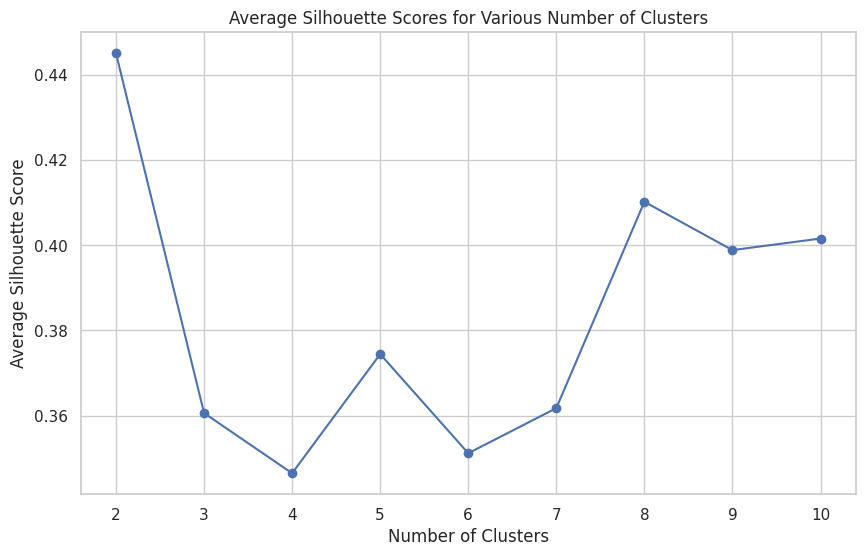

In [154]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Tentukan rentang jumlah cluster yang akan dievaluasi
range_n_clusters = list(range(2, 11))  # Misalnya, dari 2 hingga 10 cluster

# Inisialisasi list untuk menyimpan skor silhouette
silhouette_scores = []

# Loop melalui setiap jumlah cluster dan hitung skor silhouette
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(selected_data)
    silhouette_avg = silhouette_score(selected_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot skor silhouette terhadap jumlah cluster
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Average Silhouette Scores for Various Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

Berdasarkan visualisasi Silhouette Score, kita dapat menganalisis pemilihan jumlah cluster yang optimal. Dalam konteks ini, kita mencari nilai Silhouette Score yang relatif tinggi, karena nilai yang lebih tinggi menunjukkan bahwa objek-objek dalam cluster tersebut lebih mirip satu sama lain dibandingkan dengan objek di cluster lain.

- Skor Silhouette tertinggi terlihat pada jumlah cluster 2, dengan skor sekitar 0.44.
- Jumlah cluster 8 juga menunjukkan peningkatan skor yang signifikan, mendekati 0.40.
Dari grafik tersebut, pilihan jumlah cluster yang optimal bisa dipertimbangkan sebagai berikut:

2 clusters: Memiliki Silhouette Score tertinggi. Ini menunjukkan bahwa dua cluster memberikan pemisahan yang sangat baik di antara data.
8 clusters: Memiliki skor yang mendekati yang terbaik, namun lebih rendah dari 2 cluster.

####Visualisasi elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

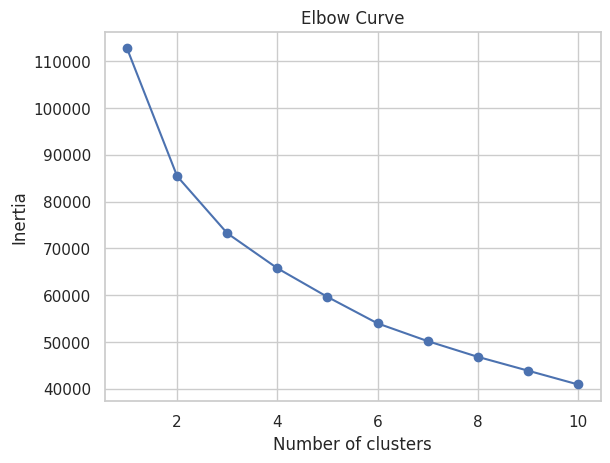

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Inisialisasi list untuk menyimpan inersia
inertia = []

# Jumlah cluster yang akan diuji
clusters_range = range(1, 11)

# Proses clustering untuk setiap jumlah cluster
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(clusters_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


Dari Elbow Curve, dapat dilihat bahwa penurunan inertia yang signifikan terjadi hingga 3 cluster, setelah itu penurunannya mulai melandai. Jadi, titik "siku" yang paling jelas tampak pada 3 cluster.

Perbandingan:

Elbow Curve menunjukkan bahwa 3 cluster adalah pilihan yang baik karena setelah itu penurunan inertia melandai.
Silhouette Score menunjukkan skor tertinggi pada 2 cluster, tetapi kita juga harus memperhatikan bahwa 2 cluster mungkin tidak menangkap cukup variasi dalam data jika hanya ada 2 grup besar. Skor siluet yang cukup baik terlihat lagi pada 8 cluster, namun nilai ini tidak jauh lebih baik dari nilai pada 3 cluster.

Sehingga kita memutusukan menggunakan 8 cluster untuk analsiis yang lebih kompleks

In [156]:
selected_data

LapTimeSeconds  Compound_encoded  Sector1TimeSeconds  \
0             100.943               1.0              46.163   
1             108.067               2.0              39.129   
2              82.881               0.0              28.890   
3              91.585               3.0              29.103   
4              94.742               0.0              34.895   
...               ...               ...                 ...   
18783          85.235               0.0              30.620   
18784         100.363               2.0              29.488   
18785         112.495               3.0              32.659   
18786          85.938               0.0              30.564   
18787         145.892               2.0              52.231   

       Sector2TimeSeconds  Sector3TimeSeconds  Pos_cat_encoded  
0                  28.979              25.801              0.0  
1                  43.601              25.337              1.0  
2                  18.554              35.437              0.0  
3                  28.929              30.478              1.0  
4                  29.874              29.973              2.0  
...                   ...                 ...              ...  
18783              30.668              23.947              0.0  
18784              42.838              28.037              0.0  
18785              49.567              30.269              0.0  
18786              31.370              24.004              0.0  
18787              53.937              39.724              2.0  

[18788 rows x 6 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-157-ff887efcc8a8>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Cluster'] = clusters


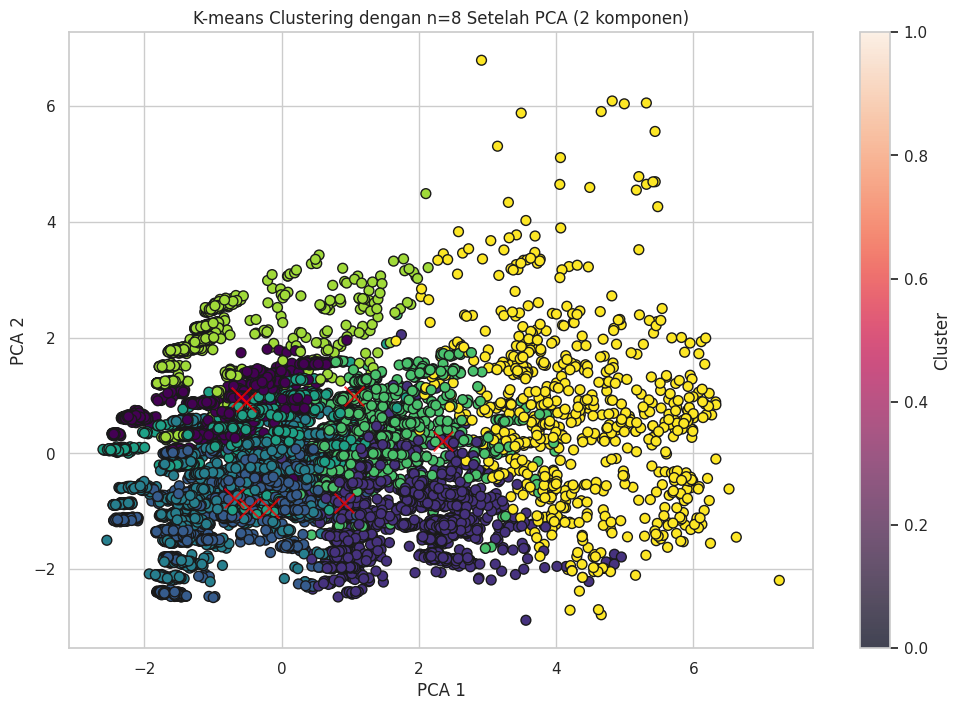

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


# Reduksi dimensi dengan PCA (2 komponen)
pca_2 = PCA(n_components=2)
pca_result_2 = pca_2.fit_transform(scaled_data)

# Reduksi dimensi dengan PCA (3 komponen)
pca_3 = PCA(n_components=3)
pca_result_3 = pca_3.fit_transform(scaled_data)

# Clustering dengan K-means
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Menambahkan hasil cluster ke data asli
selected_data['Cluster'] = clusters

# Visualisasi hasil clustering (2D PCA)
plt.figure(figsize=(12, 8))
plt.scatter(pca_result_2[:, 0], pca_result_2[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
centers_2 = kmeans.cluster_centers_[:, :2]  # Centroid for 2D plot
plt.scatter(centers_2[:, 0], centers_2[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-means Clustering dengan n=8 Setelah PCA (2 komponen)')
plt.colorbar(label='Cluster')
plt.show()


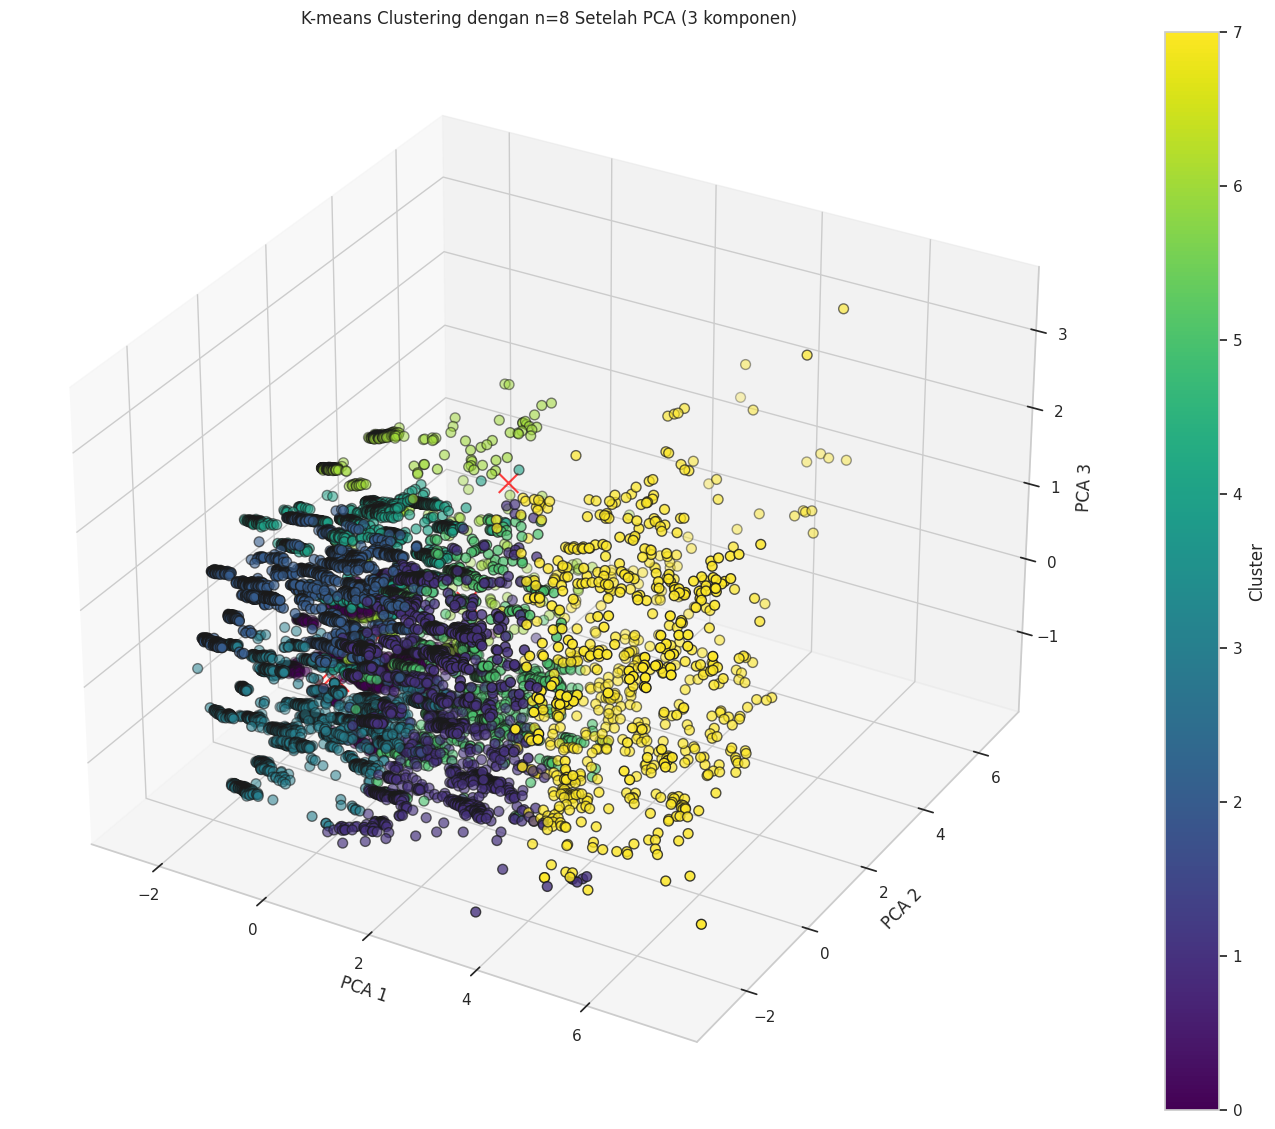

In [158]:

# Visualisasi hasil clustering (3D PCA)
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_result_3[:, 0], pca_result_3[:, 1], pca_result_3[:, 2], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
centers_3 = kmeans.cluster_centers_[:, :3]  # Centroid for 3D plot
ax.scatter(centers_3[:, 0], centers_3[:, 1], centers_3[:, 2], c='red', s=200, alpha=0.75, marker='x')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('K-means Clustering dengan n=8 Setelah PCA (3 komponen)')
plt.colorbar(sc, label='Cluster')
plt.show()

In [159]:
# Menghitung total untuk masing-masing cluster
cluster_counts = selected_data['Cluster'].value_counts().sort_index()
print(cluster_counts)

# Jika ingin menampilkan dalam bentuk DataFrame
cluster_summary = pd.DataFrame(cluster_counts, columns=['Total'])
(cluster_summary)

Cluster
0    3093
1    2543
2    2973
3    3148
4    2686
5    2170
6    1453
7     722
Name: count, dtype: int64


Empty DataFrame
Columns: [Total]
Index: []

Cluster
0    3093
1    2543
2    2973
3    3148
4    2686
5    2170
6    1453
7     722
Name: count, dtype: int64
Empty DataFrame
Columns: [Total]
Index: []


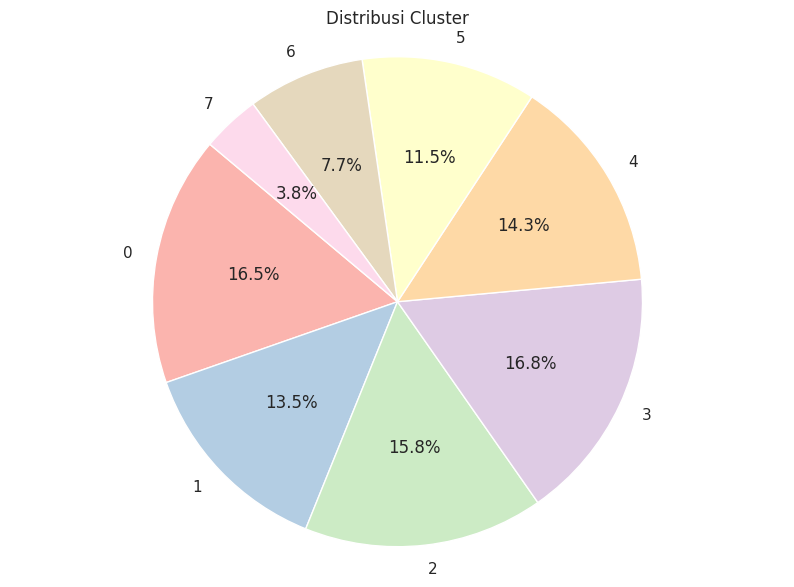

In [160]:
import matplotlib.pyplot as plt

# Menghitung total untuk masing-masing cluster
cluster_counts = selected_data['Cluster'].value_counts().sort_index()
print(cluster_counts)


cluster_summary = pd.DataFrame(cluster_counts, columns=['Total'])
print(cluster_summary)


plt.figure(figsize=(10, 7))
colors = plt.get_cmap('Pastel1').colors

plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribusi Cluster')
plt.axis('equal')
plt.show()


####Hasil Analisis Visualisasi Pie Chart
- Cluster 3 merupakan cluster dengan jumlah paling banyak
- Cluster 7 merupakan cluster dengan jumlah paling sedikit

#### ANALISIS FITUR COMPOUND PADA CLUSTERING

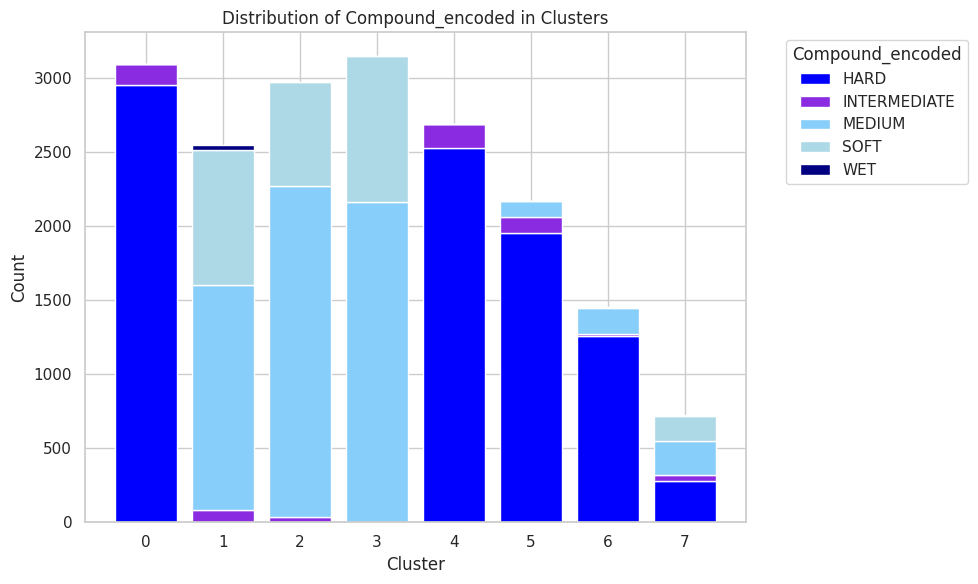

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

compound_mapping = {
    0: 'HARD',
    1: 'INTERMEDIATE',
    2: 'MEDIUM',
    3: 'SOFT',
    4: 'WET'
}

compound_distribution = pd.crosstab(selected_data['Cluster'], selected_data['Compound_encoded'])

# Membuat bar chart untuk distribusi kategori Compound_encoded dalam seluruh cluster
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#0000FF', '#8A2BE2', '#87CEFA', '#ADD8E6', '#000080']
width = 0.8  # Lebar setiap bar
bar_positions = np.arange(len(compound_distribution))  # Posisi setiap bar

bottom = np.zeros(len(compound_distribution))  # Inisialisasi bottom untuk setiap bar

for i, (column, values) in enumerate(compound_distribution.items()):
    ax.bar(bar_positions, values, width, bottom=bottom, label=compound_mapping[column], color=colors[i])
    bottom += values  # Update nilai bottom untuk bar berikutnya

ax.set_xticks(bar_positions)
ax.set_xticklabels(compound_distribution.index)
ax.set_ylabel('Count')
ax.set_xlabel('Cluster')
ax.set_title('Distribution of Compound_encoded in Clusters')
ax.legend(title='Compound_encoded', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [162]:
# Membuat DataFrame untuk menampung hasil
compound_summary = pd.DataFrame(columns=compound_distribution.index, index=compound_mapping.values())

# Mengisi DataFrame dengan jumlah masing-masing jenis Compound_encoded dalam setiap cluster
for cluster, counts in compound_distribution.iterrows():
    for compound, count in counts.items():
        compound_summary.at[compound_mapping[compound], cluster] = count

# Mengisi nilai yang kosong dengan 0
compound_summary.fillna(0, inplace=True)
# Transpose DataFrame untuk memindahkan cluster ke bagian bawah
compound_summary = compound_summary.T

# Menampilkan tabel
(compound_summary)



HARD INTERMEDIATE MEDIUM SOFT WET
Cluster                                   
0        2951          142      0    0   0
1           4           81   1518  908  32
2           0           36   2232  705   0
3           0            0   2159  985   4
4        2528          158      0    0   0
5        1952          105    113    0   0
6        1258            9    179    7   0
7         279           41    229  171   2

**Hasil Analisis Chart**

Chart di atas memiliki dua sumbu:
- Sumbu x diberi label "Cluster," yang mewakili cluster yang ada.
- Sumbu y diberi label "Count," yang mewakili jumlah penggunaan compound pada masing-masing cluster.

Analisis:
- **Kluster 0 & 4**: Menunjukkan cluster yang cenderung memiliki compound jenis hard dan sedikit compound intermediate.

- **Kluster 2 & 3**: Menunjukkan cluster yang cenderung memiliki compound jenis medium dan sedikit compound soft dan ada beberapa  compound intermediate.
- **Kluster 6**: Menunjukkan cluster dengan compound dominan hard dan sedikit medium

- **Kluster 5, 6 & 7**: Menunjukkan cluster yang lebih bervariasi dengan compound dominan hard dan beberapa medium, soft,  dan intermediate.

- **Kluster 1**: Menunjukkan satu satunya cluster dimana compound wet terbanyak pada cluster ini dan  juga cenderung memiliki compound jenis medium & soft dan sedikit compound intermediate.





####ANALISIS FITUR  POS_CAT PADA CLUSTERING

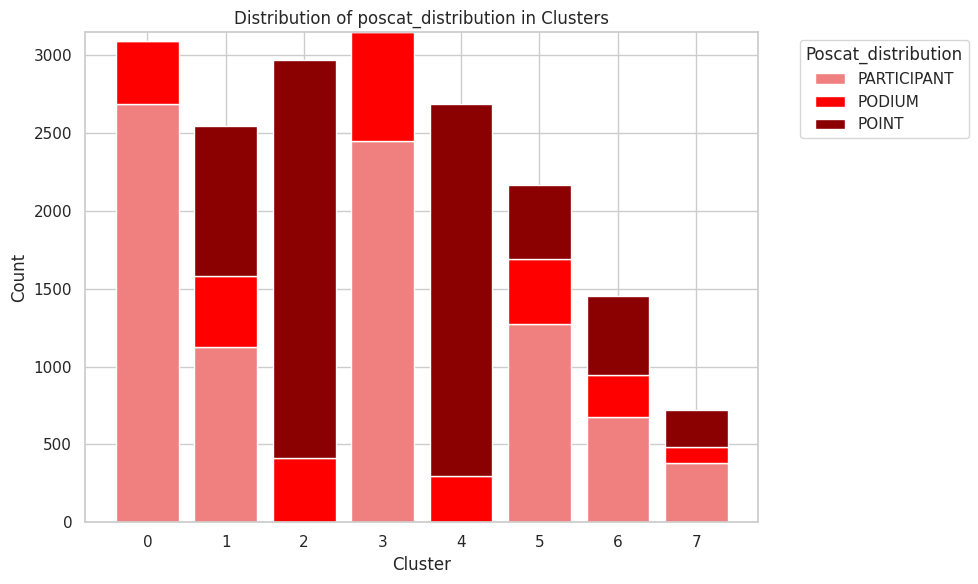

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

poscat_mapping = {
    0: 'PARTICIPANT',
    1: 'PODIUM',
    2: 'POINT',
}

poscat_distribution = pd.crosstab(selected_data['Cluster'], selected_data['Pos_cat_encoded'])

colors = ['lightcoral', 'red', 'darkred']

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.8  # Lebar setiap bar
bar_positions = np.arange(len(poscat_distribution))  # Posisi setiap bar

bottom = np.zeros(len(poscat_distribution))  # Inisialisasi bottom untuk setiap bar

for i, (column, values) in enumerate(poscat_distribution.items()):
    ax.bar(bar_positions, values, width, bottom=bottom, label=poscat_mapping[column], color=colors[i])
    bottom += values  # Update nilai bottom untuk bar berikutnya

ax.set_xticks(bar_positions)
ax.set_xticklabels(poscat_distribution.index)
ax.set_ylabel('Count')
ax.set_xlabel('Cluster')
ax.set_title('Distribution of poscat_distribution in Clusters')
ax.legend(title='Poscat_distribution', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


**Hasil Analisis Chart**

Chart di atas memiliki dua sumbu:
- Sumbu x diberi label "Cluster," yang mewakili cluster yang ada.
- Sumbu y diberi label "Count," yang mewakili pos_cat pada masing-masing cluster.

Analisis:
- **Kluster 0 & 3**: Menunjukkan cluster yang cenderung mendapat posisi participant dan sedikit kelompok podium
- **Kluster 2 & 4**: Menunjukkan top cluster karena cenderung memiliki hasil yang baik yaitu dominan point dan beberapa podium.

- **Kluster 1, 5, 6 & 7**: Menunjukkan cluster yang lebih bervariasi dengan memiliki posisi dominan adalah participant diikuti point dan beberapa podium





####ANALISIS FITUR LapTimeSeconds PADA CLUSTERING

In [164]:
selected_data

LapTimeSeconds  Compound_encoded  Sector1TimeSeconds  \
0             100.943               1.0              46.163   
1             108.067               2.0              39.129   
2              82.881               0.0              28.890   
3              91.585               3.0              29.103   
4              94.742               0.0              34.895   
...               ...               ...                 ...   
18783          85.235               0.0              30.620   
18784         100.363               2.0              29.488   
18785         112.495               3.0              32.659   
18786          85.938               0.0              30.564   
18787         145.892               2.0              52.231   

       Sector2TimeSeconds  Sector3TimeSeconds  Pos_cat_encoded  Cluster  
0                  28.979              25.801              0.0        5  
1                  43.601              25.337              1.0        1  
2                  18.554              35.437              0.0        6  
3                  28.929              30.478              1.0        2  
4                  29.874              29.973              2.0        4  
...                   ...                 ...              ...      ...  
18783              30.668              23.947              0.0        0  
18784              42.838              28.037              0.0        1  
18785              49.567              30.269              0.0        1  
18786              31.370              24.004              0.0        0  
18787              53.937              39.724              2.0        7  

[18788 rows x 7 columns]

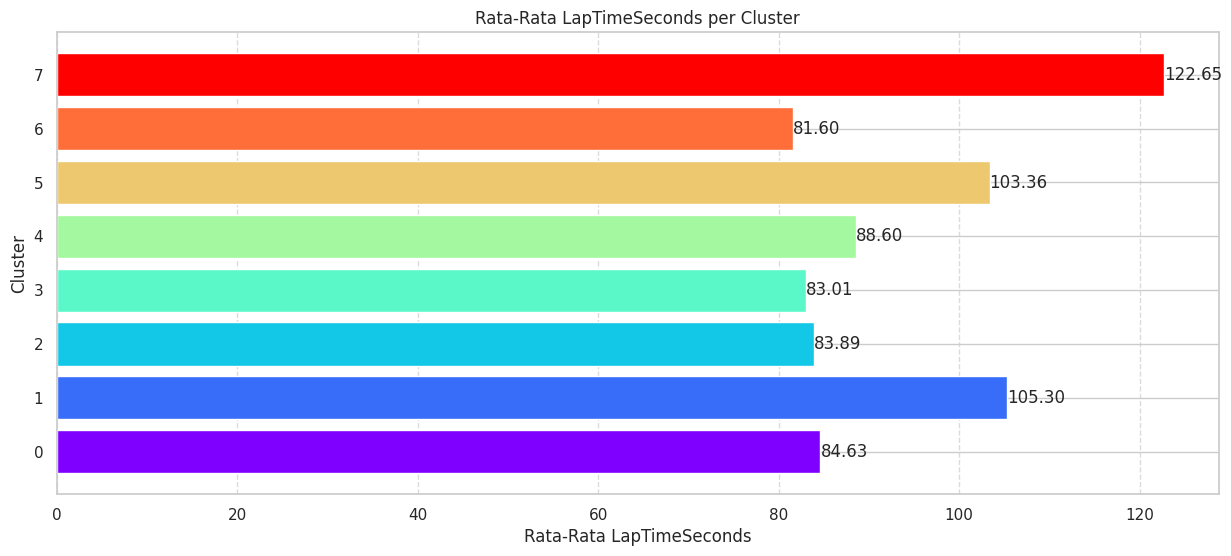

In [165]:
import numpy as np
import matplotlib.pyplot as plt

# Menghitung rata-rata LapTimeSeconds per cluster
avg_laptime_per_cluster = selected_data.groupby('Cluster')['LapTimeSeconds'].mean()

# Membuat bar chart dengan sumbu X sebagai rata-rata dan sumbu Y sebagai cluster
plt.figure(figsize=(15, 6))
bars = plt.barh(avg_laptime_per_cluster.index, avg_laptime_per_cluster.values, color=plt.cm.rainbow(np.linspace(0, 1, len(avg_laptime_per_cluster))))

# Menambahkan label pada ujung batang
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')

plt.ylabel('Cluster')
plt.xlabel('Rata-Rata LapTimeSeconds')
plt.title('Rata-Rata LapTimeSeconds per Cluster')
plt.yticks(np.arange(min(avg_laptime_per_cluster.index), max(avg_laptime_per_cluster.index)+1, 1))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**Hasil Analisis Chart**

Chart di atas memiliki dua sumbu:
- Sumbu x diberi label "Rata-Rata LapTime Seconds" yang mewakili ratarata laptime pembalap.
- Sumbu y diberi label "Cluster," yang mewakili  masing-masing cluster.

Analisis:
- **Kluster 6**: Menunjukkan cluster dengan performa terbaik dengan laptime terendah
- **Kluster 0,2,3 & 4**: Menunjukkan  cluster dengan rata rata laptime yang cenderung bagus juga

- **Kluster 1, 5, dan 7**: Menunjukkan cluster dengan performa terendah khususnya cluster 7 dengan rata rata laptime tertinggi





####ANALISIS FITUR SECTOR PADA CLUSTER

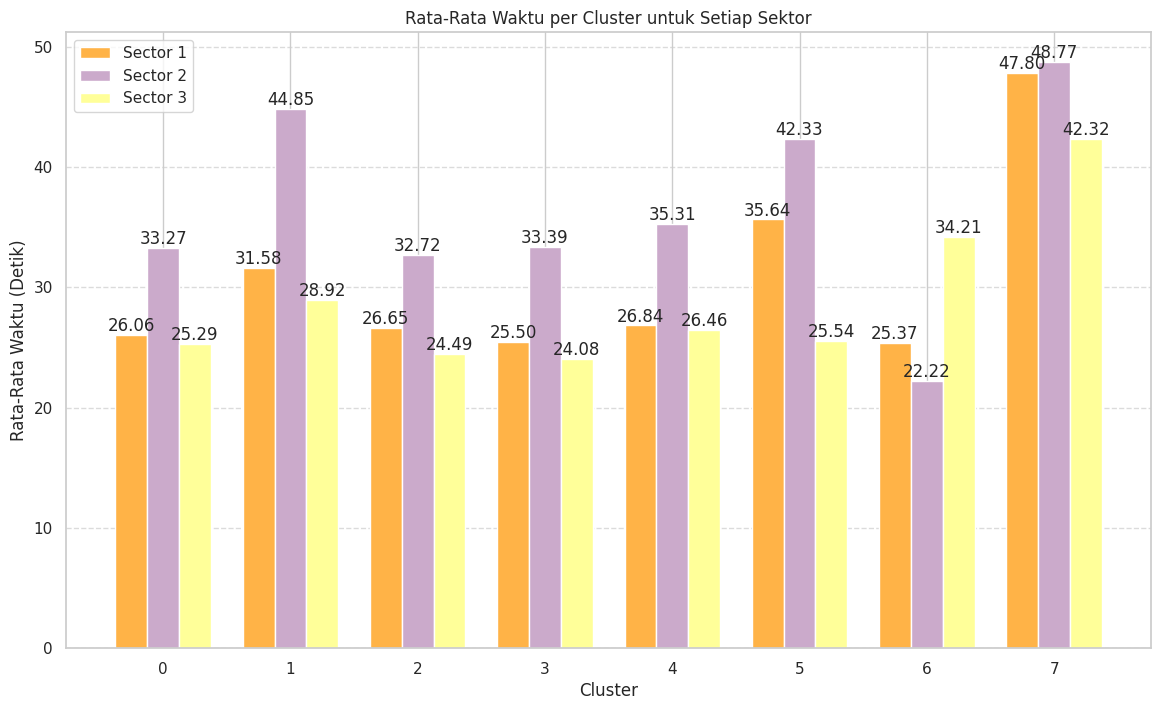

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung rata-rata untuk setiap sektor per cluster
avg_sector1_per_cluster = selected_data.groupby('Cluster')['Sector1TimeSeconds'].mean()
avg_sector2_per_cluster = selected_data.groupby('Cluster')['Sector2TimeSeconds'].mean()
avg_sector3_per_cluster = selected_data.groupby('Cluster')['Sector3TimeSeconds'].mean()

# Menggabungkan data rata-rata dalam satu DataFrame
avg_times_per_cluster = pd.DataFrame({
    'Sector1': avg_sector1_per_cluster,
    'Sector2': avg_sector2_per_cluster,
    'Sector3': avg_sector3_per_cluster
})

# Membuat bar chart
plt.figure(figsize=(14, 8))
bar_width = 0.25  # Lebar setiap batang
indices = np.arange(len(avg_times_per_cluster))  # Indeks untuk sumbu X

# Membuat batang untuk setiap sektor dengan warna pastel
bars1 = plt.bar(indices - bar_width, avg_times_per_cluster['Sector1'], width=bar_width, label='Sector 1', color='#FFB347')  # Jingga pastel
bars2 = plt.bar(indices, avg_times_per_cluster['Sector2'], width=bar_width, label='Sector 2', color='#CBAACB')  # Ungu pastel
bars3 = plt.bar(indices + bar_width, avg_times_per_cluster['Sector3'], width=bar_width, label='Sector 3', color='#FFFF99')  # Kuning pastel

# Menambahkan label pada ujung batang
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.xlabel('Cluster')
plt.ylabel('Rata-Rata Waktu (Detik)')
plt.title('Rata-Rata Waktu per Cluster untuk Setiap Sektor')
plt.xticks(indices, avg_times_per_cluster.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Hasil Analisis Chart**

Chart di atas memiliki dua sumbu:
- Sumbu x diberi label "Cluster" yang mewakili masing masing cluster
- Sumbu y diberi label "Rata-rata waktu," yang mewakili nilai rata-rata waktu pada 3 sector untuk masing-masing cluster.

Analisis:
- **Kluster 0,2,3, dan 6**: Menunjukkan cluster dengan performa terbaik dengan rata-rata waktu yang rendah dan beriringan
- **Kluster 1,4,5**: Menunjukkan  cluster dengan rata rata waktu yang sedang dan menengah

- **Kluster 7**: Menunjukkan cluster dengan performa terendah dengan rata rata waktu yang terlama





### Clustering Lanjutan dengan Perbedaan Fitur yang dipilih (Rafi)

In [167]:
# Bagian 1: Konversi Fitur Berbasis Waktu Menjadi Detik
# ---------------------------------------------
# Konversi fitur berbasis waktu menjadi detik
for feature in ['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']:
    f1_df[feature] = pd.to_timedelta(f1_df[feature]).dt.total_seconds()

In [168]:
# Bagian 2: Pemilihan Fitur dan Pembersihan Data
# ---------------------------------------------
# Pemilihan Fitur: memilih fitur numerik yang relevan
selected_features = [
    'LapTime', 'Stint', 'Sector1Time', 'Sector2Time', 'Sector3Time',
    'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindSpeed'
]

# Menambah fitur 'Pos_cat' untuk analisis clustering
data_clean = f1_df[selected_features + ['Pos_cat']].dropna()

In [169]:
# Bagian 3: Skalasi Fitur
# ---------------------------------------------
# Skalasi fitur
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean[selected_features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

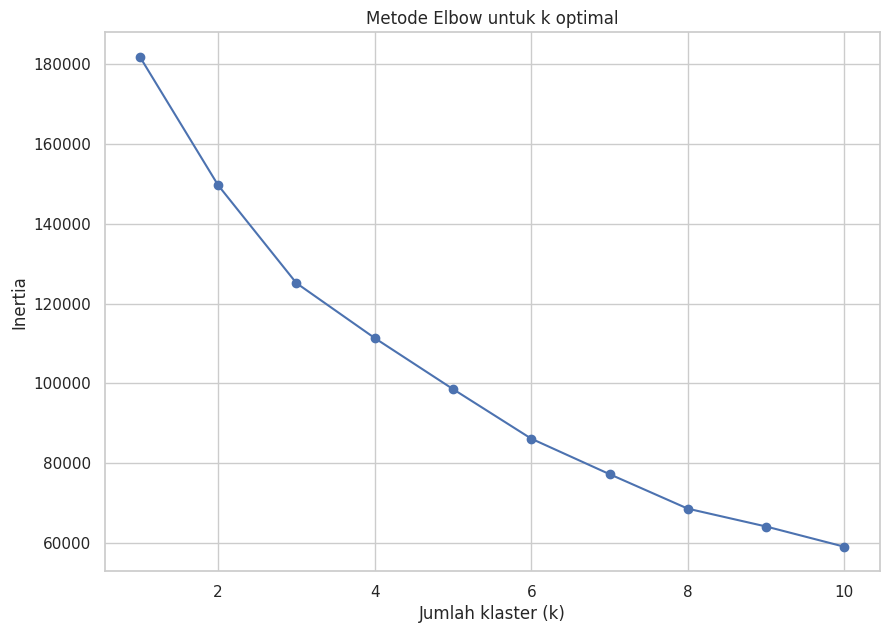

In [170]:
# Bagian 4: Metode Elbow untuk Menentukan Jumlah Klaster Optimal
# ---------------------------------------------
# Hitung Inertia untuk berbagai nilai k
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot grafik Metode Elbow
plt.figure(figsize=(10, 7))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah klaster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk k optimal')
plt.show()

In [171]:
# Bagian 5: Penerapan KMeans untuk Clustering
# ---------------------------------------------
# Menerapkan KMeans untuk clustering dengan k optimal (diasumsikan k=3 dari analisis sebelumnya)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Menambahkan label klaster ke dataset
data_clean['Cluster'] = clusters

# Mendapatkan posisi centroid
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [172]:
# Bagian 6: Analisis Klaster Terhadap 'Pos_cat'
# ---------------------------------------------
# Menganalisis klaster terhadap 'Pos_cat'
cluster_analysis = data_clean.groupby('Cluster')['Pos_cat'].value_counts(normalize=True).unstack().fillna(0)
print(cluster_analysis)

# Distribusi Cluster
cluster_distribution = data_clean['Cluster'].value_counts(normalize=True) * 100
print("Hasil distribusi Kluster adalah: " + str(cluster_distribution))

Pos_cat  Participant    Podium     Point
Cluster                                 
0           0.466541  0.159361  0.374098
1           0.444358  0.164591  0.391051
2           0.449380  0.167246  0.383375
Hasil distribusi Kluster adalah: Cluster
0    49.562730
1    28.271272
2    22.165997
Name: proportion, dtype: float64


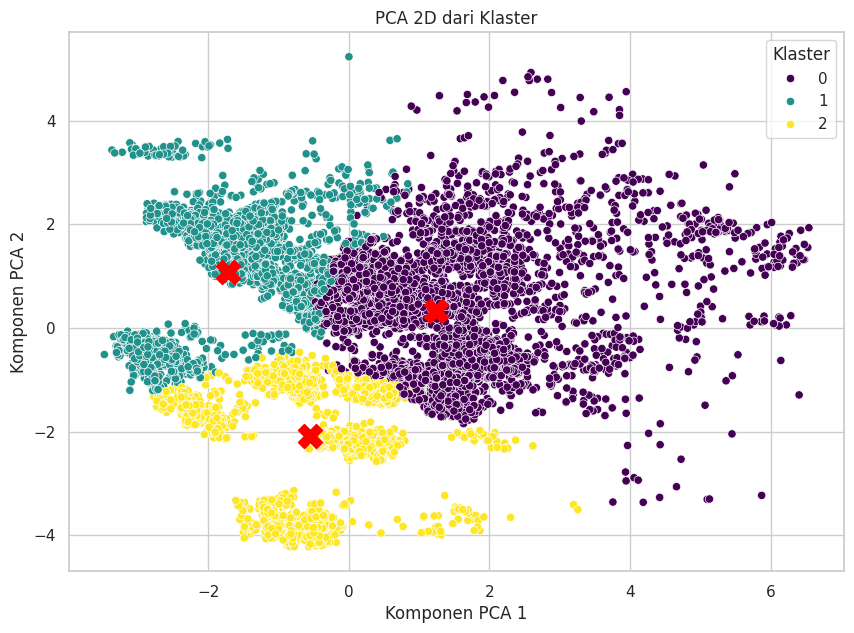

In [173]:
# Bagian 7: Visualisasi PCA 2D dari Klaster
# ---------------------------------------------
pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(data_scaled)

# Transformasikan centroids ke dalam ruang PCA 2D
centroids_pca_2d = pca_2d.transform(centroids)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_pca_2d[:, 0], y=data_pca_2d[:, 1], hue=data_clean['Cluster'], palette='viridis')
plt.scatter(centroids_pca_2d[:, 0], centroids_pca_2d[:, 1], s=300, c='red', marker='X')
plt.title('PCA 2D dari Klaster')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.legend(title='Klaster')
plt.show()

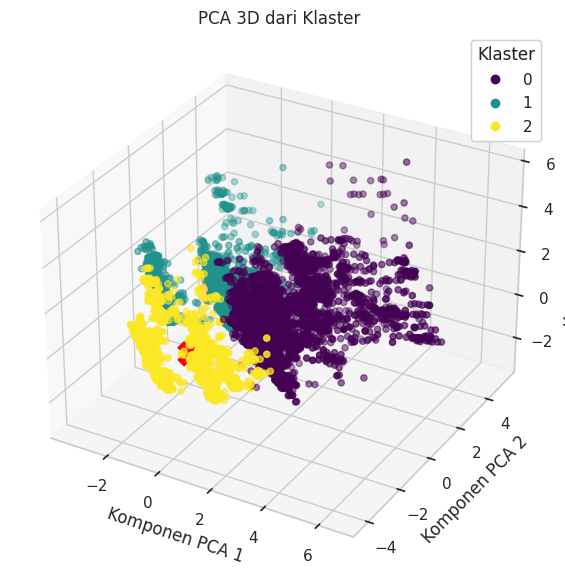

In [174]:
# Bagian 8: Visualisasi PCA 3D dari Klaster
# ---------------------------------------------
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data_scaled)

# Transformasikan centroids ke dalam ruang PCA 3D
centroids_pca_3d = pca_3d.transform(centroids)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2], c=data_clean['Cluster'], cmap='viridis')
ax.scatter(centroids_pca_3d[:, 0], centroids_pca_3d[:, 1], centroids_pca_3d[:, 2], s=300, c='red', marker='X')

ax.set_title('PCA 3D dari Klaster')
ax.set_xlabel('Komponen PCA 1')
ax.set_ylabel('Komponen PCA 2')
ax.set_zlabel('Komponen PCA 3')
legend1 = ax.legend(*scatter.legend_elements(), title="Klaster")
ax.add_artist(legend1)
plt.show()

#### Kesimpulan
Kesimpulan¶
1. Cluster 0:
  - Memiliki waktu lap yang paling lama dengan temperatur udara dan kelembaban yang cukup tinggi. Kondisi ini mungkin membuat performa pembalap menjadi kurang optimal.
  - Selain itu, proporsi tertinggi untuk kategori Participant dibandingkan dengan klaster lainnya menunjukkan bahwa sebagian besar anggota klaster ini adalah peserta biasa yang tidak sering mencapai posisi podium atau mendapatkan poin.

2. Cluster 1:
  - Memiliki waktu lap yang paling cepat dengan tekanan udara yang lebih rendah dibandingkan klaster lainnya dan temperatur yang relatif lebih rendah. Kondisi ini menciptakan lingkungan yang optimal untuk performa balapan.
  - Proporsi tertinggi untuk kategori Point menunjukkan bahwa sebagian besar anggota dari klaster ini sering mendapatkan poin, yang sesuai dengan performa cepat yang mereka miliki.

3. Cluster 2:
  - Memiliki waktu lap yang lebih cepat dibandingkan Cluster 0, tetapi lebih lambat dibandingkan Cluster 1. Meskipun demikian, klaster ini menghadapi temperatur track yang paling tinggi dan tekanan udara yang paling rendah, menunjukkan kemampuan pembalap untuk mengatasi kondisi yang lebih menantang.
  - Proporsi Podium yang sedikit lebih tinggi dibandingkan klaster lainnya menunjukkan bahwa anggota klaster ini sering mencapai posisi podium meskipun dalam kondisi yang lebih sulit.